# **install dependencies**

In [17]:
import dask.dataframe as dd
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import os

In [18]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Data Merge with Lockup table

In [19]:
# Load data using Dask
yellow = dd.read_parquet("yellow_merged24_daily_sample.parquet")
green = dd.read_parquet("green_merged24_daily_sample.parquet")
fhvhv = dd.read_parquet("fhvhv_merged24_daily_sample.parquet")


# Perform merge
def merge_lookup_dask(df, pickup_col, dropoff_col, lookup):
    df = df.merge(lookup, left_on=pickup_col, right_on="LocationID", how="left").rename(
        columns={"Borough": "PU_Borough", "Zone": "PU_Zone", "service_zone": "PU_ServiceZone"}).drop(columns=["LocationID"])
    df = df.merge(lookup, left_on=dropoff_col, right_on="LocationID", how="left").rename(
        columns={"Borough": "DO_Borough", "Zone": "DO_Zone", "service_zone": "DO_ServiceZone"}).drop(columns=["LocationID"])
    return df

# Load lookup with Dask
lookup = dd.read_csv("taxi_zone_lookup.csv")

yellow = merge_lookup_dask(yellow, "PULocationID", "DOLocationID", lookup)
green = merge_lookup_dask(green, "PULocationID", "DOLocationID", lookup)
fhvhv = merge_lookup_dask(fhvhv, "PULocationID", "DOLocationID", lookup)

# Compute and bring data into memory
yellow = yellow.compute()
green = green.compute()
fhvhv = fhvhv.compute()


c:\Program Files\Python313\Lib\site-packages\dask\dataframe\multi.py:169: UserWarning: Merging dataframes with merge column data type mismatches: 
+--------------------------------+------------+-------------+
| Merge columns                  | left dtype | right dtype |
+--------------------------------+------------+-------------+
| ('PULocationID', 'LocationID') | int32      | int64       |
+--------------------------------+------------+-------------+
Cast dtypes explicitly to avoid unexpected results.
  warnings.warn(
c:\Program Files\Python313\Lib\site-packages\dask\dataframe\multi.py:169: UserWarning: Merging dataframes with merge column data type mismatches: 
+--------------------------------+------------+-------------+
| Merge columns                  | left dtype | right dtype |
+--------------------------------+------------+-------------+
| ('DOLocationID', 'LocationID') | int32      | int64       |
+--------------------------------+------------+-------------+
Cast dtypes expli

In [20]:
from IPython.display import display
#show all columns in the DataFrame
pd.set_option('display.max_columns', None)

def heading(df, n=2):
    """Display the first n rows of a DataFrame as a table."""
    display(df.head(n))

# Show all tables below each other
heading(yellow)
heading(green)
heading(fhvhv)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,PU_Borough,PU_Zone,PU_ServiceZone,DO_Borough,DO_Zone,DO_ServiceZone
0,2,2002-12-31 23:09:40,2003-01-01 20:22:32,1.0,2.12,1.0,N,234,148,2,17.7,1.0,0.5,0.0,0.0,1.0,22.7,2.5,0.0,2002-12-31,Manhattan,Union Sq,Yellow Zone,Manhattan,Lower East Side,Yellow Zone
1,2,2009-01-01 23:58:40,2009-01-02 00:01:40,1.0,0.46,1.0,N,137,264,2,4.4,3.5,0.5,0.0,0.0,1.0,9.4,0.0,0.0,2009-01-01,Manhattan,Kips Bay,Yellow Zone,Unknown,<NA>,<NA>


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_date,PU_Borough,PU_Zone,PU_ServiceZone,DO_Borough,DO_Zone,DO_ServiceZone
0,1,2024-01-01 06:25:24,2024-01-01 06:25:27,N,1.0,165,165,1.0,0.00,3.00,0.0,1.5,25.00,0.0,NaN,1.0,29.50,1.0,1.0,0.0,2024-01-01,Brooklyn,Midwood,Boro Zone,Brooklyn,Midwood,Boro Zone
1,2,2024-01-01 11:39:00,2024-01-01 12:03:00,<NA>,NaN,243,100,NaN,8.45,37.45,0.0,0.0,4.12,0.0,NaN,1.0,45.32,NaN,NaN,NaN,2024-01-01,Manhattan,Washington Heights North,Boro Zone,Manhattan,Garment District,Yellow Zone


,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,pickup_date,PU_Borough,PU_Zone,PU_ServiceZone,DO_Borough,DO_Zone,DO_ServiceZone
0,HV0003,B03404,B03404,2023-12-31 23:59:26,2024-01-01 00:00:13,2024-01-01 00:00:48,2024-01-01 00:30:38,75,7,7.82,1790,34.22,0.0,0.94,3.04,2.75,0.0,0.0,27.50,N,N,N,N,N,2023-12-31,Manhattan,East Harlem South,Boro Zone,Queens,Astoria,Boro Zone
1,HV0003,B03404,B03404,2023-12-31 23:58:59,2024-01-01 00:04:04,2024-01-01 00:04:22,2024-01-01 00:39:07,132,181,27.16,2085,53.90,0.0,1.55,5.01,0.00,2.5,0.0,55.29,N,N,N,N,N,2023-12-31,Queens,JFK Airport,Airports,Brooklyn,Park Slope,Boro Zone


# EDA

In [5]:
from IPython.display import display

def df_summary(df, df_name='DataFrame'):
    print(f"\n{'='*80}")
    print(f"📊 Summary for: {df_name}")
    print(f"Shape: {df.shape}")

    num_cols = df.select_dtypes(include='number').columns.tolist()
    cat_cols = df.select_dtypes(include=['object', 'category', 'string']).columns.tolist()

    print("\n🔢 Numerical Columns:")
    print(num_cols)

    print("\n🔠 Categorical Columns:")
    print(cat_cols)

    print("\n📈 Describe (Numerical):")
    display(df.describe())


# Show all tables below each other
df_summary(yellow)
df_summary(green)
df_summary(fhvhv)


📊 Summary for: DataFrame
Shape: (2058488, 26)

🔢 Numerical Columns:
['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']

🔠 Categorical Columns:
['store_and_fwd_flag', 'PU_Borough', 'PU_Zone', 'PU_ServiceZone', 'DO_Borough', 'DO_Zone', 'DO_ServiceZone']

📈 Describe (Numerical):


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date
count,2.058488e+06,2058488,2058488,1.857688e+06,2.058488e+06,1.857688e+06,2.058488e+06,2.058488e+06,2.058488e+06,2.058488e+06,2.058488e+06,2.058488e+06,2.058488e+06,2.058488e+06,2.058488e+06,2.058488e+06,1.857688e+06,1.857688e+06,2058488
mean,1.763883e+00,2024-07-06 09:57:43.174454,2024-07-06 10:15:12.786496,1.333265e+00,4.826330e+00,2.333478e+00,1.641882e+02,1.634045e+02,1.109705e+00,1.927846e+01,1.385192e+00,4.797603e-01,3.311672e+00,5.629376e-01,9.628848e-01,2.784588e+01,2.231648e+00,1.472126e-01,2024-07-05
min,1.000000e+00,2002-12-31 23:09:40,2003-01-01 20:22:32,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-8.800000e+01,-8.000000e+01,-1.000000e+00,-9.035000e+02,-2.500000e+00,-1.750000e+00,2002-12-31
25%,2.000000e+00,2024-04-06 19:58:09,2024-04-06 20:17:01.250000,1.000000e+00,1.010000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.575000e+01,2.500000e+00,0.000000e+00,2024-04-06
50%,2.000000e+00,2024-07-03 23:37:35.500000,2024-07-03 23:54:49.500000,1.000000e+00,1.750000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.600000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00,2024-07-03
75%,2.000000e+00,2024-10-08 17:25:43.250000,2024-10-08 17:48:06.250000,1.000000e+00,3.360000e+00,1.000000e+00,2.330000e+02,2.340000e+02,1.000000e+00,2.260000e+01,2.500000e+00,5.000000e-01,4.250000e+00,0.000000e+00,1.000000e+00,3.060000e+01,2.500000e+00,0.000000e+00,2024-10-08
max,7.000000e+00,2024-12-31 23:59:50,2025-01-01 17:53:49,9.000000e+00,1.959168e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,5.000000e+03,1.425000e+01,5.750000e+00,5.239500e+02,1.060000e+02,1.000000e+00,5.000000e+03,2.500000e+00,1.750000e+00,2024-12-31
std,4.260594e-01,NaN,NaN,8.144157e-01,3.893674e+02,1.097829e+01,6.433716e+01,6.964135e+01,6.503314e-01,1.963681e+01,1.815200e+00,1.298170e-01,4.091873e+00,2.226362e+00,2.553050e-01,2.432240e+01,8.755350e-01,5.019437e-01,NaN



📊 Summary for: DataFrame
Shape: (33012, 27)

🔢 Numerical Columns:
['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge']

🔠 Categorical Columns:
['store_and_fwd_flag', 'PU_Borough', 'PU_Zone', 'PU_ServiceZone', 'DO_Borough', 'DO_Zone', 'DO_ServiceZone']

📈 Describe (Numerical):


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_date
count,33012.000000,33012,33012,31806.000000,33012.000000,33012.000000,31806.000000,33012.000000,33012.000000,33012.000000,33012.000000,33012.000000,33012.000000,0.0,33012.000000,33012.000000,31806.000000,31805.000000,31806.000000,33012
mean,1.875500,2024-06-29 11:52:18.871743,2024-06-29 12:11:15.927178,1.198988,96.350812,141.613837,1.309376,22.816102,18.289112,0.940537,0.579426,2.546786,0.243893,NaN,0.980271,24.201865,1.294881,1.043578,0.824278,2024-06-28
min,1.000000,2024-01-01 00:20:20,2024-01-01 00:27:59,1.000000,1.000000,1.000000,0.000000,0.000000,-79.000000,-5.000000,-0.500000,-0.900000,0.000000,NaN,-1.000000,-80.000000,1.000000,1.000000,-2.750000,2024-01-01
25%,2.000000,2024-03-30 11:15:02.250000,2024-03-30 11:34:37.500000,1.000000,74.000000,74.000000,1.000000,1.120000,10.000000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,13.800000,1.000000,1.000000,0.000000,2024-03-30
50%,2.000000,2024-06-25 16:55:28,2024-06-25 17:00:09,1.000000,75.000000,140.000000,1.000000,1.850000,14.200000,0.000000,0.500000,2.000000,0.000000,NaN,1.000000,19.250000,1.000000,1.000000,0.000000,2024-06-25
75%,2.000000,2024-09-29 12:57:40.750000,2024-09-29 13:10:03,1.000000,97.000000,226.000000,1.000000,3.230000,20.500000,2.500000,0.500000,3.800000,0.000000,NaN,1.000000,28.135000,2.000000,1.000000,2.750000,2024-09-29
max,2.000000,2025-01-01 12:28:53,2025-01-01 12:40:35,99.000000,265.000000,265.000000,9.000000,233972.430000,546.200000,7.750000,4.250000,146.000000,43.140000,NaN,1.000000,550.450000,5.000000,2.000000,2.750000,2025-01-01
std,0.330156,NaN,NaN,1.015609,57.163153,76.590526,0.967410,1728.419790,16.761944,1.415135,0.367635,3.377922,1.379359,NaN,0.151622,19.062316,0.486359,0.204158,1.258527,NaN



📊 Summary for: DataFrame
Shape: (11974046, 31)

🔢 Numerical Columns:
['PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay']

🔠 Categorical Columns:
['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num', 'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_request_flag', 'wav_match_flag', 'PU_Borough', 'PU_Zone', 'PU_ServiceZone', 'DO_Borough', 'DO_Zone', 'DO_ServiceZone']

📈 Describe (Numerical):


,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,pickup_date
count,11974046,8963874,11974046,11974046,1.197405e+07,1.197405e+07,1.197405e+07,1.197405e+07,1.197405e+07,1.197405e+07,1.197405e+07,1.197405e+07,1.197405e+07,1.197405e+07,1.197405e+07,1.197405e+07,11974046
mean,2024-07-01 20:56:09.644966,2024-07-02 19:13:46.494017,2024-07-01 21:00:42.356156,2024-07-01 21:20:49.983551,1.384343e+02,1.420250e+02,5.083235e+00,1.207647e+03,2.621984e+01,1.177892e+00,7.453493e-01,2.201208e+00,1.039144e+00,2.132793e-01,1.175477e+00,2.020178e+01,2024-07-01
min,2023-12-31 23:29:55,2023-12-31 23:58:50,2024-01-01 00:00:02,2024-01-01 00:05:21,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-5.746000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.694000e+01,2023-12-31
25%,2024-03-31 10:16:58.250000,2024-04-01 18:26:52.250000,2024-03-31 10:20:53.500000,2024-03-31 10:36:57.500000,7.500000e+01,7.600000e+01,1.570000e+00,6.040000e+02,1.249000e+01,0.000000e+00,3.400000e-01,1.030000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.990000e+00,2024-03-31
50%,2024-06-29 12:08:05.500000,2024-06-30 09:59:03.500000,2024-06-29 12:12:14,2024-06-29 12:32:19.500000,1.380000e+02,1.410000e+02,3.011000e+00,9.790000e+02,1.960000e+01,0.000000e+00,5.400000e-01,1.660000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.509000e+01,2024-06-29
75%,2024-10-03 05:56:43.750000,2024-10-04 07:54:00.750000,2024-10-03 06:01:27,2024-10-03 06:19:49.500000,2.090000e+02,2.160000e+02,6.380000e+00,1.554000e+03,3.138000e+01,0.000000e+00,8.900000e-01,2.710000e+00,2.750000e+00,0.000000e+00,0.000000e+00,2.543000e+01,2024-10-03
max,2024-12-31 23:58:26,2024-12-31 23:59:23,2024-12-31 23:59:57,2025-01-01 00:55:48,2.650000e+02,2.650000e+02,4.694080e+02,4.247800e+04,1.311450e+03,8.267000e+01,3.695000e+01,1.192500e+02,5.500000e+00,7.250000e+00,1.960000e+02,1.024930e+03,2024-12-31
std,NaN,NaN,NaN,NaN,7.477972e+01,7.782440e+01,5.905278e+00,8.692688e+02,2.306732e+01,4.034236e+00,6.852981e-01,1.889359e+00,1.327323e+00,7.013415e-01,3.496110e+00,1.719067e+01,NaN



🔗 Correlation Heatmap for: Yellow Taxi (Pearson method)


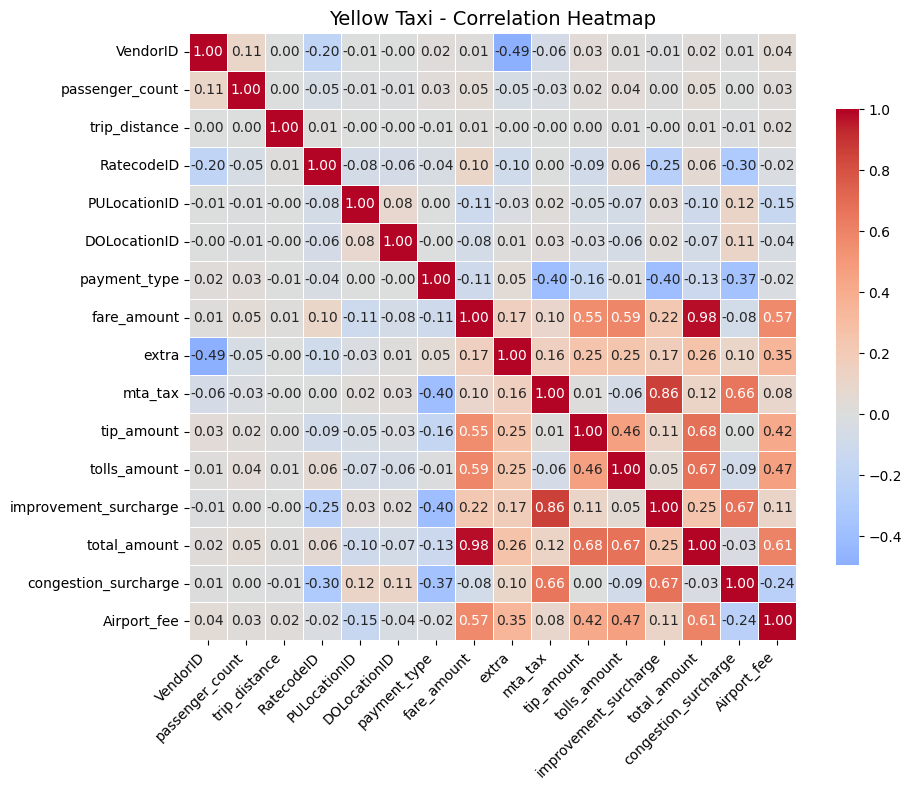


🔗 Correlation Heatmap for: Green Taxi (Pearson method)


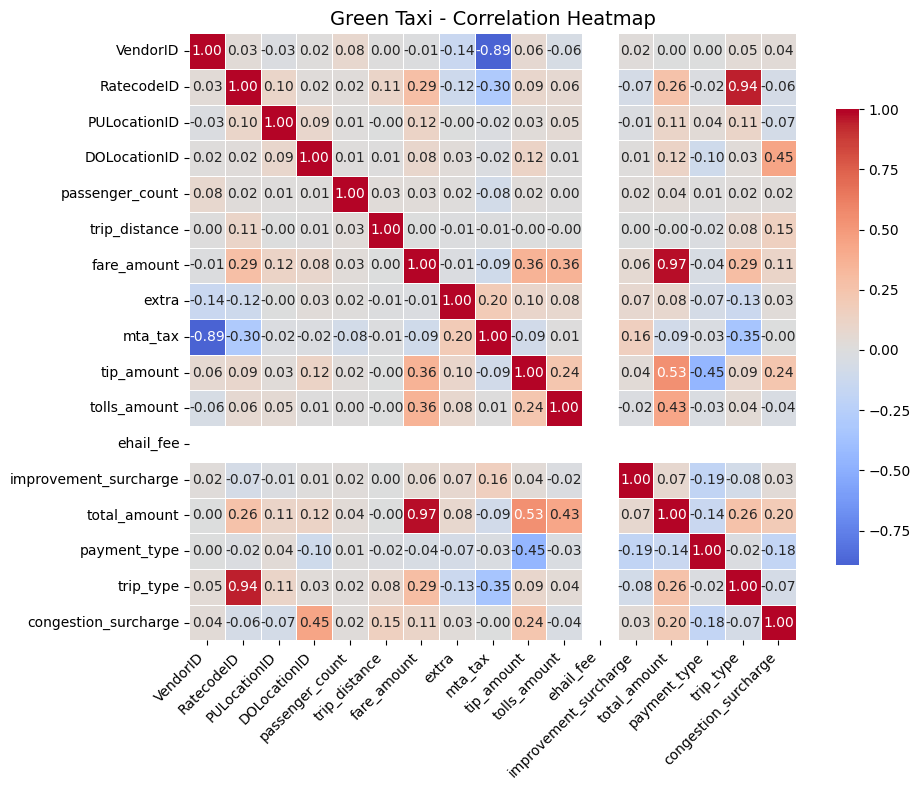


🔗 Correlation Heatmap for: FHV (Pearson method)


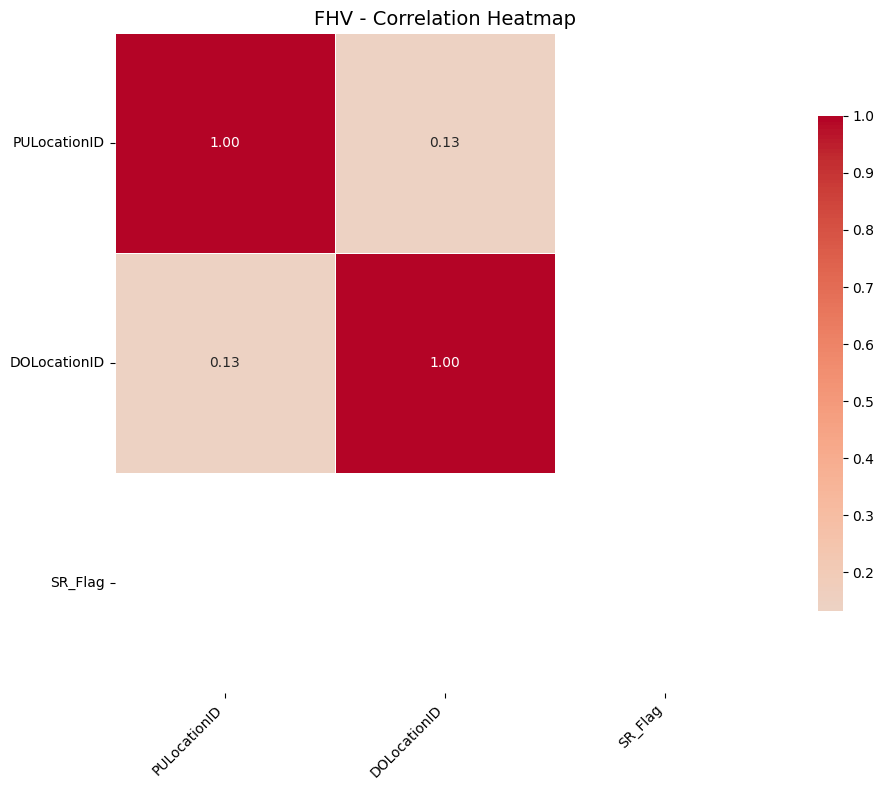


🔗 Correlation Heatmap for: FHVHV (Pearson method)


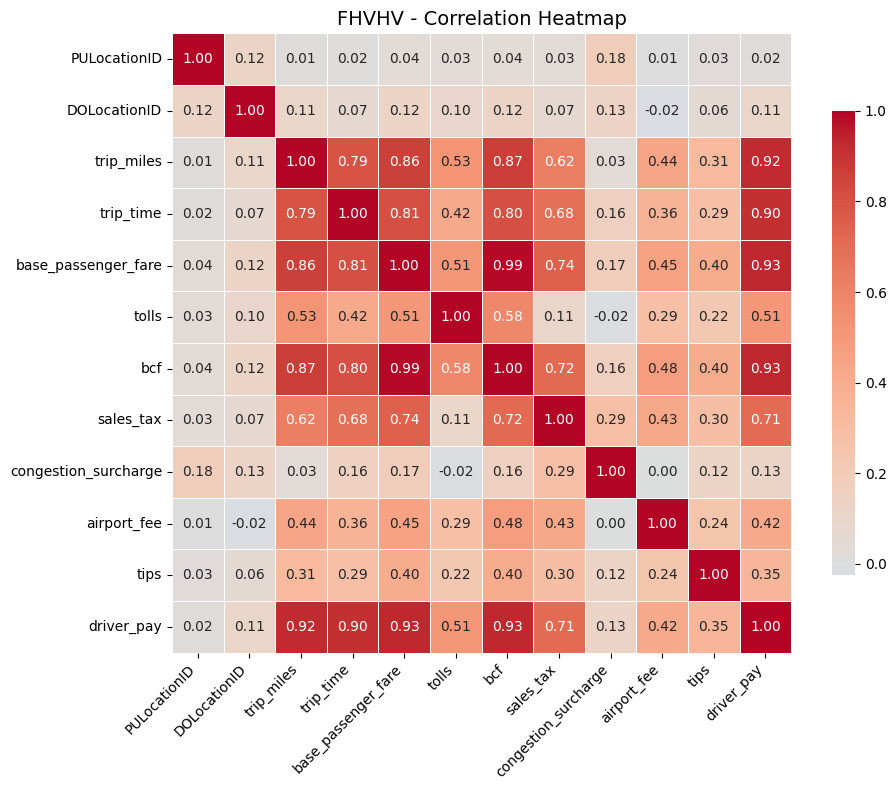

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_summary(df, df_name='DataFrame', figsize=(10, 8), method='pearson'):
    print(f"\n{'='*80}")
    print(f"🔗 Correlation Heatmap for: {df_name} ({method.title()} method)")
    
    num_cols = df.select_dtypes(include='number')
    if num_cols.shape[1] < 2:
        print("⚠️ Not enough numerical columns to compute correlation.")
        return

    corr_matrix = num_cols.corr(method=method)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.75}
    )
    plt.title(f"{df_name} - Correlation Heatmap", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
# Show correlation heatmaps for all dataframes
correlation_summary(yellow, 'Yellow Taxi')
correlation_summary(green, 'Green Taxi')
correlation_summary(fhvhv, 'FHVHV')


# checking for duplicate rows

In [21]:
# checking for duplicate rows
def check_duplicates(df, df_name='DataFrame'):

    """Check for duplicate rows in a DataFrame and export them if found."""


    print(f"\n{'='*80}")
    print(f"🔍 Checking for duplicates in: {df_name}")
    duplicate_rows = df.duplicated().sum()
    
    if duplicate_rows > 0:
        print(f"⚠️ Found {duplicate_rows} duplicate rows.")
    else:
        print("✅ No duplicate rows found.")
    
    # Define the output directory and ensure it exists
    import os
    output_dir = "9 Jun.25"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created directory: {output_dir}")

    if duplicate_rows > 0:
        duplicates = df[df.duplicated(keep=False)]  # Get all duplicates (keeping all copies)
        output_path = os.path.join(output_dir, f"{df_name}_duplicates.csv")
        duplicates.to_csv(output_path, index=False)
        print(f"Duplicate rows exported to {output_path}")
        
        # Drop duplicates (keeping the first occurrence)
        df = df.drop_duplicates().reset_index(drop=True)
        print(f"🔄 Dropped {duplicate_rows} duplicate rows from {df_name}.")
    else:
        print("No duplicate rows to export.")
    
    return df  # Return the DataFrame with duplicates removed

# Check for duplicates in each DataFrame
yellow = check_duplicates(yellow, 'Yellow Taxi')
green = check_duplicates(green, 'Green Taxi')
fhvhv = check_duplicates(fhvhv, 'FHVHV')





🔍 Checking for duplicates in: Yellow Taxi
✅ No duplicate rows found.
No duplicate rows to export.

🔍 Checking for duplicates in: Green Taxi
✅ No duplicate rows found.
No duplicate rows to export.

🔍 Checking for duplicates in: FHVHV
✅ No duplicate rows found.
No duplicate rows to export.



🕳️ Missing Value Summary for: yellow
                      Missing Count  Missing %
passenger_count              200800       9.75
RatecodeID                   200800       9.75
store_and_fwd_flag           200800       9.75
congestion_surcharge         200800       9.75
Airport_fee                  200800       9.75
DO_ServiceZone                18639       0.91
DO_Zone                        9474       0.46
DO_Borough                     9165       0.45
PU_ServiceZone                 7311       0.36
PU_Zone                        6089       0.30
PU_Borough                     1222       0.06


<Figure size 1000x400 with 0 Axes>

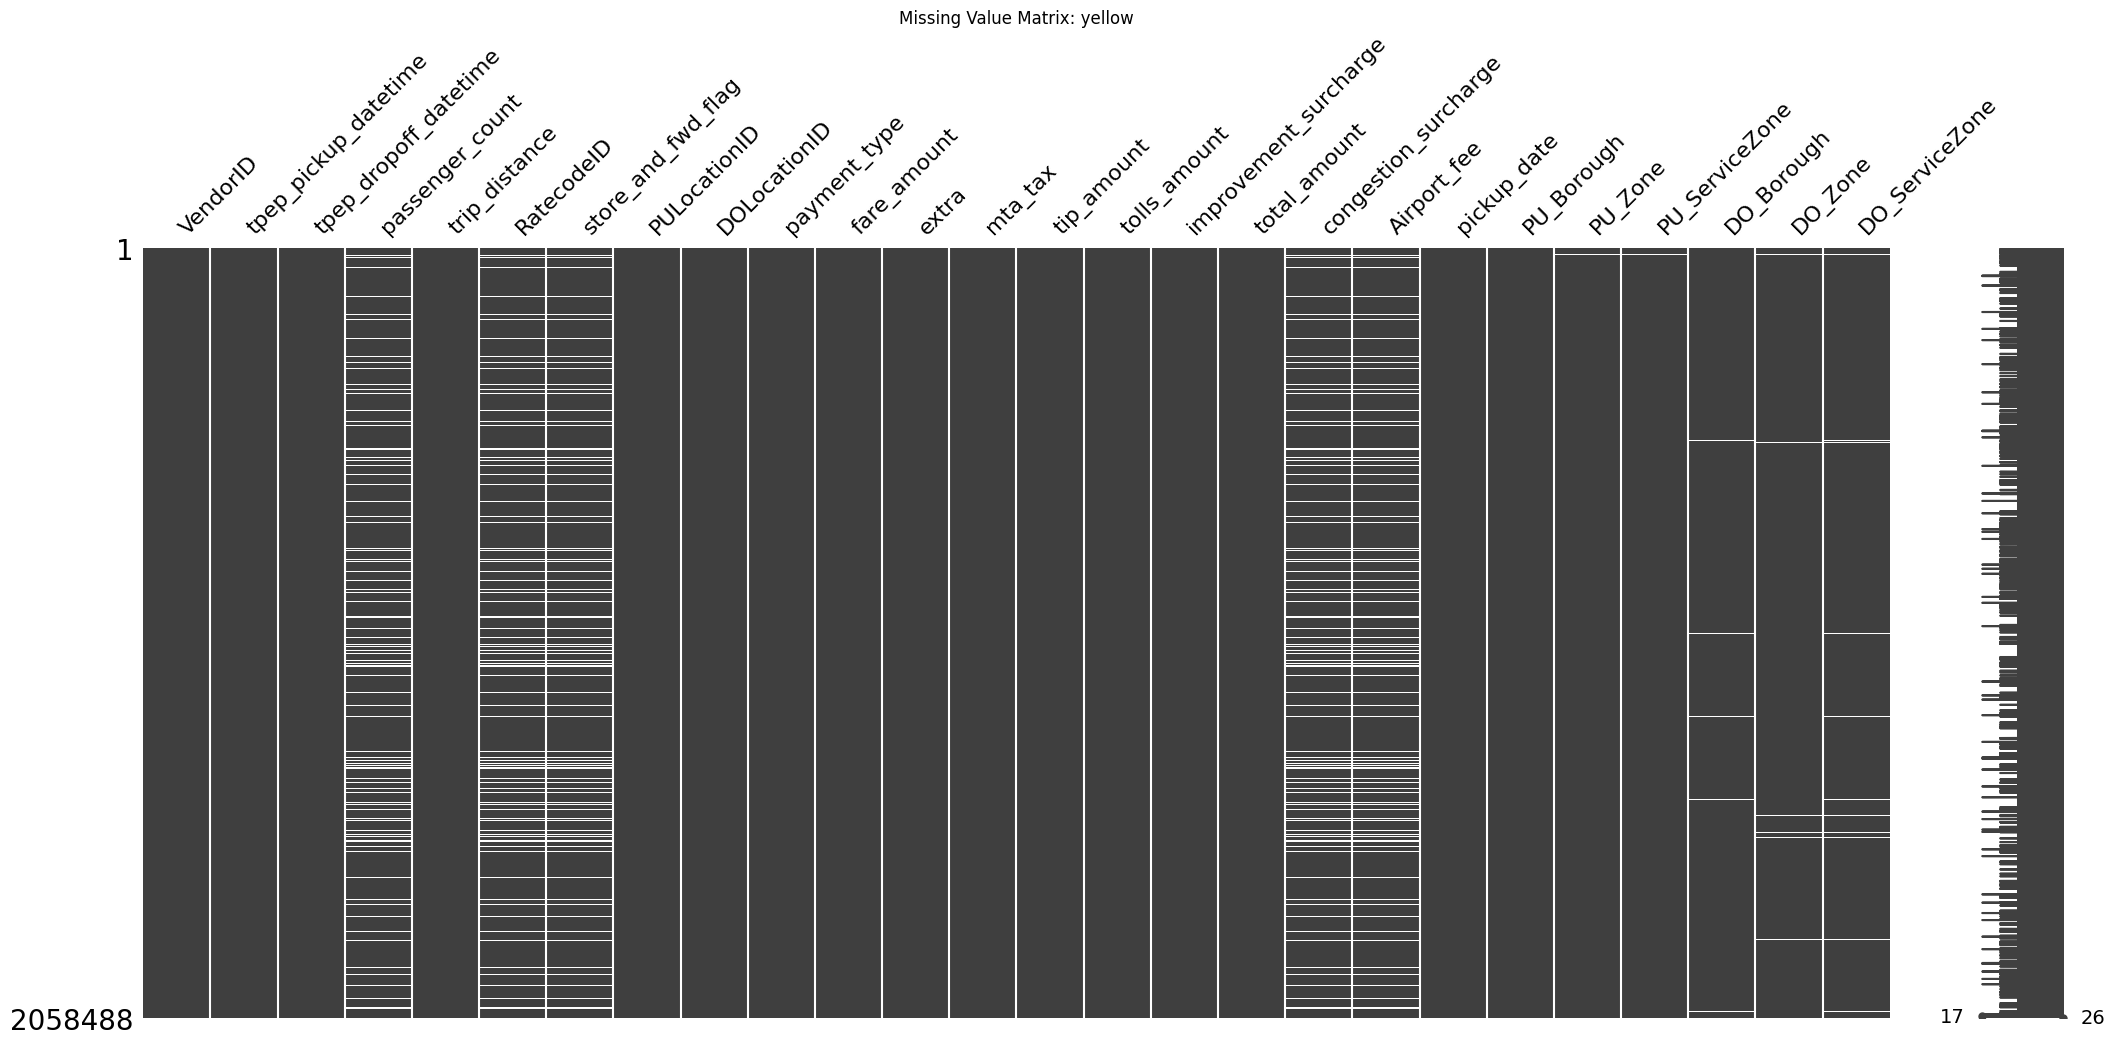

<Figure size 600x400 with 0 Axes>

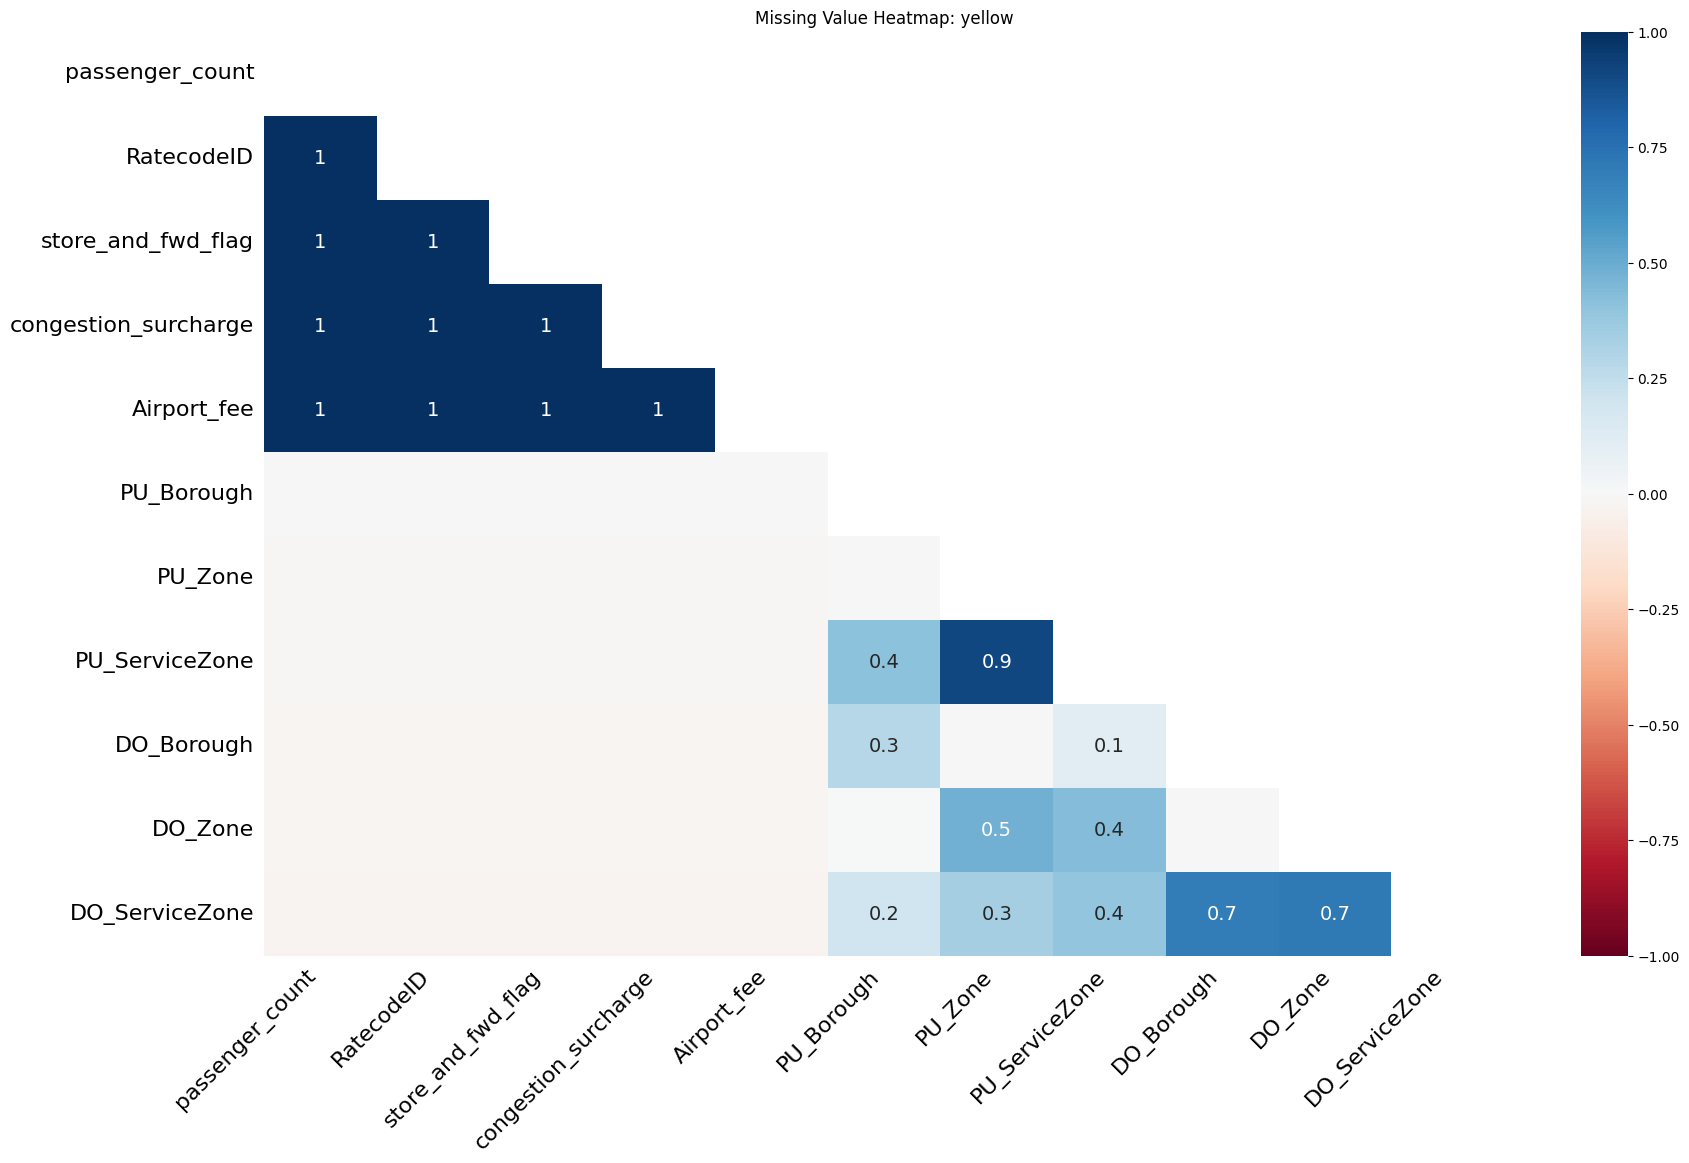


🕳️ Missing Value Summary for: green
                      Missing Count  Missing %
ehail_fee                     33012     100.00
trip_type                      1207       3.66
store_and_fwd_flag             1206       3.65
passenger_count                1206       3.65
RatecodeID                     1206       3.65
payment_type                   1206       3.65
congestion_surcharge           1206       3.65
DO_ServiceZone                  424       1.28
DO_Zone                         283       0.86
DO_Borough                      141       0.43
PU_ServiceZone                   93       0.28
PU_Zone                          69       0.21
PU_Borough                       24       0.07


<Figure size 1000x400 with 0 Axes>

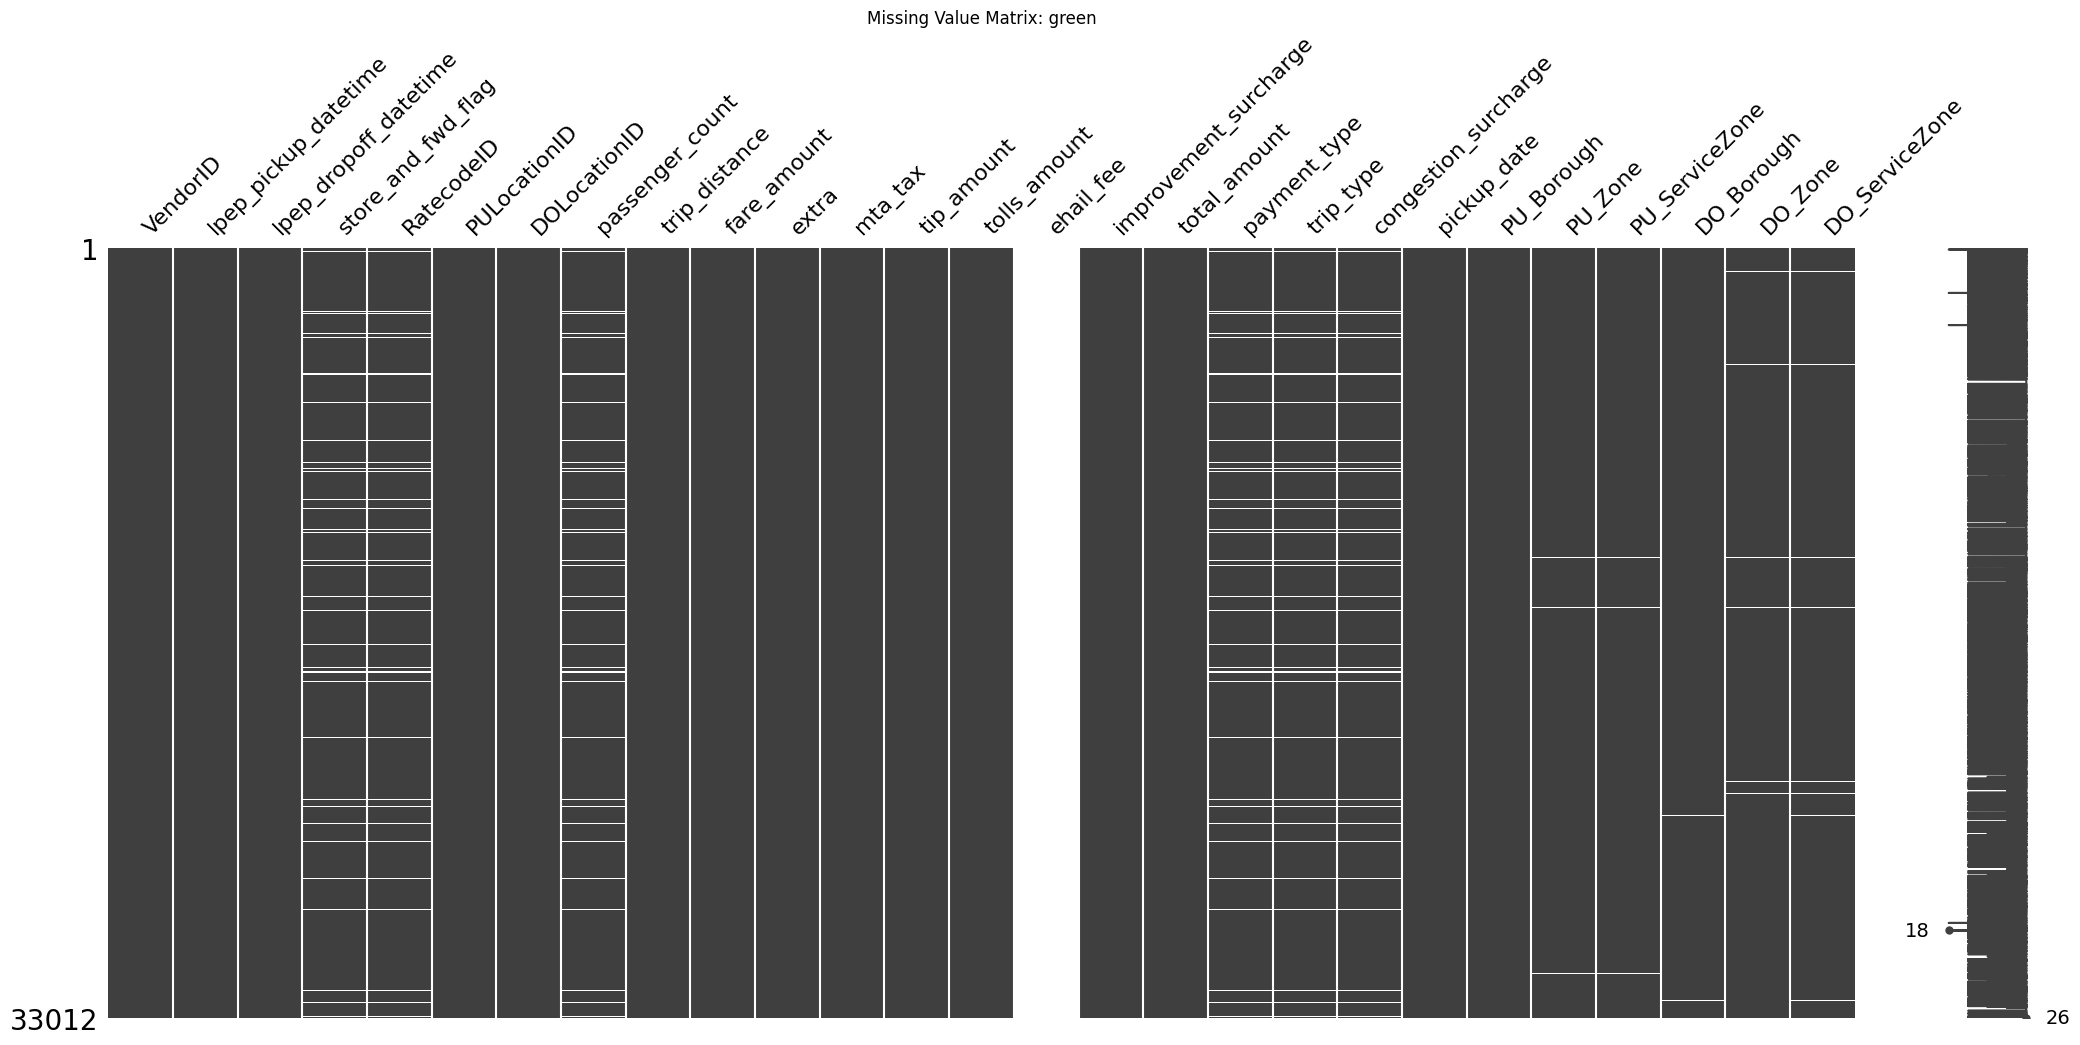

<Figure size 600x400 with 0 Axes>

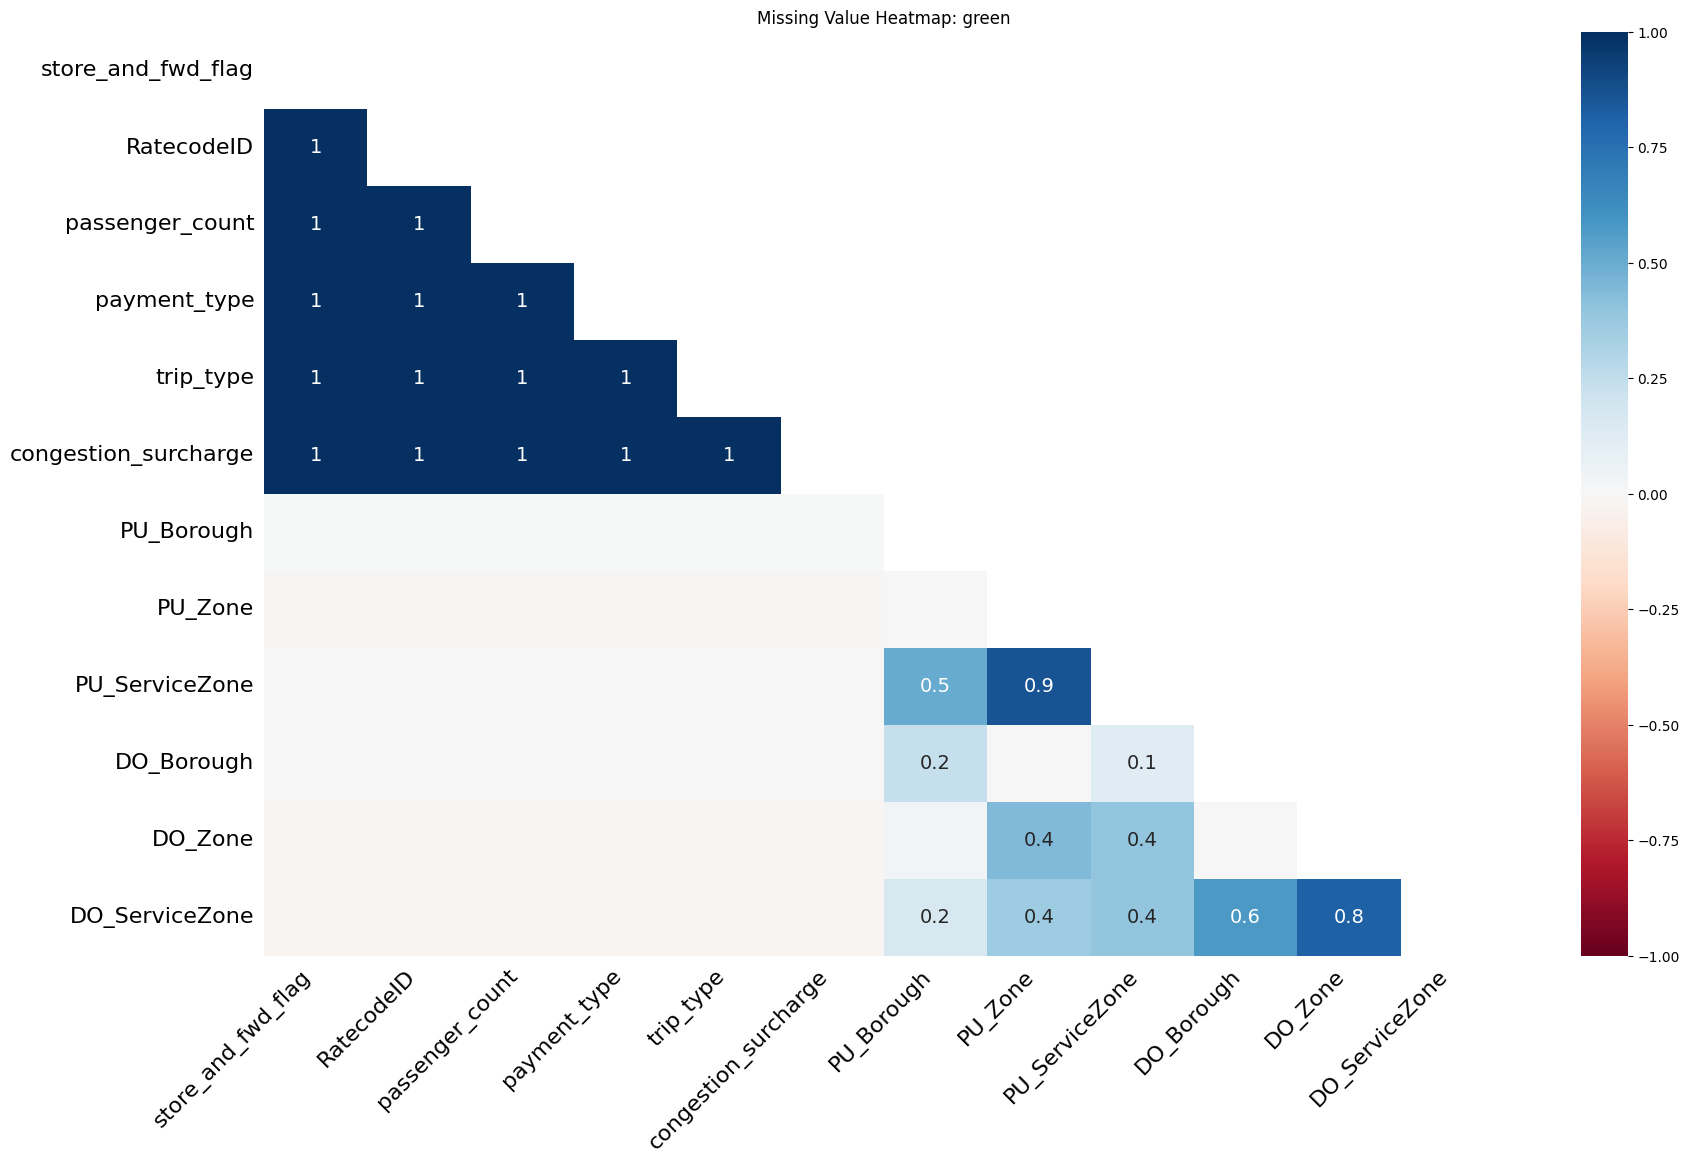


🕳️ Missing Value Summary for: fhvhv
                      Missing Count  Missing %
originating_base_num        3013291      25.17
on_scene_datetime           3010172      25.14
DO_ServiceZone               500540       4.18
DO_Borough                   500540       4.18
PU_ServiceZone                  449       0.00
PU_Borough                      449       0.00


<Figure size 1000x400 with 0 Axes>

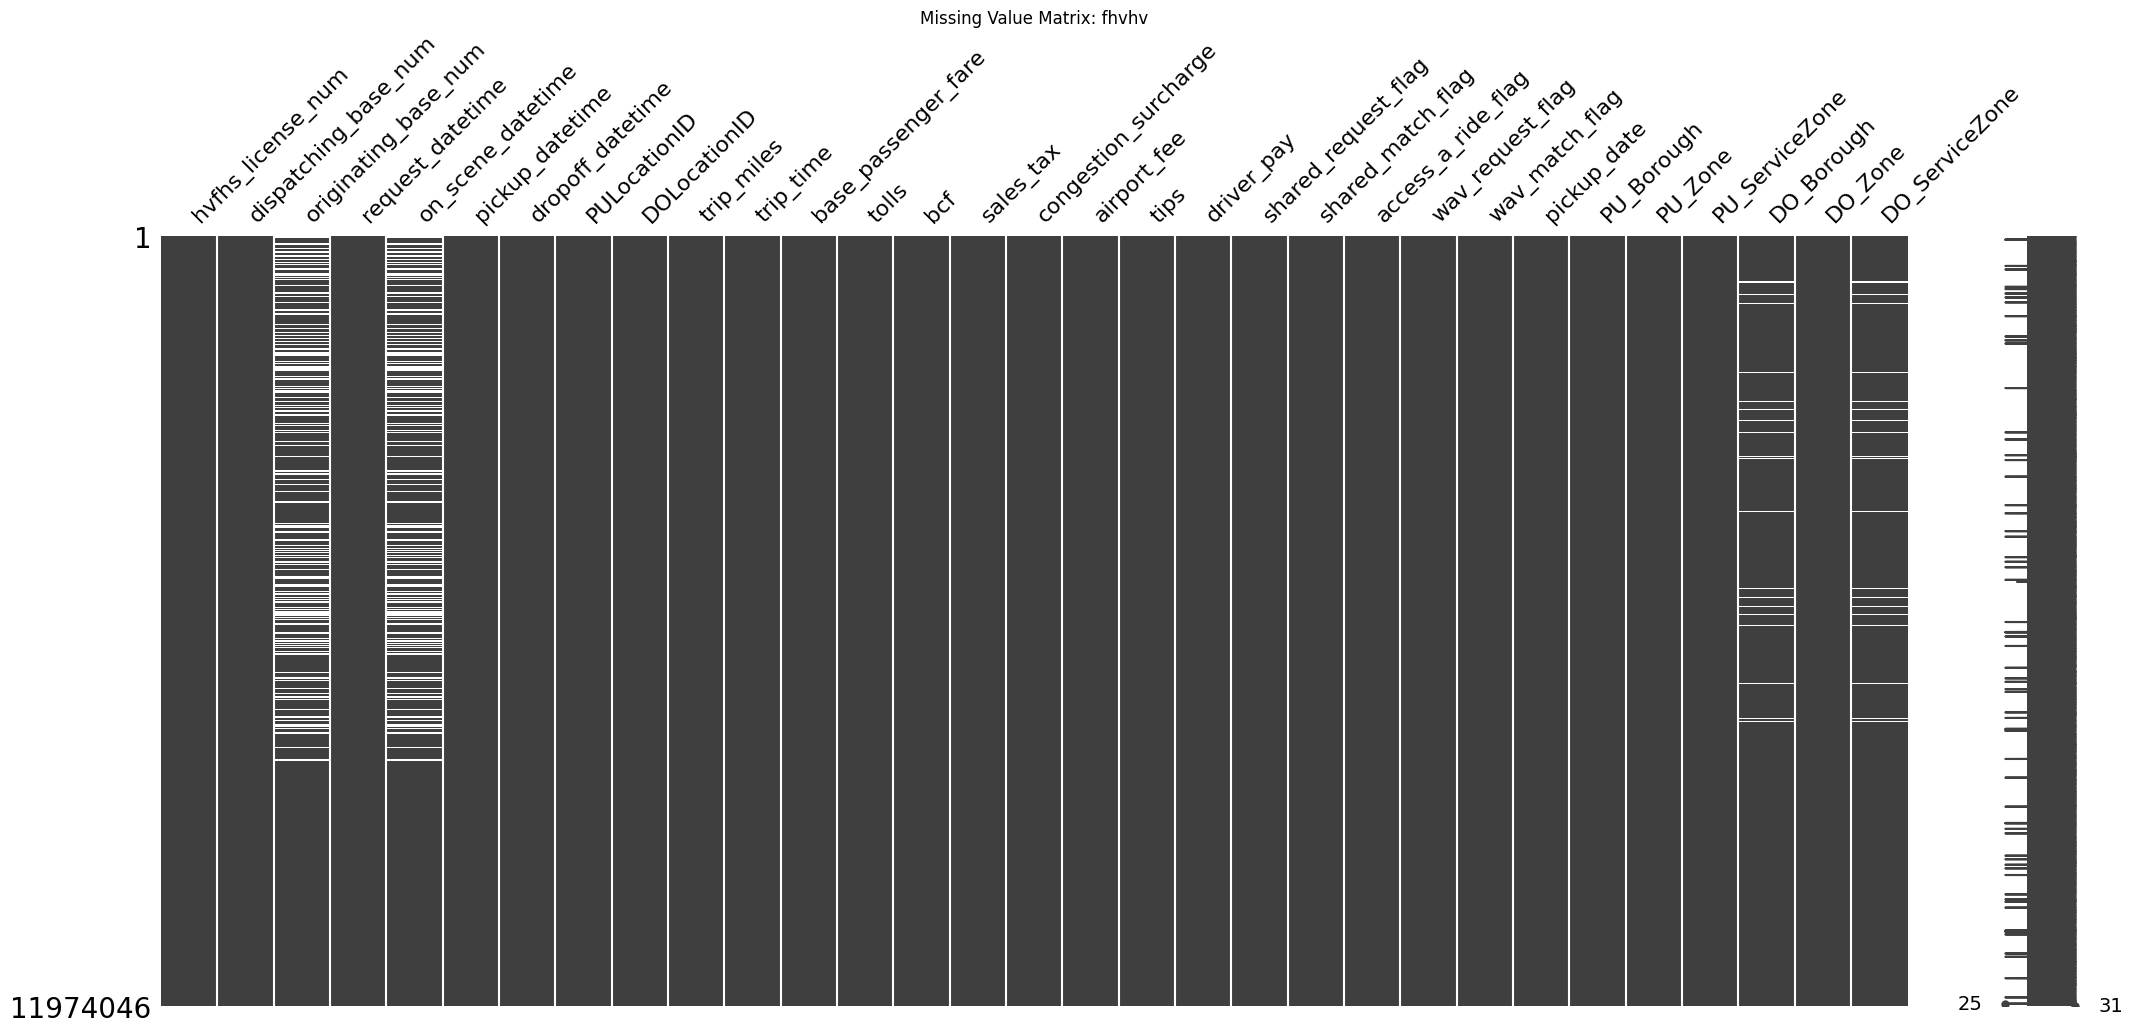

<Figure size 600x400 with 0 Axes>

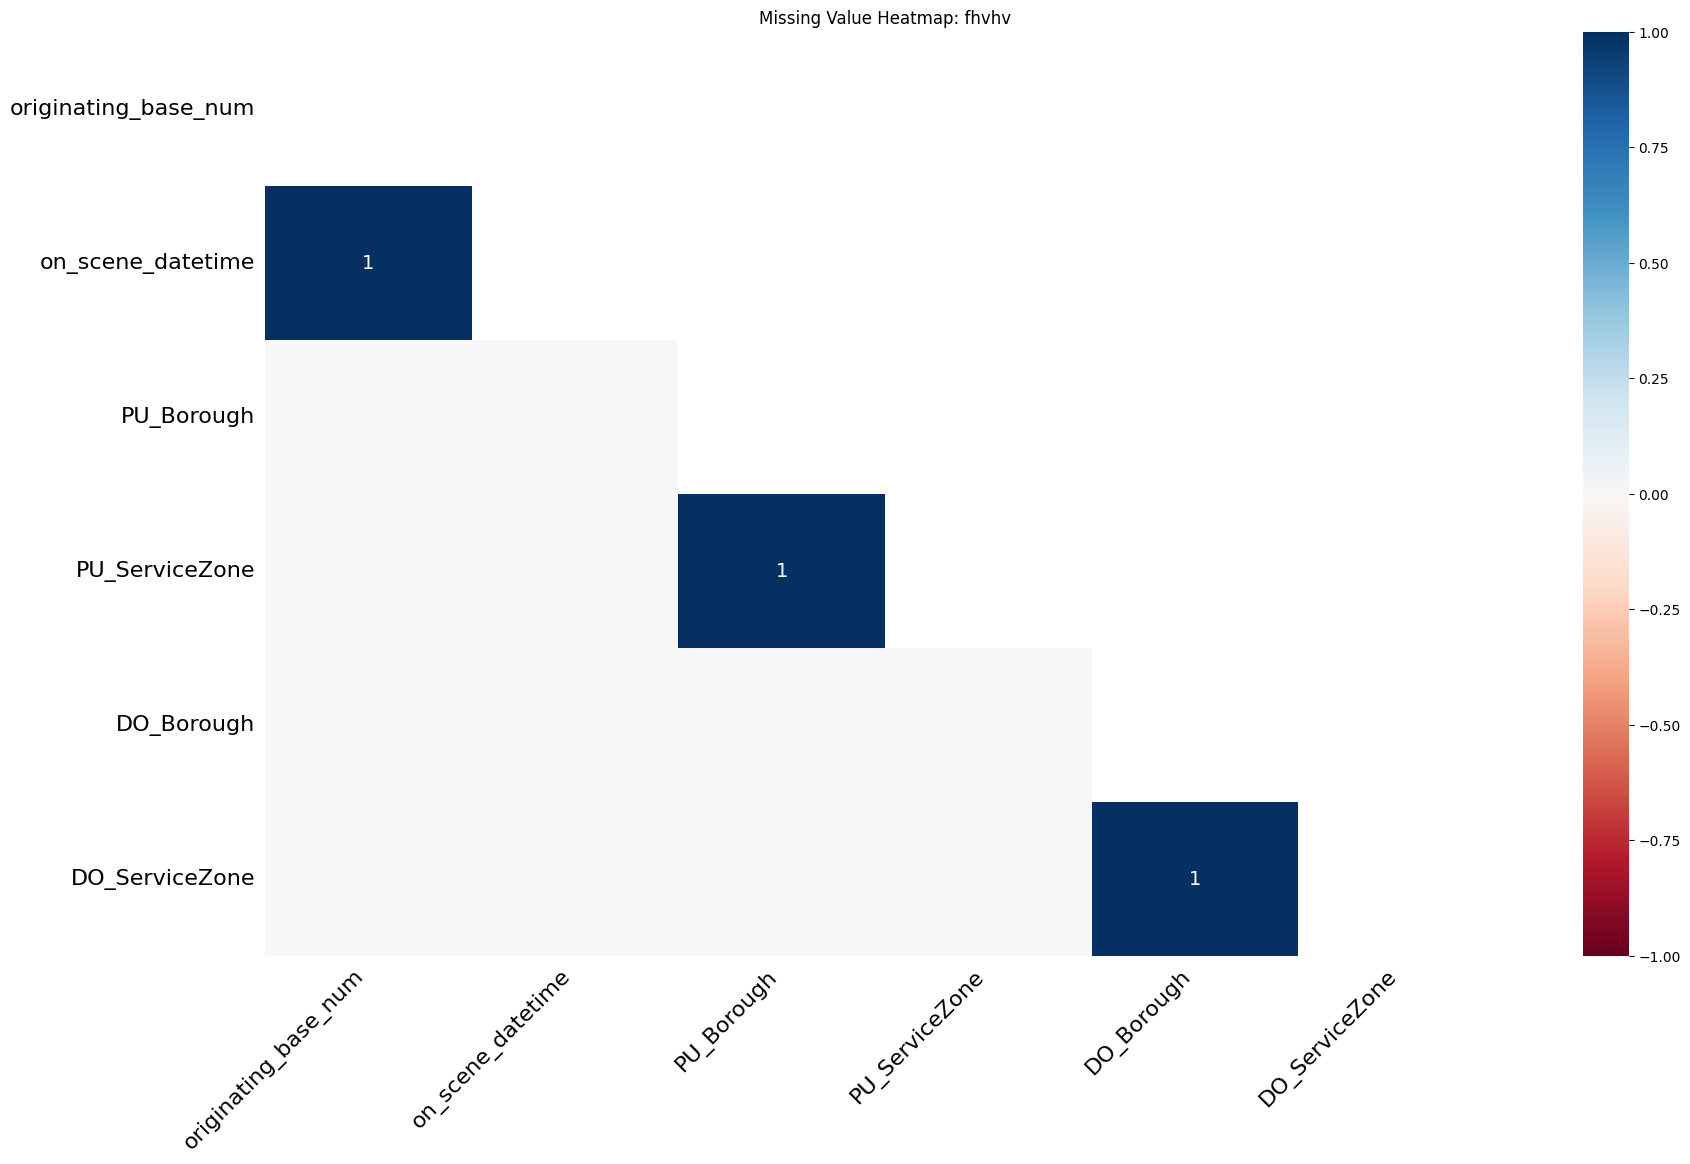

In [22]:
def missing_summary(df, df_name='DataFrame', plot=False):
    print(f"\n{'='*80}")
    print(f"🕳️ Missing Value Summary for: {df_name}")
    
    # Get missing values count and percentage
    missing = df.isna().sum()
    missing = missing[missing > 0]
    
    if missing.empty:
        print("✅ No missing values.")
        return
    
    missing_percent = (missing / len(df)) * 100
    summary = pd.DataFrame({
        'Missing Count': missing,
        'Missing %': missing_percent.round(2)
    }).sort_values(by='Missing %', ascending=False)

    print(summary.to_string())  # Changed from display() to print()

    # Show visualizations if enabled
    if plot:  # Changed from show_plots to plot
        plt.figure(figsize=(10, 4))
        msno.matrix(df)
        plt.title(f'Missing Value Matrix: {df_name}')
        plt.show()

        plt.figure(figsize=(6, 4))
        msno.heatmap(df)
        plt.title(f'Missing Value Heatmap: {df_name}')
        plt.show()

# DataFrames to check for missing values
missing_summary(yellow, 'yellow', plot=True)
missing_summary(green, 'green', plot=True)
missing_summary(fhvhv, 'fhvhv', plot=True)

 # FHVHV imputing missing values

  # - on_scene_datetime
     - To impute missing values in the on_scene_datetime column for the FHVHV (High Volume For-Hire Vehicle) dataset, you can logically estimate its value based on the surrounding time columns:

request_datetime: when the passenger requested the ride

on_scene_datetime: when the vehicle arrived at pickup point

pickup_datetime: when the ride actually began

✅ Assumptions
For imputation:

request_datetime ≤ on_scene_datetime ≤ pickup_datetime

A reasonable time delta (arrival lag) exists between request and on-scene time

✅ Strategy
For rows with missing on_scene_datetime, impute as:

If both request_datetime and pickup_datetime are present:

Use the average delta between request and on_scene from available data

Then estimate:

ini
Copy
Edit
on_scene_datetime = request_datetime + avg_arrival_delta
If delta is too large or not trustworthy, you can fallback to:

ini
Copy
Edit
on_scene_datetime = request_datetime + 2 minutes
(Assuming short dispatch time)



In [23]:
def impute_on_scene_datetime_inplace(df):
    # Ensure datetime columns
    for col in ['request_datetime', 'on_scene_datetime', 'pickup_datetime']:
        df[col] = pd.to_datetime(df[col], errors='coerce')

    # Compute valid deltas (on_scene - request)
    valid_mask = df['on_scene_datetime'].notna() & df['request_datetime'].notna()
    df['arrival_delta'] = (df['on_scene_datetime'] - df['request_datetime']).dt.total_seconds()

    # Get median of realistic arrival delays (0 to 30 minutes)
    df_valid = df[valid_mask & (df['arrival_delta'] > 0) & (df['arrival_delta'] < 1800)]
    avg_arrival_seconds = df_valid['arrival_delta'].median()

    print(f"📏 Median dispatch-to-arrival time: {avg_arrival_seconds:.1f} seconds")

    # Impute missing 'on_scene_datetime'
    missing_mask = df['on_scene_datetime'].isna() & df['request_datetime'].notna()
    df.loc[missing_mask, 'on_scene_datetime'] = df.loc[missing_mask, 'request_datetime'] + pd.to_timedelta(avg_arrival_seconds, unit='s')

    # Drop helper column
    df.drop(columns='arrival_delta', inplace=True)

    print(f"✅ Imputed rows: {missing_mask.sum()} / {len(df):,}")

impute_on_scene_datetime_inplace(fhvhv)


📏 Median dispatch-to-arrival time: 174.0 seconds
✅ Imputed rows: 3010172 / 11,974,046


 # originating_base_num 
  - we  CAN safely impute missing originating_base_num using dispatching_base_num in this dataset.

  - Because the dominant mapping is 1:1 with >99% consistency

  - So we can Drop this column (originating_base_num )

In [24]:
# Show the mapping of each dispatching_base_num to its originating_base_num counts
mapping_details = (
    fhvhv[['dispatching_base_num', 'originating_base_num']]
    .dropna()
    .value_counts()
    .reset_index(name='count')
    .sort_values(by=['dispatching_base_num', 'count'], ascending=[True, False])
)

print(mapping_details)


  dispatching_base_num originating_base_num    count
0               B03404               B03404  8950941
2               B03404               B03153       80
3               B03404               B02026       20
5               B03404               B01312        1
6               B03404               B00887        1
1               B03406               B03406     9706
4               B03406               B03380        6


In [25]:
fhvhv.drop(columns='originating_base_num', inplace=True)


# DO_ServiceZone         
# DO_Borough      
# PU_ServiceZone     
# PU_Borough
 - mode() is the best practice for categorical imputation based on LocationID, especially when those mappings come from official lookup tables like taxi_zone_lookup.csv
  - These IDs don’t have a valid borough/zone, so if you apply .mode() on them, you risk imputing a fake Borough or Zone that doesn't actually match real NYC geography.
  - ✅ Fills missing boroughs, zones, and service zones
✅ Skips invalid LocationIDs 264 and 265
✅ Explicitly assigns "Unknown" or "Outside NYC" to those special IDs

In [33]:
# Safe mode-based imputation for valid locations only
for col, loc_col in [('PU_Borough', 'PULocationID'), ('DO_Borough', 'DOLocationID'),
                     ('PU_Zone', 'PULocationID'), ('DO_Zone', 'DOLocationID'),
                     ('PU_ServiceZone', 'PULocationID'), ('DO_ServiceZone', 'DOLocationID')]:
    
    if col in fhvhv.columns:
        # Exclude 264 and 265 from group-based imputation
        mask_valid = ~fhvhv[loc_col].isin([264, 265])
        fhvhv.loc[mask_valid, col] = fhvhv[mask_valid].groupby(loc_col)[col].transform(
            lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
        )

# Explicitly assign for LocationID = 264 (Unknown)
fhvhv.loc[fhvhv['PULocationID'] == 264, ['PU_Borough', 'PU_Zone', 'PU_ServiceZone']] = 'Unknown'
fhvhv.loc[fhvhv['DOLocationID'] == 264, ['DO_Borough', 'DO_Zone', 'DO_ServiceZone']] = 'Unknown'

# Explicitly assign for LocationID = 265 (Outside NYC)
fhvhv.loc[fhvhv['PULocationID'] == 265, ['PU_Borough', 'PU_Zone', 'PU_ServiceZone']] = 'Outside NYC'
fhvhv.loc[fhvhv['DOLocationID'] == 265, ['DO_Borough', 'DO_Zone', 'DO_ServiceZone']] = 'Outside NYC'


In [34]:
# Import if not already
import pandas as pd

# Create summary table of missing values
missing_summary = (
    fhvhv.isnull().sum()
    .reset_index(name='Missing Count')
    .rename(columns={'index': 'Column'})
)

# Add % missing
missing_summary['Missing %'] = (missing_summary['Missing Count'] / len(fhvhv) * 100).round(2)

# Filter to only columns with missing values (optional)
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

# Sort by % missing descending
missing_summary = missing_summary.sort_values(by='Missing %', ascending=False)

print(missing_summary)


Empty DataFrame
Columns: [Column, Missing Count, Missing %]
Index: []


 # Numrical Columns Inspect

In [42]:
import pandas as pd

# Select numeric columns only
numeric_cols = fhvhv.select_dtypes(include=['number']).columns

# Summary statistics: min, max, mean, std, percentiles
summary_stats = fhvhv[numeric_cols].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]).T
summary_stats = summary_stats[['min', '1%', '25%', '50%', '75%', '99%', 'max', 'mean', 'std']]
summary_stats = summary_stats.sort_values(by='max', ascending=False)

# Add count of negatives and NaNs
summary_stats['neg_count'] = (fhvhv[numeric_cols] < 0).sum()
summary_stats['nan_count'] = fhvhv[numeric_cols].isna().sum()

# Display summary
pd.set_option("display.float_format", "{:.2f}".format)
print("📊 Numerical Summary of fhvhv:")
display(summary_stats)


📊 Numerical Summary of fhvhv:


,min,1%,25%,50%,75%,99%,max,mean,std,neg_count,nan_count
trip_time,0.00,196.00,604.00,978.00,1554.00,4294.00,42478.00,1207.63,869.27,0,0
base_passenger_fare,-57.46,6.91,12.49,19.60,31.38,117.68,1311.45,26.22,23.07,887,0
driver_pay,-46.94,5.39,8.99,15.09,25.43,83.24,1024.93,20.20,17.19,90,0
trip_miles,0.00,0.48,1.57,3.01,6.38,27.26,469.41,5.08,5.91,0,0
PULocationID,1.00,7.00,75.00,138.00,209.00,261.00,265.00,138.43,74.78,0,0
DOLocationID,1.00,4.00,76.00,141.00,216.00,265.00,265.00,142.02,77.82,0,0
tips,0.00,0.00,0.00,0.00,0.00,16.68,196.00,1.18,3.50,0,0
sales_tax,0.00,0.00,1.03,1.66,2.71,9.50,119.25,2.20,1.89,0,0
tolls,0.00,0.00,0.00,0.00,0.00,21.00,82.67,1.18,4.03,0,0
bcf,0.00,0.18,0.34,0.54,0.89,3.48,36.95,0.75,0.69,0,0


 - Trip Time

In [43]:
import pandas as pd

# Make a copy of your dataframe
fhvhv_check = fhvhv.copy()

# Ensure datetime columns are in correct format
fhvhv_check['pickup_datetime'] = pd.to_datetime(fhvhv_check['pickup_datetime'], errors='coerce')
fhvhv_check['dropoff_datetime'] = pd.to_datetime(fhvhv_check['dropoff_datetime'], errors='coerce')

# 1. Recalculate trip duration in seconds
fhvhv_check['calc_trip_time'] = (fhvhv_check['dropoff_datetime'] - fhvhv_check['pickup_datetime']).dt.total_seconds()

# 2. Investigate absolute difference vs. provided trip_time
fhvhv_check['trip_time_diff'] = fhvhv_check['calc_trip_time'] - fhvhv_check['trip_time']

# 3. Summarize correlation and major issues
correlation = fhvhv_check[['trip_time', 'calc_trip_time']].corr().iloc[0, 1]
print(f"📊 Correlation between 'trip_time' and calculated trip time: {correlation:.4f}")

# 4. Count extreme mismatches (>5 minutes = 300s)
mismatch_count = (fhvhv_check['trip_time_diff'].abs() > 300).sum()
print(f"⚠️ Mismatched trip times (>5 min diff): {mismatch_count:,} rows")

# Optional: flag suspicious cases
fhvhv_check['trip_time_issue'] = fhvhv_check['trip_time_diff'].abs() > 300

# 5. Distribution summary
print("\n🧮 Distribution of difference (in seconds):")
print(fhvhv_check['trip_time_diff'].describe())


📊 Correlation between 'trip_time' and calculated trip time: 1.0000
⚠️ Mismatched trip times (>5 min diff): 0 rows

🧮 Distribution of difference (in seconds):
count   11973143.00
mean          -0.00
std            0.02
min           -1.00
25%            0.00
50%            0.00
75%            0.00
max            0.00
Name: trip_time_diff, dtype: float64


In [41]:
# Step 1: Recalculate actual trip time from timestamps
fhvhv['calculated_trip_time'] = (fhvhv['dropoff_datetime'] - fhvhv['pickup_datetime']).dt.total_seconds()

# Step 2: Compute the absolute difference
fhvhv['trip_time_diff'] = fhvhv['trip_time'] - fhvhv['calculated_trip_time']

# Step 3: Drop rows with > 5 minutes (300 seconds) mismatch
fhvhv = fhvhv[fhvhv['trip_time_diff'].abs() <= 300].copy()

# Step 4: Drop helper columns
fhvhv.drop(columns=['calculated_trip_time', 'trip_time_diff'], inplace=True)

print("✅ Dropped mismatched trip time rows. Remaining rows:", len(fhvhv))


✅ Dropped mismatched trip time rows. Remaining rows: 11973143


 - base_passenger_fare

In [48]:
# Select only rows with negative base_passenger_fare
negative_fare_df = fhvhv[fhvhv['base_passenger_fare'] < 0].copy()

# Add total of fare-related components
fare_components = ['tolls', 'sales_tax', 'bcf', 'congestion_surcharge', 'airport_fee']
negative_fare_df['fare_components_sum'] = negative_fare_df[fare_components].sum(axis=1)

# Compute difference between base fare and component sum
negative_fare_df['fare_diff'] = negative_fare_df['base_passenger_fare'] - negative_fare_df['fare_components_sum']

# Count and display
print(f"❌ Number of trips with negative base_passenger_fare: {len(negative_fare_df)}\n")

# Display summary statistics
print("📊 Summary of suspicious fare rows:")
print(negative_fare_df[['base_passenger_fare', 'driver_pay', 'sales_tax', 'tolls',
                        'bcf', 'congestion_surcharge', 'airport_fee', 'fare_components_sum', 'fare_diff']].describe())

# Show top 5 suspicious rows
print("\n🔍 Sample of negative fare rows:")
print(negative_fare_df[['base_passenger_fare', 'driver_pay', 'sales_tax', 'tolls',
                        'bcf', 'congestion_surcharge', 'airport_fee', 'fare_components_sum', 'fare_diff']].head())


❌ Number of trips with negative base_passenger_fare: 887

📊 Summary of suspicious fare rows:
       base_passenger_fare  driver_pay  sales_tax  tolls    bcf  \
count               887.00      887.00     887.00 887.00 887.00   
mean                 -5.69       18.73       1.44   0.97   0.45   
std                   7.93       24.87       2.63   2.89   0.81   
min                 -57.46        0.00       0.00   0.00   0.00   
25%                  -5.91        7.37       0.59   0.00   0.18   
50%                  -3.54       12.29       1.01   0.00   0.31   
75%                  -1.58       23.24       1.74   0.00   0.54   
max                  -0.01      395.99      40.16  26.94  12.38   

       congestion_surcharge  airport_fee  fare_components_sum  fare_diff  
count                887.00       887.00               887.00     887.00  
mean                   0.83         0.70                 4.39     -10.08  
std                    1.26         1.12                 5.08      10.81  
min

In [49]:
# Step 1: Identify negative base fare rows
mask = fhvhv['base_passenger_fare'] < 0

# Step 2: Calculate imputed base fare
fhvhv.loc[mask, 'imputed_base_fare'] = (
    fhvhv.loc[mask, 'fare_components_sum'] -
    fhvhv.loc[mask, ['sales_tax', 'tolls', 'bcf', 'congestion_surcharge', 'airport_fee']].sum(axis=1)
)

# Step 3: Replace negative values with imputed values
fhvhv.loc[mask, 'base_passenger_fare'] = fhvhv.loc[mask, 'imputed_base_fare']

# Step 4: Drop the helper column
fhvhv.drop(columns='imputed_base_fare', inplace=True)

# Step 5: Confirm it's clean
print(f"✅ Remaining negative base fares: {(fhvhv['base_passenger_fare'] < 0).sum()}")


✅ Remaining negative base fares: 0


 - driver_pay

In [50]:
# Step 1: Identify negative driver pay rows
mask_neg_driver_pay = fhvhv['driver_pay'] < 0

# Step 2: Compute imputed driver pay
fhvhv.loc[mask_neg_driver_pay, 'imputed_driver_pay'] = (
    fhvhv.loc[mask_neg_driver_pay, 'base_passenger_fare'] + 
    fhvhv.loc[mask_neg_driver_pay, 'tips']
)

# Step 3: Replace negative values with imputed values
fhvhv.loc[mask_neg_driver_pay, 'driver_pay'] = fhvhv.loc[mask_neg_driver_pay, 'imputed_driver_pay']

# Step 4: Clean up
fhvhv.drop(columns='imputed_driver_pay', inplace=True)

# Step 5: Verify result
print(f"✅ Remaining negative driver_pay values: {(fhvhv['driver_pay'] < 0).sum()}")


✅ Remaining negative driver_pay values: 0


In [71]:
fhvhv.drop(columns=[ 'pickup_date'], inplace=True)


In [ ]:
fhvhv.drop(columns=['fare_diff', 'fare_components_sum', 'pickup_date'], inplace=True)


KeyError: "['fare_diff', 'fare_components_sum'] not found in axis"

In [56]:
numeric_cols = [
    'trip_time', 'trip_miles', 'base_passenger_fare', 'driver_pay',
    'sales_tax', 'tolls', 'bcf', 'congestion_surcharge', 'airport_fee', 'tips'
]


In [57]:
outlier_summary = {}

for col in numeric_cols:
    q1 = fhvhv[col].quantile(0.25)
    q3 = fhvhv[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = fhvhv[(fhvhv[col] < lower_bound) | (fhvhv[col] > upper_bound)]
    outlier_summary[col] = {
        'outlier_count': len(outliers),
        'outlier_pct': len(outliers) / len(fhvhv) * 100,
        'min': fhvhv[col].min(),
        'max': fhvhv[col].max(),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

# Print summary
import pandas as pd
pd.DataFrame(outlier_summary).T.sort_values(by='outlier_count', ascending=False)


,outlier_count,outlier_pct,min,max,lower_bound,upper_bound
tips,2292931.00,19.15,0.00,196.00,0.00,0.00
tolls,1630135.00,13.61,0.00,82.67,0.00,0.00
airport_fee,1023455.00,8.55,0.00,7.25,0.00,0.00
trip_miles,899609.00,7.51,0.00,469.41,-5.64,13.59
bcf,845642.00,7.06,0.00,36.95,-0.49,1.72
base_passenger_fare,795870.00,6.65,0.00,1311.45,-15.85,59.72
sales_tax,756646.00,6.32,0.00,119.25,-1.49,5.23
driver_pay,678137.00,5.66,0.00,1024.93,-15.67,50.09
trip_time,538160.00,4.49,0.00,42478.00,-821.00,2979.00
congestion_surcharge,0.00,0.00,0.00,5.50,-4.12,6.88


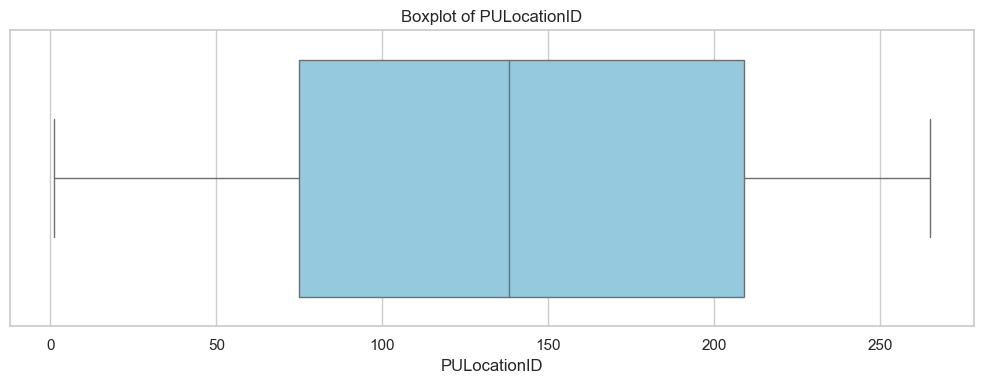

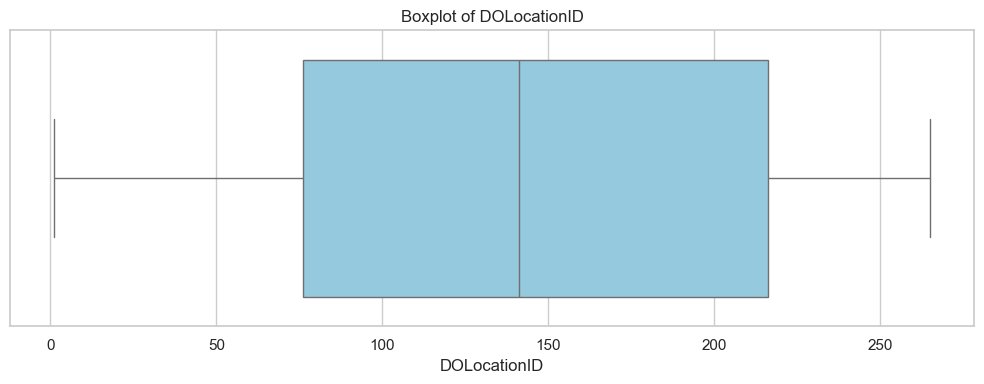

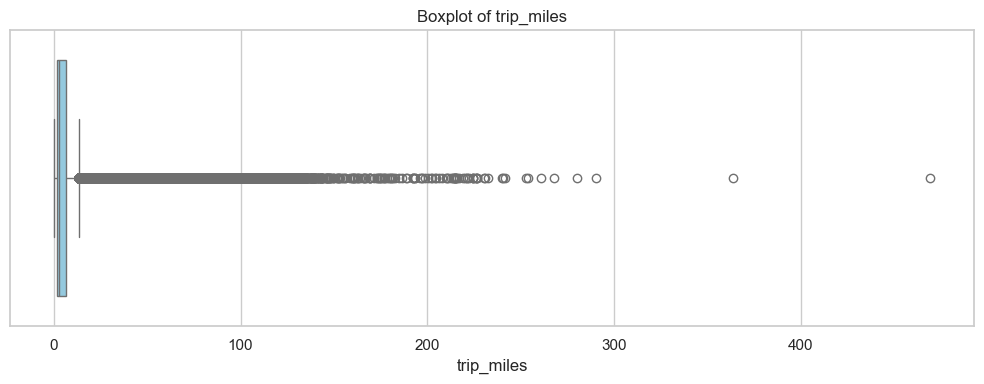

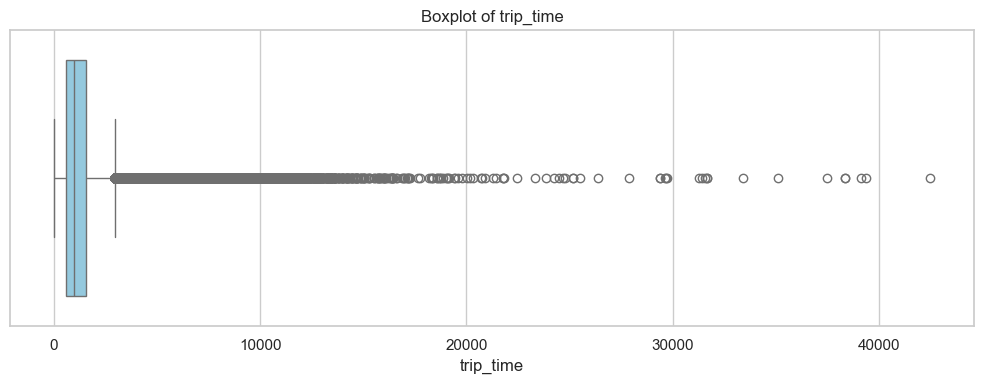

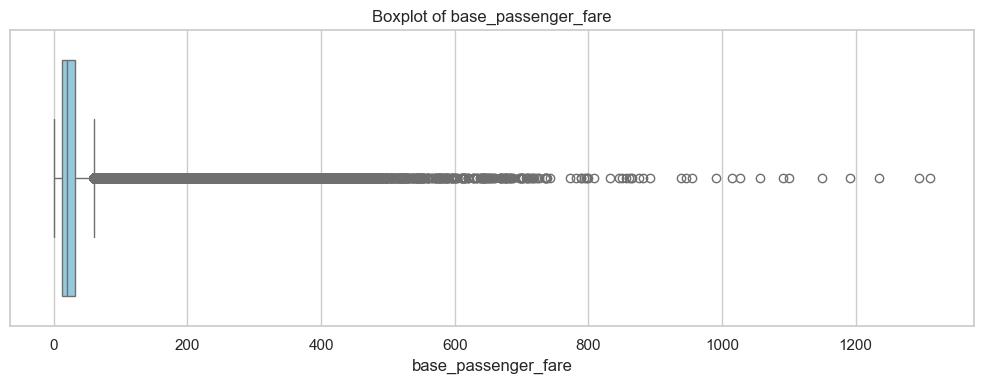

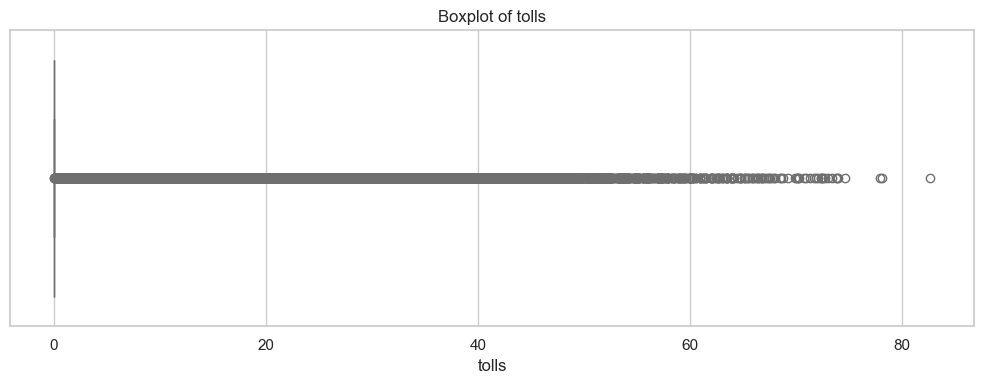

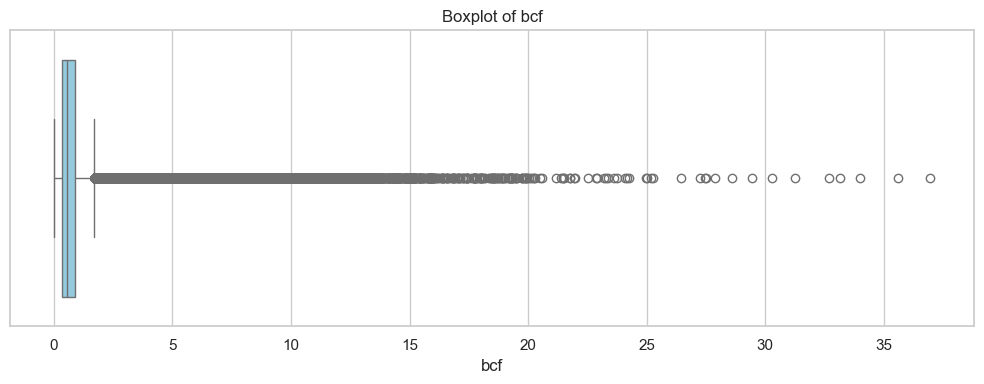

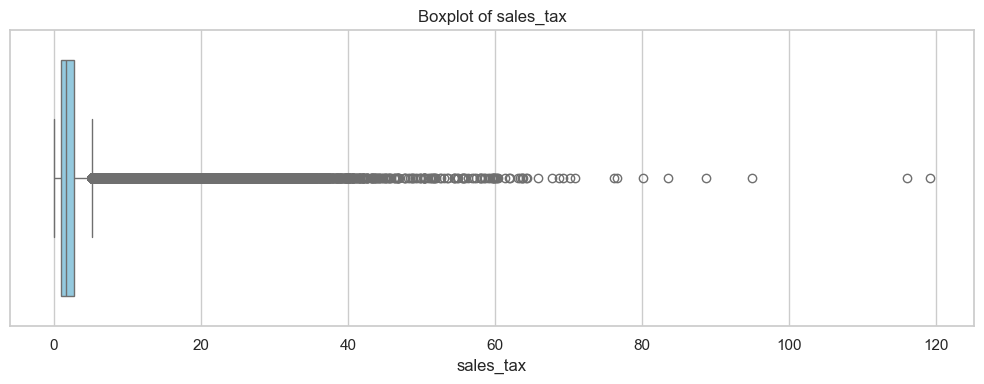

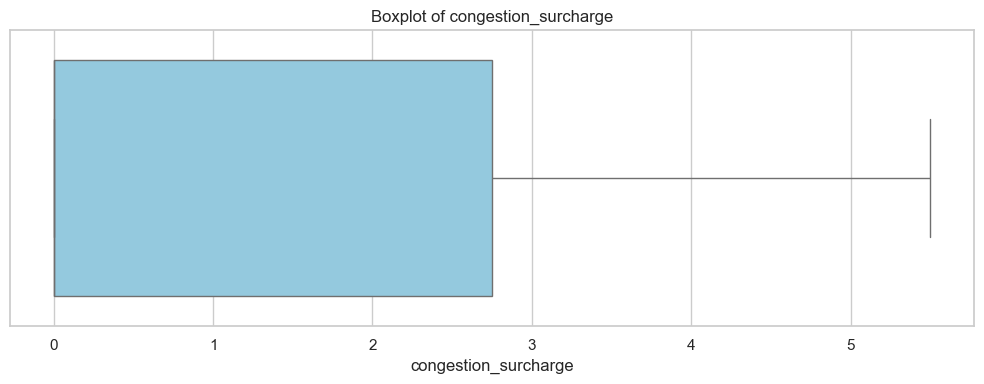

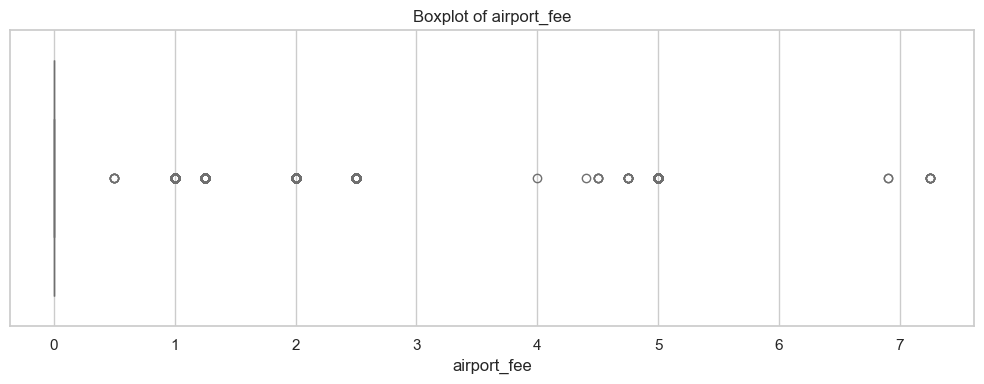

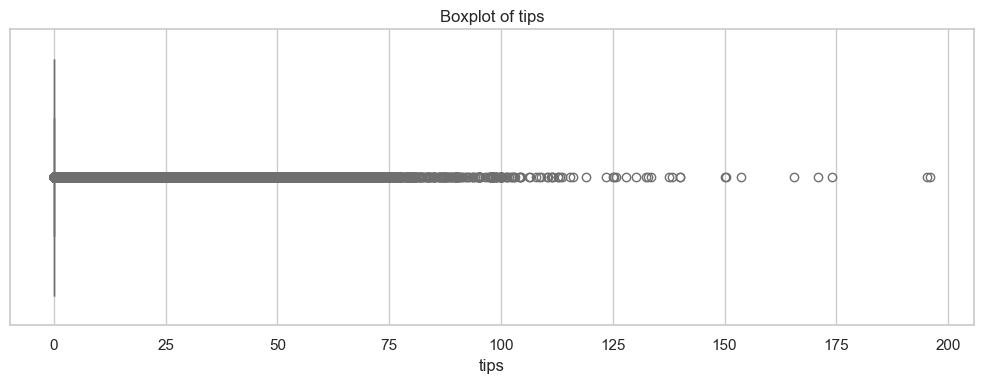

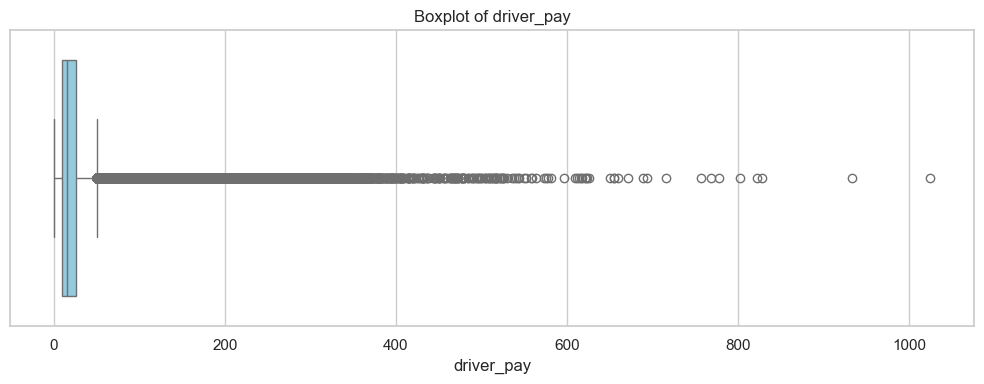

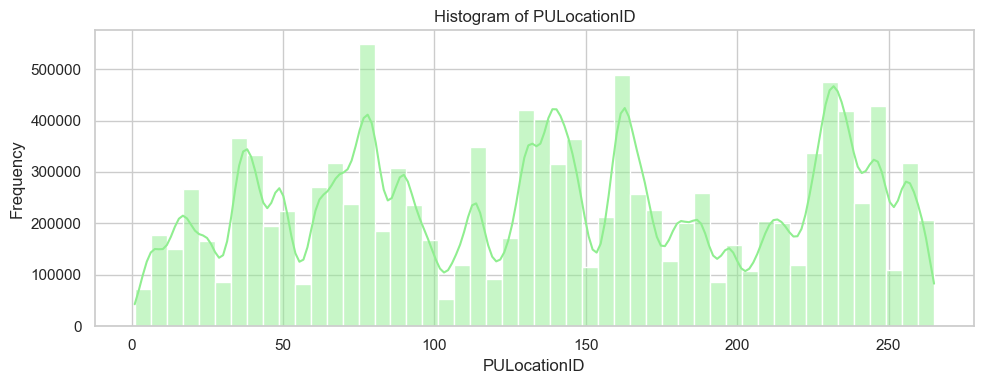

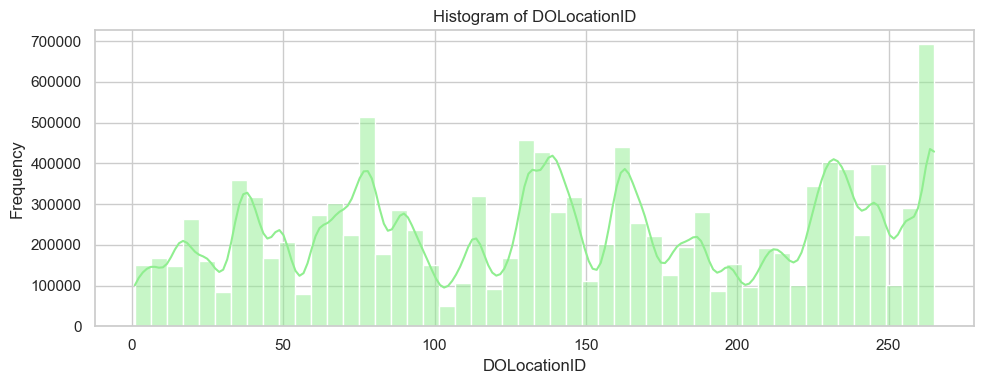

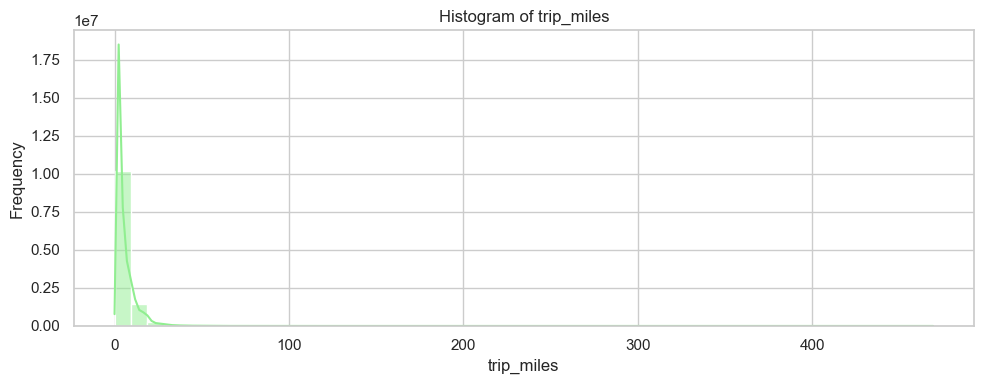

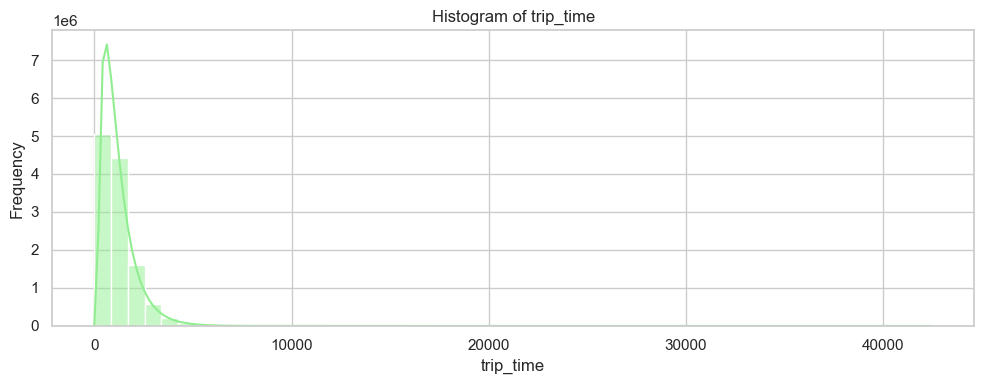

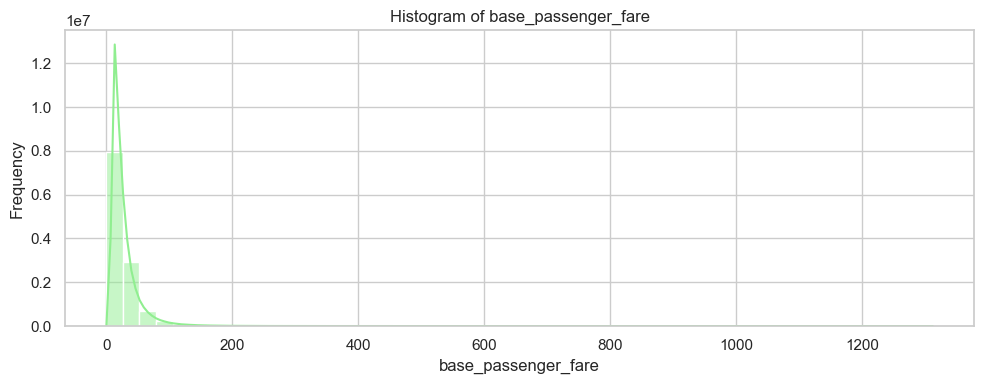

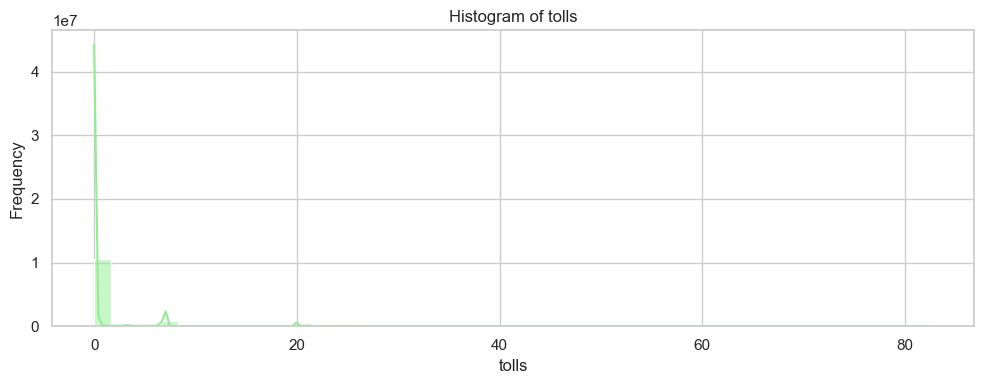

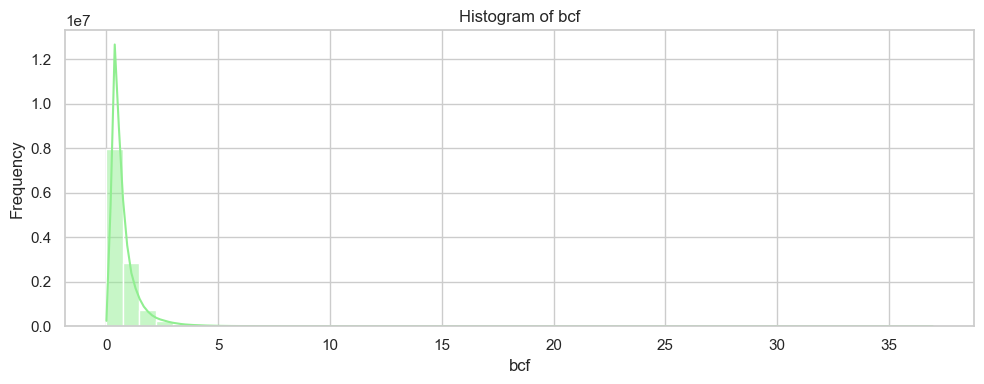

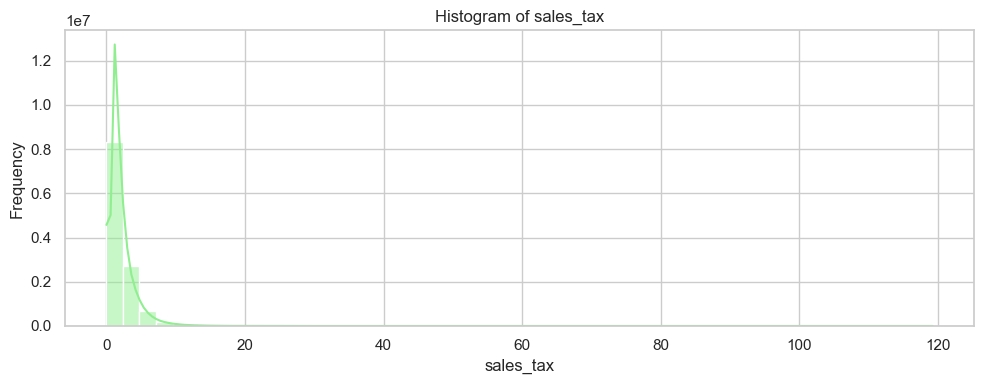

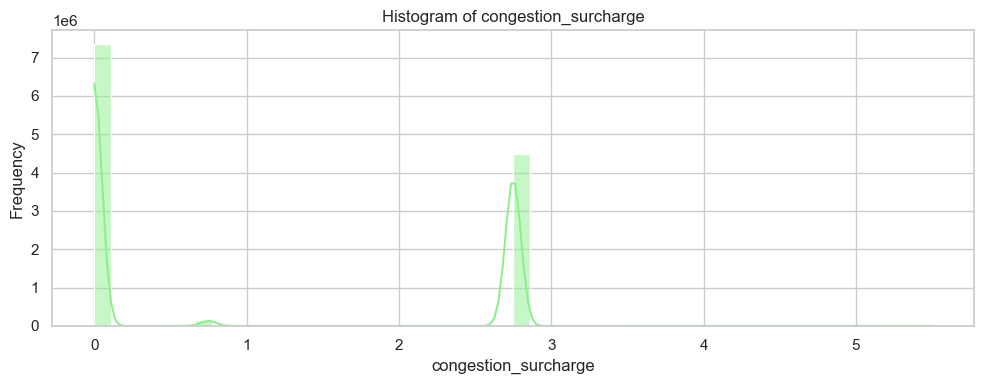

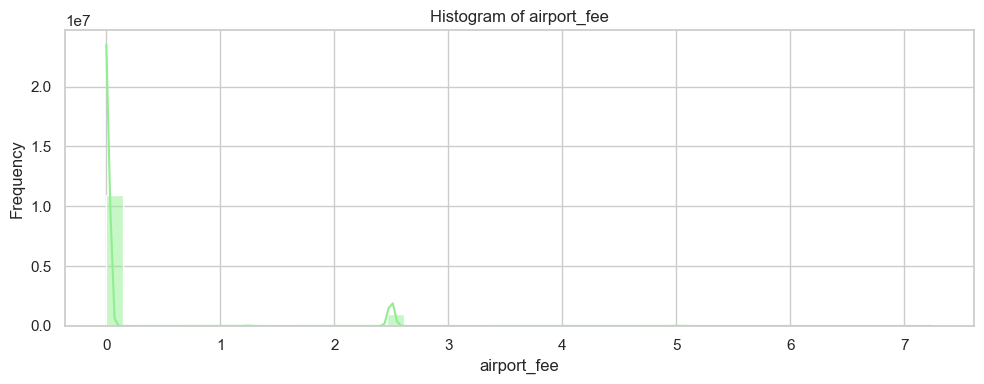

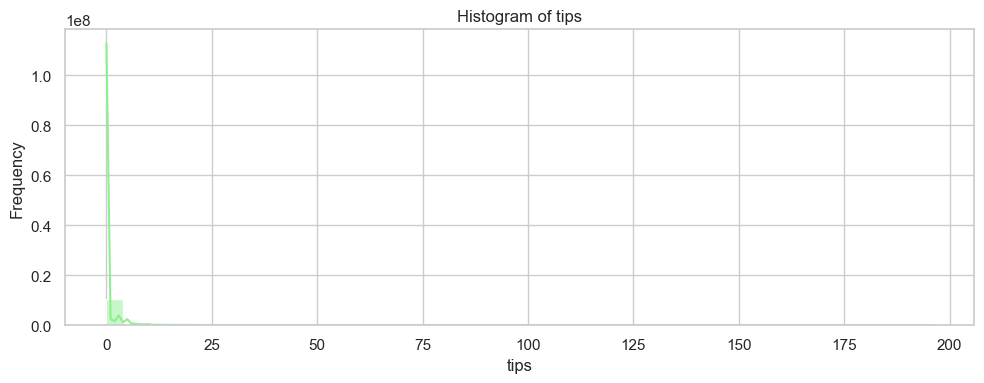

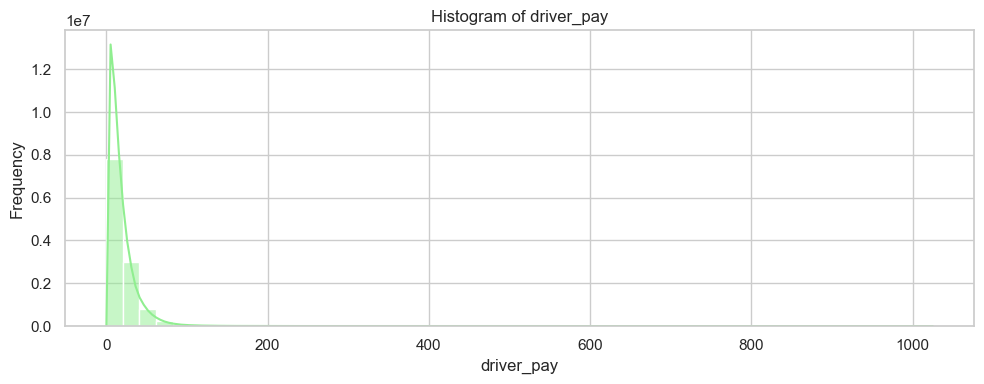

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = fhvhv.select_dtypes(include='number').columns.tolist()

# Set plot style
sns.set(style="whitegrid")

# Create boxplots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=fhvhv[col], color="skyblue")
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# Create histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(fhvhv[col], kde=True, bins=50, color="lightgreen")
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


 # Trip Distacne - Inspect

In [63]:
# Total number of trips
total_trips = len(fhvhv)

# Filter for trips between 0.1 and 3 minutes
short_duration_mask = (fhvhv['trip_time'] >= 0.1) & (fhvhv['trip_time'] <= 3)
short_duration_count = short_duration_mask.sum()

# Calculate percentage
short_duration_percent = (short_duration_count / total_trips) * 100

# Display result
print(f"Trips with 0.1–3 minutes duration: {short_duration_count:,} "
      f"({short_duration_percent:.2f}%) out of {total_trips:,} total trips.")

Trips with 0.1–3 minutes duration: 64 (0.00%) out of 11,973,143 total trips.


In [65]:
fhvhv[short_duration_mask][['trip_miles', 'base_passenger_fare']].describe()

,trip_miles,base_passenger_fare
count,64.00,64.00
mean,0.01,8.87
std,0.01,3.79
min,0.00,5.07
25%,0.00,7.19
50%,0.01,7.30
75%,0.01,9.72
max,0.05,33.01


In [66]:
# Drop rows with suspiciously low trip_miles and non-zero base_passenger_fare
fhvhv = fhvhv[~((fhvhv['trip_miles'] <= 0.05) & (fhvhv['base_passenger_fare'] > 0))]


 # Feature Engineering

 - fhvhv_type from hvfhs_license_num 

In [68]:
# Define the mapping dictionary
license_mapping = {
    "HV0002": "Juno",
    "HV0003": "Uber",
    "HV0004": "Via",
    "HV0005": "Lyft"
}

# Create the new column
fhvhv['fhvhv_type'] = fhvhv['hvfhs_license_num'].map(license_mapping)

# Optional: preview value counts
# print(fhvhv['fhvhv_type'].value_counts(dropna=False))

# print(fhvhv['fhvhv_type'].value_counts(dropna=False))


 - Ave. Speed per hour

In [73]:
# Calculate average speed in mph (trip_time is in seconds)
fhvhv['average_speed'] = fhvhv.apply(
    lambda row: row['trip_miles'] / (row['trip_time'] / 3600)
    if row['trip_time'] > 0 else 0,
    axis=1
)


 -  Fare per Mile


In [74]:
fhvhv['fare_per_mile'] = fhvhv['base_passenger_fare'] / fhvhv['trip_miles']
fhvhv['fare_per_mile'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\osama\AppData\Local\Temp\ipykernel_6856\2153278967.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fhvhv['fare_per_mile'].replace([np.inf, -np.inf], np.nan, inplace=True)


 - Total Fare Composition


In [75]:
fare_cols = ['base_passenger_fare', 'tolls', 'sales_tax', 'bcf', 'congestion_surcharge', 'airport_fee']
fhvhv['total_fare_components'] = fhvhv[fare_cols].sum(axis=1)


 - Pickup & Dropoff Hour


In [76]:
fhvhv['pickup_hour'] = pd.to_datetime(fhvhv['pickup_datetime'], errors='coerce').dt.hour
fhvhv['dropoff_hour'] = pd.to_datetime(fhvhv['dropoff_datetime'], errors='coerce').dt.hour


 - Trip Type Label

In [78]:
fhvhv['trip_category'] = fhvhv.apply(
    lambda row: 'Shared' if row['shared_match_flag'] == 'Y' else 'Solo',
    axis=1
)


 - Congestion Tag (Based on Speed)

In [79]:
fhvhv['is_congested'] = fhvhv['average_speed'] < 5  # or use median thresholds per PU+hour


 - trip_distance_class

In [85]:
import numpy as np
import pandas as pd

# Define bin edges and labels
bins = [0, 2, 7, np.inf]
labels = ['short', 'medium', 'long']

# Create the new column using pd.cut
fhvhv['trip_distance_class'] = pd.cut(
    fhvhv['trip_miles'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)


In [86]:
fhvhv

,hvfhs_license_num,dispatching_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,PU_Borough,PU_Zone,PU_ServiceZone,DO_Borough,DO_Zone,DO_ServiceZone,fhvhv_type,average_speed,fare_per_mile,total_fare_components,pickup_hour,dropoff_hour,trip_category,is_congested,trip_distance_class
0,HV0003,B03404,2023-12-31 23:59:26,2024-01-01 00:00:13,2024-01-01 00:00:48,2024-01-01 00:30:38,75,7,7.82,1790,34.22,0.00,0.94,3.04,2.75,0.00,0.00,27.50,N,N,N,N,N,Manhattan,East Harlem South,Boro Zone,Queens,Astoria,Boro Zone,Uber,15.73,4.38,40.95,0,0,Solo,False,long
1,HV0003,B03404,2023-12-31 23:58:59,2024-01-01 00:04:04,2024-01-01 00:04:22,2024-01-01 00:39:07,132,181,27.16,2085,53.90,0.00,1.55,5.01,0.00,2.50,0.00,55.29,N,N,N,N,N,Queens,JFK Airport,Airports,Brooklyn,Park Slope,Boro Zone,Uber,46.89,1.98,62.96,0,0,Solo,False,long
2,HV0003,B03404,2023-12-31 23:58:14,2023-12-31 23:59:49,2024-01-01 00:01:30,2024-01-01 00:05:21,215,205,0.77,231,8.93,0.00,0.25,0.79,0.00,0.00,0.00,5.87,N,N,N,N,N,Queens,South Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone,Uber,12.00,11.60,9.97,0,0,Solo,False,short
3,HV0003,B03404,2023-12-31 23:57:50,2024-01-01 00:01:09,2024-01-01 00:01:38,2024-01-01 00:23:36,75,81,12.94,1318,27.72,0.00,0.76,2.46,0.00,0.00,0.00,29.63,N,N,N,N,N,Manhattan,East Harlem South,Boro Zone,Bronx,Eastchester,Boro Zone,Uber,35.34,2.14,30.94,0,0,Solo,False,long
4,HV0003,B03404,2023-12-31 23:59:38,2024-01-01 00:05:10,2024-01-01 00:05:20,2024-01-01 00:12:47,132,10,2.58,447,15.30,0.00,0.49,1.58,0.00,2.50,0.00,8.12,N,N,N,N,N,Queens,JFK Airport,Airports,Queens,Baisley Park,Boro Zone,Uber,20.78,5.93,19.87,0,0,Solo,False,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488281,HV0003,B03404,2024-12-31 23:02:02,2024-12-31 23:05:10,2024-12-31 23:05:23,2024-12-31 23:22:05,22,149,3.36,1002,19.64,0.00,0.54,1.75,0.00,0.00,0.00,16.92,N,N,N,N,N,Brooklyn,Bensonhurst West,Boro Zone,Brooklyn,Madison,Boro Zone,Uber,12.07,5.85,21.93,23,23,Solo,False,medium
1488282,HV0003,B03404,2024-12-31 23:33:45,2024-12-31 23:36:59,2024-12-31 23:38:23,2025-01-01 00:08:09,117,139,13.98,1786,49.33,0.00,1.35,4.37,0.00,0.00,0.00,53.23,N,N,N,N,N,Queens,Hammels/Arverne,Boro Zone,Queens,Laurelton,Boro Zone,Uber,28.18,3.53,55.05,23,0,Solo,False,long
1488283,HV0003,B03404,2024-12-31 22:32:33,2024-12-31 22:42:47,2024-12-31 22:43:49,2024-12-31 22:48:55,258,197,0.79,306,12.74,0.00,0.35,1.13,0.00,0.00,0.00,7.81,Y,Y,N,N,N,Queens,Woodhaven,Boro Zone,Queens,Richmond Hill,Boro Zone,Uber,9.29,16.13,14.22,22,22,Shared,False,short
1488284,HV0003,B03404,2024-12-31 22:21:28,2024-12-31 22:24:48,2024-12-31 22:26:48,2024-12-31 23:40:56,185,37,18.45,4448,78.39,6.94,2.22,7.77,0.00,0.00,0.00,79.10,N,N,N,N,N,Bronx,Pelham Parkway,Boro Zone,Brooklyn,Bushwick South,Boro Zone,Uber,14.93,4.25,95.32,22,23,Solo,False,long


In [87]:
fhvhv.to_csv("Cleaned_FHVHV.csv", index=False)

 ## **Full Function For FHVHV ##

In [ ]:
import dask.dataframe as dd
import pandas as pd
import numpy as np

def process_fhvhv_data(fhvhv_path, lookup_path, output_csv="Cleaned_FHVHV.csv"):
    # Load data
    fhvhv = dd.read_parquet(fhvhv_path)
    lookup = dd.read_csv(lookup_path)

    # Merge lookup
    def merge_lookup_dask(df, pickup_col, dropoff_col, lookup):
        df = df.merge(lookup, left_on=pickup_col, right_on="LocationID", how="left").rename(
            columns={"Borough": "PU_Borough", "Zone": "PU_Zone", "service_zone": "PU_ServiceZone"}).drop(columns=["LocationID"])
        df = df.merge(lookup, left_on=dropoff_col, right_on="LocationID", how="left").rename(
            columns={"Borough": "DO_Borough", "Zone": "DO_Zone", "service_zone": "DO_ServiceZone"}).drop(columns=["LocationID"])
        return df

    fhvhv = merge_lookup_dask(fhvhv, "PULocationID", "DOLocationID", lookup).compute()

    # Impute on_scene_datetime
    for col in ['request_datetime', 'on_scene_datetime', 'pickup_datetime']:
        fhvhv[col] = pd.to_datetime(fhvhv[col], errors='coerce')

    valid_mask = fhvhv['on_scene_datetime'].notna() & fhvhv['request_datetime'].notna()
    fhvhv['arrival_delta'] = (fhvhv['on_scene_datetime'] - fhvhv['request_datetime']).dt.total_seconds()
    median_arrival = fhvhv[valid_mask & (fhvhv['arrival_delta'] > 0) & (fhvhv['arrival_delta'] < 1800)]['arrival_delta'].median()
    missing_mask = fhvhv['on_scene_datetime'].isna() & fhvhv['request_datetime'].notna()
    fhvhv.loc[missing_mask, 'on_scene_datetime'] = fhvhv.loc[missing_mask, 'request_datetime'] + pd.to_timedelta(median_arrival, unit='s')
    fhvhv.drop(columns='arrival_delta', inplace=True)

    # Drop unused column
    fhvhv.drop(columns='originating_base_num', inplace=True)

    # Impute lookup values using mode per LocationID
    for col, loc_col in [('PU_Borough', 'PULocationID'), ('DO_Borough', 'DOLocationID'),
                         ('PU_Zone', 'PULocationID'), ('DO_Zone', 'DOLocationID'),
                         ('PU_ServiceZone', 'PULocationID'), ('DO_ServiceZone', 'DOLocationID')]:
        if col in fhvhv.columns:
            mask_valid = ~fhvhv[loc_col].isin([264, 265])
            fhvhv.loc[mask_valid, col] = fhvhv[mask_valid].groupby(loc_col)[col].transform(
                lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

    # Assign special zones
    fhvhv.loc[fhvhv['PULocationID'] == 264, ['PU_Borough', 'PU_Zone', 'PU_ServiceZone']] = 'Unknown'
    fhvhv.loc[fhvhv['DOLocationID'] == 264, ['DO_Borough', 'DO_Zone', 'DO_ServiceZone']] = 'Unknown'
    fhvhv.loc[fhvhv['PULocationID'] == 265, ['PU_Borough', 'PU_Zone', 'PU_ServiceZone']] = 'Outside NYC'
    fhvhv.loc[fhvhv['DOLocationID'] == 265, ['DO_Borough', 'DO_Zone', 'DO_ServiceZone']] = 'Outside NYC'

    # Drop rows with mismatched trip time
    fhvhv['calculated_trip_time'] = (fhvhv['dropoff_datetime'] - fhvhv['pickup_datetime']).dt.total_seconds()
    fhvhv['trip_time_diff'] = fhvhv['trip_time'] - fhvhv['calculated_trip_time']
    fhvhv = fhvhv[fhvhv['trip_time_diff'].abs() <= 300].copy()
    fhvhv.drop(columns=['calculated_trip_time', 'trip_time_diff'], inplace=True)

    # Impute negative base_passenger_fare
    fare_components = ['tolls', 'sales_tax', 'bcf', 'congestion_surcharge', 'airport_fee']
    negative_mask = fhvhv['base_passenger_fare'] < 0
    fhvhv['fare_components_sum'] = fhvhv[fare_components].sum(axis=1)
    fhvhv.loc[negative_mask, 'base_passenger_fare'] = fhvhv.loc[negative_mask, 'fare_components_sum']
    fhvhv.drop(columns='fare_components_sum', inplace=True)

    # Impute negative driver_pay
    neg_driver_mask = fhvhv['driver_pay'] < 0
    fhvhv.loc[neg_driver_mask, 'driver_pay'] = fhvhv.loc[neg_driver_mask, 'base_passenger_fare'] + fhvhv.loc[neg_driver_mask, 'tips']

    # Drop invalid low-mileage but paid trips
    fhvhv = fhvhv[~((fhvhv['trip_miles'] <= 0.05) & (fhvhv['base_passenger_fare'] > 0))]

    # Map license to type
    license_map = {"HV0002": "Juno", "HV0003": "Uber", "HV0004": "Via", "HV0005": "Lyft"}
    fhvhv['fhvhv_type'] = fhvhv['hvfhs_license_num'].map(license_map)

    # Average speed
    fhvhv['average_speed'] = fhvhv.apply(
        lambda row: row['trip_miles'] / (row['trip_time'] / 3600) if row['trip_time'] > 0 else 0,
        axis=1
    )

    # Fare per mile
    fhvhv['fare_per_mile'] = fhvhv['base_passenger_fare'] / fhvhv['trip_miles']
    fhvhv['fare_per_mile'].replace([np.inf, -np.inf], np.nan, inplace=True)

    # Total fare
    fare_cols = ['base_passenger_fare', 'tolls', 'sales_tax', 'bcf', 'congestion_surcharge', 'airport_fee']
    fhvhv['total_fare_components'] = fhvhv[fare_cols].sum(axis=1)

    # Time columns
    fhvhv['pickup_hour'] = pd.to_datetime(fhvhv['pickup_datetime'], errors='coerce').dt.hour
    fhvhv['dropoff_hour'] = pd.to_datetime(fhvhv['dropoff_datetime'], errors='coerce').dt.hour

    # Shared ride indicator
    fhvhv['trip_category'] = fhvhv['shared_match_flag'].apply(lambda x: 'Shared' if x == 'Y' else 'Solo')

    # Congestion flag
    fhvhv['is_congested'] = fhvhv['average_speed'] < 5

    # Distance category
    bins = [0, 2, 7, np.inf]
    labels = ['short', 'medium', 'long']
    fhvhv['trip_distance_class'] = pd.cut(fhvhv['trip_miles'], bins=bins, labels=labels, right=True)

    # Export
    fhvhv.to_csv(output_csv, index=False)
    print(f"✅ Cleaned FHVHV dataset exported to {output_csv}")

# Run the function
process_fhvhv_data("fhvhv_merged24_daily_sample.parquet", "taxi_zone_lookup.csv")


# **Data Cleaning** 

# 1-Data Quality:
**(Undefined NYC Locations):**

- Issue Identified: found pickup (PU) and dropoff (DO) borough records marked as 'Unknown', 'N/A', or null (NaN). By cross-referencing NYC taxi zone metadata, we confirmed that specific Location IDs (e.g., 264, 265) are systematically associated with these undefined borough classifications.

- Impact: Records with unmappable boroughs lack geographical context, compromising the validity of NYC-specific transportation analytics, including demand patterns, zone performance, and route efficiency.

| LocationID | Borough  | Zone            | service_zone |
|------------|----------|-----------------|--------------|
| 264        | Unknown  | N/A             | N/A          |
| 265        | N/A      | Outside of NYC  | N/A          |

# Preproccessing

In [13]:
# convert pu & do location IDs to string as they are categorical
def convert_location_ids_to_string(df, pickup_col, dropoff_col):
    """
    Convert pickup and dropoff location IDs to string type for consistency.
    
    Parameters:
    - df: pandas DataFrame
    - pickup_col: name of the pickup location ID column
    - dropoff_col: name of the dropoff location ID column
    
    Returns:
    - DataFrame with specified columns converted to string type
    """
    # Convert pickup location ID to string type
    if pickup_col not in df.columns or dropoff_col not in df.columns:
        raise ValueError(f"Columns '{pickup_col}' or '{dropoff_col}' not found in DataFrame.")
    df[pickup_col] = df[pickup_col].astype('Int64').astype('string')

    # Convert dropoff location ID to string type
    if dropoff_col not in df.columns:
        raise ValueError(f"Column '{dropoff_col}' not found in DataFrame.")
    df[dropoff_col] = df[dropoff_col].astype('Int64').astype('string')
    return df

# Convert location IDs to string for each DataFrame
yellow = convert_location_ids_to_string(yellow, 'PULocationID', 'DOLocationID')
green = convert_location_ids_to_string(green, 'PULocationID', 'DOLocationID')
fhvhv = convert_location_ids_to_string(fhvhv, 'PULocationID', 'DOLocationID')

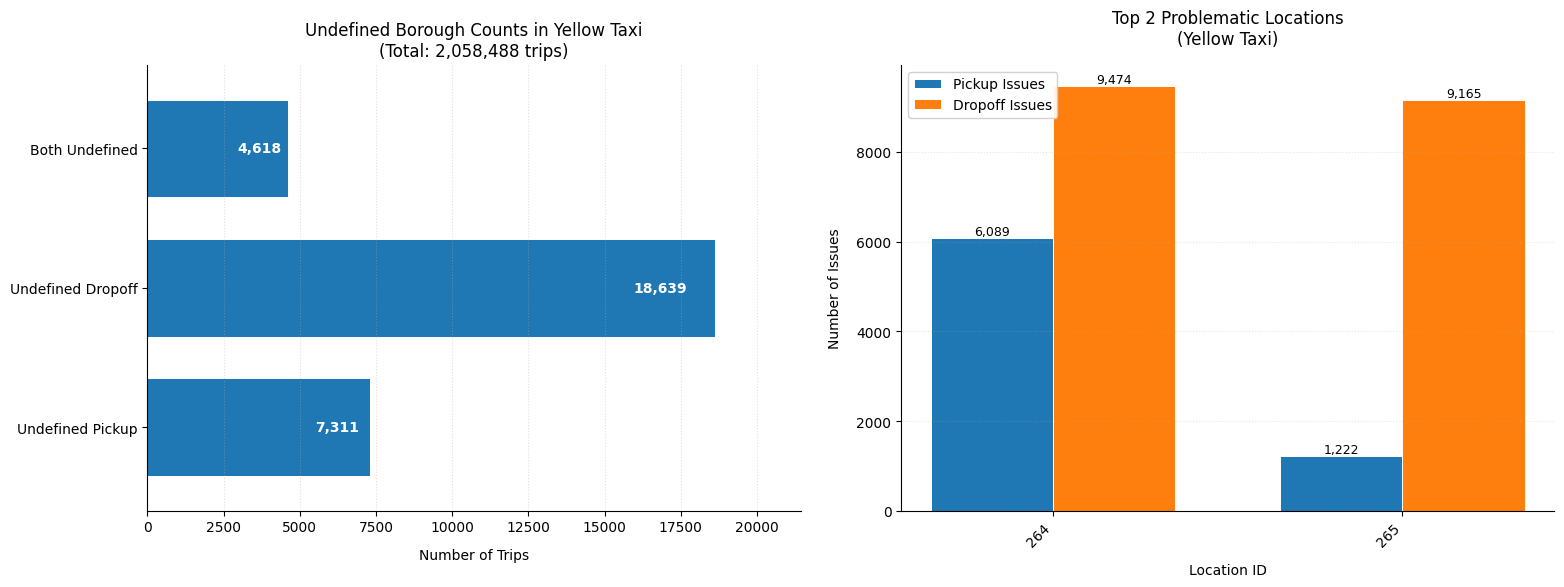


📊 Undefined Borough Analysis: Yellow Taxi
Total records: 2,058,488
Records with ANY undefined borough: 21,332 (1.0%)
Records with undefined PU borough: 7,311 (0.4%)
Records with undefined DO borough: 18,639 (0.9%)
Records with BOTH undefined: 4,618 (0.2%)

🔍 All problematic LocationIDs:
  LocationID  undefined_pickup  undefined_dropoff
0        264              6089               9474
1        265              1222               9165


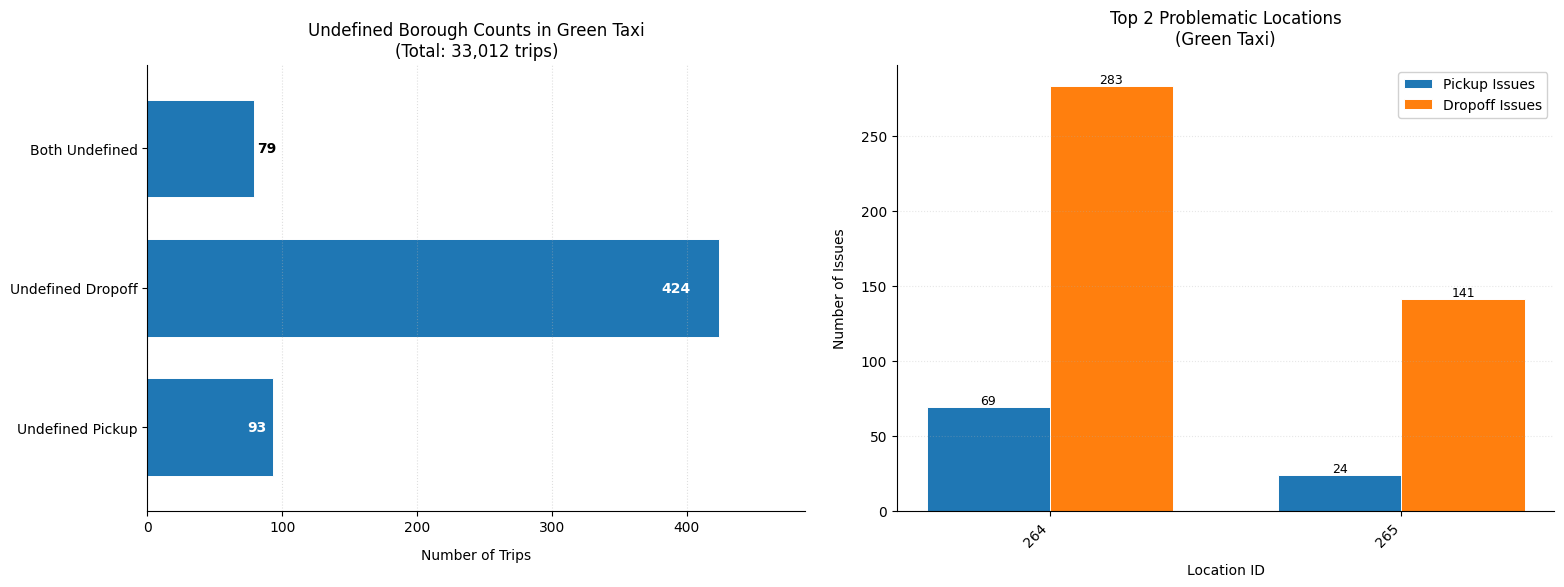


📊 Undefined Borough Analysis: Green Taxi
Total records: 33,012
Records with ANY undefined borough: 438 (1.3%)
Records with undefined PU borough: 93 (0.3%)
Records with undefined DO borough: 424 (1.3%)
Records with BOTH undefined: 79 (0.2%)

🔍 All problematic LocationIDs:
  LocationID  undefined_pickup  undefined_dropoff
0        264                69                283
1        265                24                141


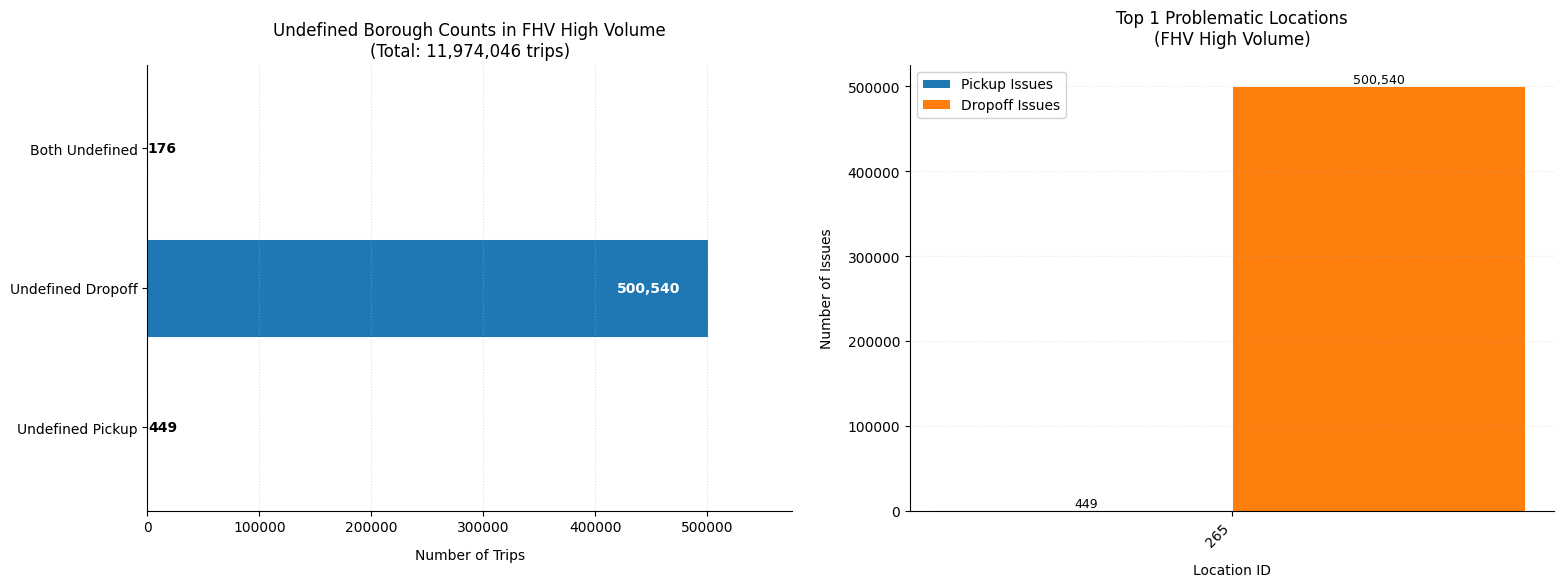


📊 Undefined Borough Analysis: FHV High Volume
Total records: 11,974,046
Records with ANY undefined borough: 500,813 (4.2%)
Records with undefined PU borough: 449 (0.0%)
Records with undefined DO borough: 500,540 (4.2%)
Records with BOTH undefined: 176 (0.0%)

🔍 All problematic LocationIDs:
  LocationID  undefined_pickup  undefined_dropoff
0        265               449             500540


In [6]:
# analyze undefined boroughs - to see the output and distriubtion undefined boroughs
def analyze_undefined_boroughs(df, df_name='DataFrame',
                             pu_borough_col='PU_Borough',
                             do_borough_col='DO_Borough',
                             pu_locid_col='PULocationID',
                             do_locid_col='DOLocationID',
                             undefined_values=['Unknown', 'N/A']):
    """
    Analyze and visualize records with undefined boroughs (pickup, dropoff, or both).
    Returns: stats dict, undefined records DataFrame, and location counts DataFrame.
    """

    # 1. Identify undefined boroughs
    pu_undefined = (df[pu_borough_col].isin(undefined_values)) | (df[pu_borough_col].isna())
    do_undefined = (df[do_borough_col].isin(undefined_values)) | (df[do_borough_col].isna())

    # 2. Masks for undefined rows
    any_undefined_mask = pu_undefined | do_undefined
    both_undefined_mask = pu_undefined & do_undefined

    # 3. Extract undefined records (PU or DO or both)
    undefined_records = df[any_undefined_mask].copy()

    # 4. Extract LocationIDs where borough is undefined (
    pu_problem_locs_raw = df.loc[pu_undefined, pu_locid_col]
    do_problem_locs_raw = df.loc[do_undefined, do_locid_col]

    # 5. Count LocationIDs (all of them, not limited to top)
    pu_counts = pu_problem_locs_raw.value_counts(dropna = False).sort_index()
    do_counts = do_problem_locs_raw.value_counts(dropna = False).sort_index()

    # Label missing ones
    pu_counts.index = pu_counts.index.fillna('Missing')
    do_counts.index = do_counts.index.fillna('Missing')

    # Convert to string
    pu_counts.index = pu_counts.index.astype(str)
    do_counts.index = do_counts.index.astype(str)

    # 6. Stats summary
    stats = {
    'total_records': len(df),
    'undefined_pu': pu_undefined.sum(),
    'undefined_do': do_undefined.sum(),
    'any_undefined': any_undefined_mask.sum(),
    'both_undefined': both_undefined_mask.sum(),
    'undefined_pu_pct': f"{pu_undefined.mean():.1%}",
    'undefined_do_pct': f"{do_undefined.mean():.1%}",
    'any_undefined_pct': f"{any_undefined_mask.mean():.1%}",
    'both_undefined_pct': f"{both_undefined_mask.mean():.1%}",
    }


    # 7. Visuals

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # === 7a. Improved Horizontal Bar Chart ===
    # Create DataFrame with proper structure
    borough_counts = pd.DataFrame({
        'Count': [stats['undefined_pu'], stats['undefined_do'], stats['both_undefined']]
    }, index=['Undefined Pickup', 'Undefined Dropoff', 'Both Undefined'])

    # Calculate maximum value for dynamic scaling
    max_count = borough_counts['Count'].max()

    # Plot with improved styling
    ax = borough_counts.plot(kind='barh', ax=ax1, 
                            title=f'Undefined Borough Counts in {df_name}\n(Total: {len(df):,} trips)',
                            legend=False,
                            color=['#1f77b4', '#ff7f0e', '#2ca02c'],
                            width=0.7,  # Better bar thickness
                            edgecolor='white',  # Clean bar edges
                            linewidth=0.7)

    # Set dynamic x-limit with padding
    ax.set_xlim([0, max_count * 1.15])  # 15% padding
    ax.set_xlabel('Number of Trips', labelpad=10)
    ax.grid(axis='x', linestyle=':', alpha=0.4)

    # Add intelligent value labels
    for i, v in enumerate(borough_counts['Count']):
        # Position inside bar if >20% of max, otherwise outside
        if v > max_count * 0.2:
            ax.text(v * 0.95, i, f"{v:,}", 
                    color='white', va='center', ha='right',
                    fontweight='bold')
        else:
            ax.text(v * 1.03, i, f"{v:,}", 
                    color='black', va='center',
                    fontweight='bold')

    # Remove spines for cleaner look
    for spine in ['right', 'top']:
        ax.spines[spine].set_visible(False)

    # === 7b. Enhanced Clustered Bar Chart ===
    # Prepare location data
    location_df = pd.DataFrame({
        'PU Issues': pu_counts,
        'DO Issues': do_counts
    }).fillna(0).head(10)  # Limit to top 10 for readability

    location_df.index = location_df.index.astype(str)
    x = np.arange(len(location_df))
    bar_width = 0.35  # Slightly narrower bars

    # Plot with improved styling
    bars1 = ax2.bar(x - bar_width/2, location_df['PU Issues'], 
                width=bar_width, color='#1f77b4', label='Pickup Issues',
                edgecolor='white', linewidth=0.7)
    bars2 = ax2.bar(x + bar_width/2, location_df['DO Issues'], 
                width=bar_width, color='#ff7f0e', label='Dropoff Issues',
                edgecolor='white', linewidth=0.7)

    # Configure axes and labels
    ax2.set_xticks(x)
    ax2.set_xticklabels(location_df.index, rotation=45, ha='right')
    ax2.set_xlabel('Location ID', labelpad=10)
    ax2.set_ylabel('Number of Issues', labelpad=10)
    ax2.set_title(f'Top {len(location_df)} Problematic Locations\n({df_name})', pad=15)

    # Add value labels above bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            if height > 0:  # Only label non-zero bars
                ax2.text(bar.get_x() + bar.get_width()/2., height,
                        f"{height:,}", ha='center', va='bottom',
                        fontsize=9)

    add_labels(bars1)
    add_labels(bars2)

    # Add legend and grid
    ax2.legend(framealpha=0.9)
    ax2.grid(axis='y', linestyle=':', alpha=0.3)

    # Remove top and right spines
    for spine in ['right', 'top']:
        ax2.spines[spine].set_visible(False)

    # Final layout adjustment
    plt.tight_layout(pad=2)  # Slightly more padding than default
    plt.subplots_adjust(top=0.9)  # Adjust top spacing for titles
    plt.show()

    # 8. Print summary
    print(f"\n{'='*80}")
    print(f"📊 Undefined Borough Analysis: {df_name}")
    print(f"Total records: {stats['total_records']:,}")
    print(f"Records with ANY undefined borough: {stats['any_undefined']:,} ({stats['any_undefined_pct']})")
    print(f"Records with undefined PU borough: {stats['undefined_pu']:,} ({stats['undefined_pu_pct']})")
    print(f"Records with undefined DO borough: {stats['undefined_do']:,} ({stats['undefined_do_pct']})")
    print(f"Records with BOTH undefined: {stats['both_undefined']:,} ({stats['both_undefined_pct']})")

    print("\n🔍 All problematic LocationIDs:")
    undefined_count = pd.DataFrame({
        'undefined_pickup': pu_counts.sort_values(ascending=False),
        'undefined_dropoff': do_counts.sort_values(ascending=False)
    }).reset_index().rename(columns={'index': 'LocationID'})


    print(f"{undefined_count}")
    print("="*80)

    return stats, undefined_records, location_df

stats, undefined_rows, location_table = analyze_undefined_boroughs(yellow, "Yellow Taxi")
stats, undefined_rows, location_table = analyze_undefined_boroughs(green, "Green Taxi")
stats, undefined_rows, location_table = analyze_undefined_boroughs(fhvhv, "FHV High Volume")

# **Handling Undefined and Special LocationIDs (264 & 265)**

In the NYC Taxi & FHV datasets, some trips include LocationIDs that are either undefined (264) or refer to areas outside the official TLC zone system (265). Rather than dropping these records, I chose to retain them in the dataset and explicitly relabel their associated Borough, Zone, and Service Zone fields with descriptive placeholders such as 'Undefined' or 'Outside NYC'.

This approach ensures:

Data integrity is preserved — no trips are lost, which supports accurate trip-level statistics (e.g., total rides, distributions).

Clarity in aggregation — these relabeled trips do not mix with valid NYC boroughs during groupby summaries or visualizations.

Better transparency — this handling makes it easy to quantify and isolate special cases in follow-up analyses.



In [27]:
def relabel_special_locations(df, 
                            undefined_locations= ['264', '265'],
                            output_dir=None,
                            df_name='DataFrame'):
    """
    Updates PU/DO Borough, Zone, and ServiceZone fields for special LocationIDs.
    
    Parameters:
        df (pd.DataFrame): Input trip data with PU and DO location metadata
        undefined_locations (list): LocationIDs to treat as special cases
        output_dir (str): Optional directory for saving summary stats
        df_name (str): Name for reporting
        
    Returns:
        pd.DataFrame: Modified DataFrame with consistent location labels
        pd.DataFrame: Summary of changes made
    """
    
    # Create mapping dictionary for consistent labeling
    LABEL_MAP = {
        '264': {
            'borough': 'Undefined',
            'zone': 'Undefined',
            'service_zone': 'Undefined'
        },
        '265': {
            'borough': 'Outside NYC',
            'zone': 'Outside NYC',
            'service_zone': 'Outside NYC'
        }
    }
    
    # Track changes
    change_log = []
    
    # Process pickup locations
    for loc in undefined_locations:
        mask = df['PULocationID'] == loc
        if mask.any():
            df.loc[mask, 'PU_Borough'] = LABEL_MAP[loc]['borough']
            df.loc[mask, 'PU_Zone'] = LABEL_MAP[loc]['zone']
            df.loc[mask, 'PU_ServiceZone'] = LABEL_MAP[loc]['service_zone']
            change_log.append(('Pickup', loc, mask.sum()))
    
    # Process dropoff locations
    for loc in undefined_locations:
        mask = df['DOLocationID'] == loc
        if mask.any():
            df.loc[mask, 'DO_Borough'] = LABEL_MAP[loc]['borough']
            df.loc[mask, 'DO_Zone'] = LABEL_MAP[loc]['zone']
            df.loc[mask, 'DO_ServiceZone'] = LABEL_MAP[loc]['service_zone']
            change_log.append(('Dropoff', loc, mask.sum()))
    
    # Create summary DataFrame
    change_summary = pd.DataFrame(change_log, 
                                columns=['TripPoint', 'LocationID', 'RecordsUpdated'])
    
    # Print summary
    print(f"\n{'='*80}")
    print(f"📍 Special Location Relabeling Summary: {df_name}")
    print(f"{'='*80}")
    if not change_summary.empty:
        print(change_summary.to_markdown(tablefmt="grid", index=False))
        print(f"\nTotal records updated: {change_summary['RecordsUpdated'].sum():,}")
    else:
        print("No special locations found to relabel")
    print("="*80)
    
    # Optionally save summary
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        summary_path = os.path.join(output_dir, f"special_locations_summary_{df_name}.csv")
        change_summary.to_csv(summary_path, index=False)
        print(f"Saved summary to: {summary_path}")
    
    return df, change_summary
# usage

# With output directory
yellow, changes = relabel_special_locations(yellow,output_dir="9 Jun.25",df_name="Yellow taxi")
green, changes = relabel_special_locations(green,output_dir="9 Jun.25",df_name="Green taxi")
fhvhv, changes = relabel_special_locations(fhvhv,output_dir="9 Jun.25",df_name="FHV High Volume taxi")


📍 Special Location Relabeling Summary: Yellow taxi
No special locations found to relabel
Saved summary to: 9 Jun.25\special_locations_summary_Yellow taxi.csv

📍 Special Location Relabeling Summary: Green taxi
No special locations found to relabel
Saved summary to: 9 Jun.25\special_locations_summary_Green taxi.csv

📍 Special Location Relabeling Summary: FHV High Volume taxi
No special locations found to relabel
Saved summary to: 9 Jun.25\special_locations_summary_FHV High Volume taxi.csv


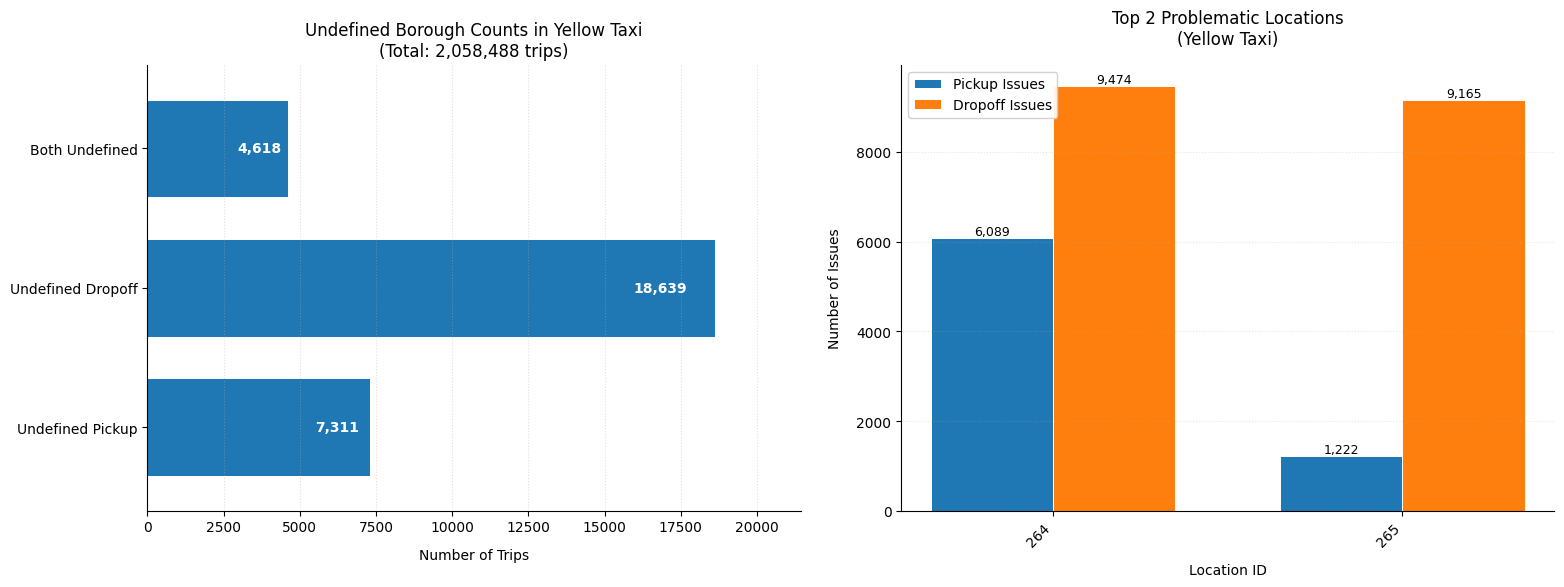


📊 Undefined Borough Analysis: Yellow Taxi
Total records: 2,058,488
Records with ANY undefined borough: 21,332 (1.0%)
Records with undefined PU borough: 7,311 (0.4%)
Records with undefined DO borough: 18,639 (0.9%)
Records with BOTH undefined: 4,618 (0.2%)

🔍 All problematic LocationIDs:
  LocationID  undefined_pickup  undefined_dropoff
0        264              6089               9474
1        265              1222               9165


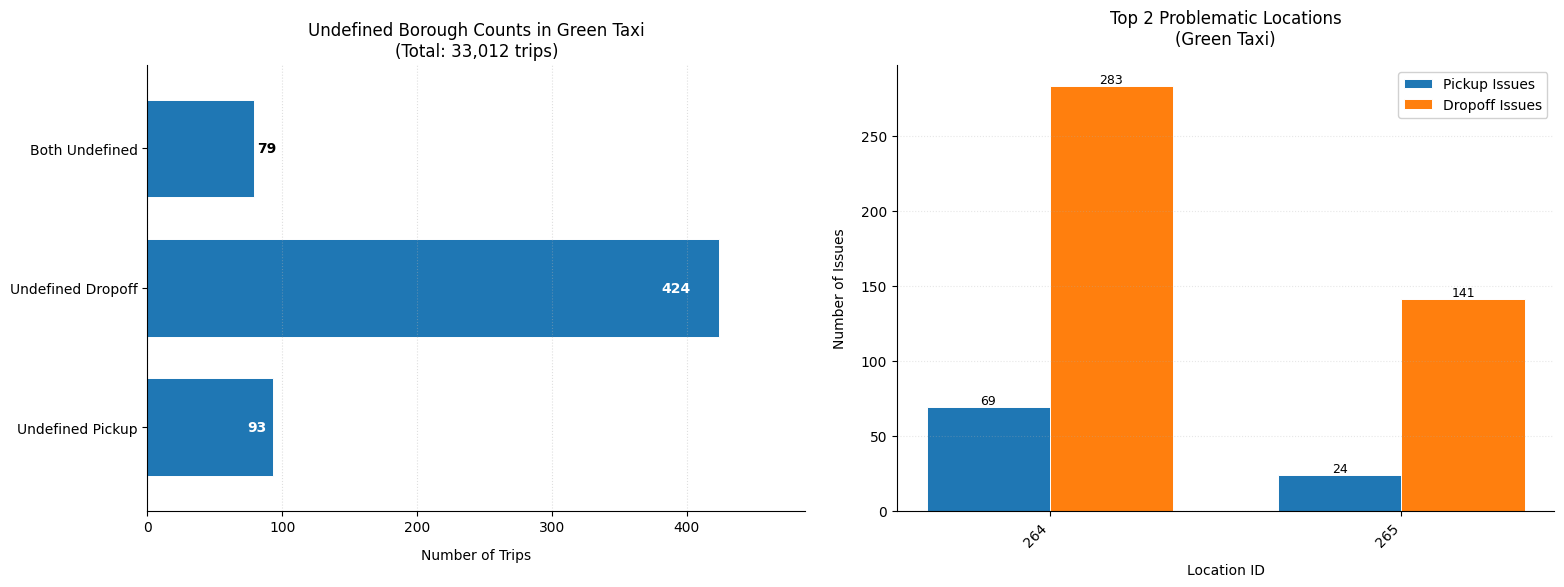


📊 Undefined Borough Analysis: Green Taxi
Total records: 33,012
Records with ANY undefined borough: 438 (1.3%)
Records with undefined PU borough: 93 (0.3%)
Records with undefined DO borough: 424 (1.3%)
Records with BOTH undefined: 79 (0.2%)

🔍 All problematic LocationIDs:
  LocationID  undefined_pickup  undefined_dropoff
0        264                69                283
1        265                24                141


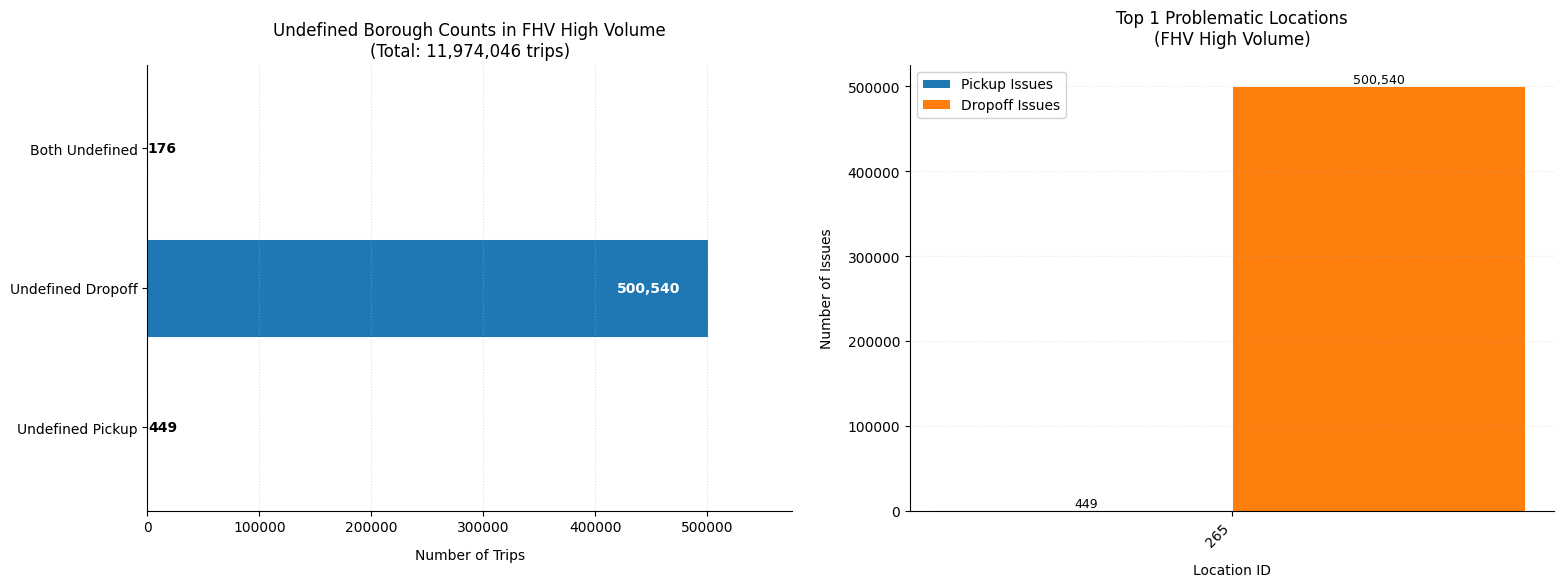


📊 Undefined Borough Analysis: FHV High Volume
Total records: 11,974,046
Records with ANY undefined borough: 500,813 (4.2%)
Records with undefined PU borough: 449 (0.0%)
Records with undefined DO borough: 500,540 (4.2%)
Records with BOTH undefined: 176 (0.0%)

🔍 All problematic LocationIDs:
  LocationID  undefined_pickup  undefined_dropoff
0        265               449             500540


In [28]:
stats, undefined_rows, location_table = analyze_undefined_boroughs(yellow, "Yellow Taxi")
stats, undefined_rows, location_table = analyze_undefined_boroughs(green, "Green Taxi")
stats, undefined_rows, location_table = analyze_undefined_boroughs(fhvhv, "FHV High Volume")

# **Duration** Feature Engineering

 - for Yellow and Green ( dropp all nagative values & for zero values (if fare is zero then dropp else change zero by mode))

we do not need to calculate trip duration in fhv high volume as it has 'trip time' column!


In [21]:
def add_duration_column(df, pickup_col='pickup_datetime', dropoff_col='dropoff_datetime'):
    """
    Adds a 'duration_inMin' column to the DataFrame, representing the trip duration in fractional minutes.
    Handles invalid datetime strings safely.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing pickup and dropoff datetime columns.
        pickup_col (str): Name of the pickup datetime column.
        dropoff_col (str): Name of the dropoff datetime column.
        
    Returns:
        pd.DataFrame: DataFrame with an added 'duration_inMin' column.
    """
    df[pickup_col] = pd.to_datetime(df[pickup_col], errors='coerce')
    df[dropoff_col] = pd.to_datetime(df[dropoff_col], errors='coerce')
    
    # calculate duration in minutes
    df['duration_inMin'] = (df[dropoff_col] - df[pickup_col]).dt.total_seconds() / 60.0


    
    return df
    

# Add duration column to each DataFrame
yellow = add_duration_column(yellow, pickup_col='tpep_pickup_datetime', dropoff_col='tpep_dropoff_datetime')
green = add_duration_column(green, pickup_col='lpep_pickup_datetime', dropoff_col='lpep_dropoff_datetime')
fhvhv = add_duration_column(fhvhv, pickup_col='pickup_datetime', dropoff_col='dropoff_datetime')


# Display the description of the duration column in each DataFrame  
print("\nDuration Column Description for Yellow Taxi:")
print(yellow['duration_inMin'].describe())
print("\nDuration Column Description for Green Taxi:")
print(green['duration_inMin'].describe())
print("\nDuration Column Description for FHVHV:")
print(fhvhv['duration_inMin'].describe())




Duration Column Description for Yellow Taxi:
count    2.058488e+06
mean     1.749353e+01
std      3.501283e+01
min     -5.665000e+01
25%      7.833333e+00
50%      1.298333e+01
75%      2.111667e+01
max      6.887817e+03
Name: duration_inMin, dtype: float64

Duration Column Description for Green Taxi:
count    33012.000000
mean        18.950924
std         75.898363
min          0.000000
25%          7.516667
50%         11.900000
75%         18.183333
max       1439.066667
Name: duration_inMin, dtype: float64

Duration Column Description for FHVHV:
count    1.197405e+07
mean     2.012712e+01
std      1.449703e+01
min     -5.646667e+01
25%      1.006667e+01
50%      1.630000e+01
75%      2.590000e+01
max      7.079667e+02
Name: duration_inMin, dtype: float64


we detect Negative duration !!

In [41]:
# # 

#     import pandas as pd

#     # Define bins and labels including negative durations
#     bins = [-float('inf'), 0, 15, 30, 45, 60, float('inf')]
#     labels = ['< 0 min', '0–15 min', '15–30 min', '30–45 min', '45–60 min', '>60 min']

#     # Create binned duration class
#     duration_class = pd.cut(df[duration_col], bins=bins, labels=labels, right=False)

#     # Count and calculate percentages
#     counts = duration_class.value_counts().sort_index()
#     percentages = (counts / counts.sum()) * 100

#     # Combine into summary DataFrame
#     summary = pd.DataFrame({
#         'Duration Class': labels,
#         'Trip Count': counts.values,
#         'Percentage': percentages.round(2).values
#     })

#     return summary

# def plot_duration_distribution(summary_df):
#     import matplotlib.pyplot as plt
#     import seaborn as sns

#     plt.figure(figsize=(8, 5))
#     sns.barplot(
#         x=summary_df['Duration Class'],
#         y=summary_df['Trip Count']
#     )

#     plt.xlabel('Trip Duration Class')
#     plt.ylabel('Number of Trips')
#     plt.title('Distribution of Trip Durations')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# # Calculate and store summary for each DataFrame
# duration_summary_yellow = calculate_duration_distribution(yellow)
# duration_summary_green = calculate_duration_distribution(green)
# duration_summary_fhvhv = calculate_duration_distribution(fhvhv)




In [42]:
# # Visualize the duration distribution for each DataFrame
# plot_duration_distribution(duration_summary_yellow)
# print("\nDuration Distribution for Yellow Taxi:")
# # print(duration_summary_yellow)



In [43]:
# plot_duration_distribution(duration_summary_green)
# print("\nDuration Distribution for Green Taxi:")
# print(duration_summary_green)


In [44]:
# plot_duration_distribution(duration_summary_fhvhv)
# print("\nDuration Distribution for FHVHV:")
# print(duration_summary_fhvhv)

In [45]:
# def calculate_duration_distribution(df, duration_col='duration_inMin'):
#     import pandas as pd

#     # Define 15-minute intervals up to 2 hours
#     bins = [-float('inf'), 0, 15, 30, 45, 60, 75, 90, 105, 120, float('inf')]
#     labels = ['< 0 min', '0–15 min', '15–30 min', '30–45 min',
#               '45–60 min', '60–75 min', '75–90 min',
#               '90–105 min', '105–120 min', '> 120 min']

#     # Create binned duration class
#     duration_class = pd.cut(
#         df[duration_col],
#         bins=bins,
#         labels=labels,
#         right=False
#     )

#     # Count and calculate percentages
#     counts = duration_class.value_counts().sort_index()
#     percentages = (counts / counts.sum()) * 100

#     # Combine into summary DataFrame
#     summary = pd.DataFrame({ 
#         'Duration Class': labels,
#         'Trip Count': counts.values,
#         'Percentage': percentages.round(2).values
#     })
#     return summary


# def plot_duration_distribution(summary_df):
#     import matplotlib.pyplot as plt
#     import seaborn as sns

#     plt.figure(figsize=(10, 6))
#     sns.barplot(
#         x='Duration Class',
#         y='Trip Count',
#         data=summary_df
#     )

#     plt.xlabel('Trip Duration Class')
#     plt.ylabel('Number of Trips')
#     plt.title('Distribution of Trip Durations')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()


# def filter_above_60min_report(df, duration_col='duration_inMin'):
#     """
#     Filter for trips with duration >60min and describe their distribution.
#     """
#     above_60 = df[df[duration_col] > 60]
#     print("Summary for trips with duration >60min:")
#     print(above_60[duration_col].describe())    

#     # Plot their distribution
#     summary_above = calculate_duration_distribution(above_60, duration_col)
#     plot_duration_distribution(summary_above)


# # Now you can reuse this:
# # 1. Calculate the distribution for your main DataFrame
# duration_summary = calculate_duration_distribution(yellow)
# print(duration_summary)
# plot_duration_distribution(duration_summary)

# # 2. Filter for and describe the ones above 60 minutes
# filter_above_60min_report(yellow)


In [46]:
# def calculate_duration_distribution(df, duration_col='duration_inMin', custom_bins=None):
#     """
#     Calculate distribution of trip durations with flexible binning.
    
#     Parameters:
#         df: Input DataFrame
#         duration_col: Column containing duration values
#         custom_bins: Optional custom bins (default uses 15-min intervals up to 2 hours)
        
#     Returns:
#         DataFrame with duration distribution summary
#     """

#     # Default bins (15-min intervals up to 2 hours)
#     bins = custom_bins or [-float('inf'), 0, 15, 30, 45, 60, 75, 90, 105, 120, float('inf')]
#     labels = ['< 0 min', '0–15 min', '15–30 min', '30–45 min',
#               '45–60 min', '60–75 min', '75–90 min',
#               '90–105 min', '105–120 min', '> 120 min']

#     # Create binned duration class
#     duration_class = pd.cut(df[duration_col], bins=bins, labels=labels, right=False)

#     # Calculate statistics
#     counts = duration_class.value_counts().sort_index()
#     percentages = (counts / counts.sum()) * 100

#     return pd.DataFrame({
#         'Duration Class': labels,
#         'Trip Count': counts.values,
#         'Percentage': percentages.round(2).values
#     })


# def plot_duration_distribution(summary_df, title_suffix=''):
#     """
#     Visualize duration distribution with customizable title.
#     """
#     import matplotlib.pyplot as plt
#     import seaborn as sns

#     plt.figure(figsize=(12, 6))
#     ax = sns.barplot(x='Duration Class', y='Trip Count', data=summary_df)
    
#     # Add value labels
#     for p in ax.patches:
#         ax.annotate(f"{p.get_height():,.0f}", 
#                    (p.get_x() + p.get_width() / 2., p.get_height()),
#                    ha='center', va='center', xytext=(0, 5),
#                    textcoords='offset points')

#     plt.xlabel('Trip Duration Class')
#     plt.ylabel('Number of Trips')
#     plt.title(f'Distribution of Trip Durations{title_suffix}')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()


# def analyze_duration_subset(df, duration_col='duration_inMin', min_duration=0, max_duration=None):
#     """
#     Analyze a subset of trips filtered by duration range.
    
#     Returns:
#         Tuple of (filtered DataFrame, summary statistics, distribution summary)
#     """
#     subset = df.copy()
    
#     # Apply filters
#     if min_duration is not None:
#         subset = subset[subset[duration_col] >= min_duration]
#     if max_duration is not None:
#         subset = subset[subset[duration_col] <= max_duration]
    
#     stats = subset[duration_col].describe()
#     distribution = calculate_duration_distribution(subset, duration_col)
    
#     return subset, stats, distribution


# # Example Usage
# if __name__ == "__main__":
#     # 1. Full distribution analysis
#     full_dist = calculate_duration_distribution(yellow)
#     print("Full duration distribution:")
#     print(full_dist)
#     plot_duration_distribution(full_dist, title_suffix=' (All Trips)')
    
#     # 2.. Analyze medium trips (0-60 min)
#     _, _, medium_dist = analyze_duration_subset(
#         yellow,
#         min_duration= 0 ,
#         max_duration=60
#     )
#     plot_duration_distribution(medium_dist, title_suffix=' (15-60 min trips)')
    
    
#     # 3. Analyze long trips (>60 min)
#     long_trips, stats, long_dist = analyze_duration_subset(
#         yellow,
#         min_duration=60
#     )
#     print("\nStatistics for long trips (>60 min):")
#     plot_duration_distribution(long_dist, title_suffix=' (Trips >60 min)')
#     print(stats)

In [48]:
# # new code for duration analysis
# def analyze_and_plot_duration(
#     df,
#     duration_col='duration_inMin',
#     min_duration=None,
#     max_duration=None,
#     custom_bins=None,
#     show_stats=True,
#     title_suffix=''
# ):
#     import pandas as pd
#     import matplotlib.pyplot as plt
#     import seaborn as sns

#     # Step 1: Filter duration range (if any)
#     data = df.copy()
#     if min_duration is not None:
#         data = data[data[duration_col] >= min_duration]
#     if max_duration is not None:
#         data = data[data[duration_col] <= max_duration]

#     # Step 2: Summary statistics (optional)
#     if show_stats:
#         print("Basic statistics for filtered trips:")
#         print(data[duration_col].describe())

#     # Step 3: Define bins
#     bins = custom_bins or [-float('inf'), 0, 15, 30, 45, 60, 75, 90, 105, 120, float('inf')]
#     labels = ['< 0 min', '0–15 min', '15–30 min', '30–45 min',
#               '45–60 min', '60–75 min', '75–90 min',
#               '90–105 min', '105–120 min', '> 120 min']

#     # Step 4: Bin the data
#     duration_bins = pd.cut(data[duration_col], bins=bins, labels=labels, right=False)

#     # Step 5: Count and percentage
#     counts = duration_bins.value_counts().sort_index()
#     percentages = (counts / counts.sum()) * 100

#     summary = pd.DataFrame({
#         'Duration Class': labels,
#         'Trip Count': counts.values,
#         'Percentage': percentages.round(2).values
#     })

#     print("\nTrip distribution:")
#     print(summary)

#     # Step 6: Plot
#     plt.figure(figsize=(12, 6))
#     ax = sns.barplot(x='Duration Class', y='Trip Count', data=summary)
    
#     for p in ax.patches:
#         ax.annotate(f"{p.get_height():,.0f}",
#                     (p.get_x() + p.get_width() / 2., p.get_height()),
#                     ha='center', va='bottom', xytext=(0, 5),
#                     textcoords='offset points')

#     plt.title(f'Trip Duration Distribution{title_suffix}')
#     plt.xlabel('Trip Duration')
#     plt.ylabel('Number of Trips')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()
#     print("="*80)

In [49]:
# # All trips
# analyze_and_plot_duration(yellow, title_suffix=" (All Trips)")
# # meduim trips 
# analyze_and_plot_duration(yellow,min_duration=0,
#     max_duration=60,
#     custom_bins=None, title_suffix=" (medium trips)")

 - Duration destribtion for (Yellow & Green)

In [50]:
# newest code for durations 


# -------------------------------------------------------------------
# 1. Pure Calculation Function
# -------------------------------------------------------------------
def calculate_duration_distribution(df, duration_col='duration_inMin', custom_bins=None):
    """
    Calculate distribution of trip durations with flexible binning.
    
    Parameters:
        df: Input DataFrame
        duration_col: Name of the column containing duration values
        custom_bins: List of bins (optional)
        
    Returns:
        A DataFrame with duration categories, counts, and percentages
    """
    # Default bin setup (15-min intervals up to 2 hours)
    bins = custom_bins or [-float('inf'), 0, 15, 30, 45, 60, 75, 90, 105, 120, float('inf')]
    labels = ['<= 0 min', '0–15 min', '15–30 min', '30–45 min',
              '45–60 min', '60–75 min', '75–90 min',
              '90–105 min', '105–120 min', '> 120 min']
    
    # Convert durations into bins
    duration_class = pd.cut(df[duration_col], bins=bins, labels=labels, right=True, include_lowest=True)

    # Count number of records per bin
    counts = duration_class.value_counts().sort_index()
    percentages = (counts / counts.sum()) * 100

    duration_labels = pd.DataFrame({ 
    'Duration Class': labels,
    'Trip Count': counts.values,
    'Percentage': percentages.round(2).values
    })
    print(duration_labels)
    return duration_labels

# -------------------------------------------------------------------
# 2. Pure Visualization Function
# -------------------------------------------------------------------
def plot_duration_distribution(summary_df, title_suffix=''):
    """
    Visualize the trip duration distribution.
    
    Parameters:
        summary_df: Output from calculate_duration_distribution()
        title_suffix: Extra title info (optional)
    """
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Duration Class', y='Trip Count', data=summary_df)

    # Add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():,.0f}", 
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', xytext=(0, 5),
                   textcoords='offset points')

    plt.xlabel('Trip Duration Class')
    plt.ylabel('Number of Trips')
    plt.title(f'Trip Duration Distribution{title_suffix}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------------------
# 3. Coordinator Function
# -------------------------------------------------------------------
def analyze_duration_subset(df, duration_col='duration_inMin', min_duration=None, max_duration=None, custom_bins=None):
    """
    Analyze a subset of the data filtered by duration range.
    
    Parameters:
        df: Input DataFrame
        duration_col: Name of the duration column
        min_duration: Lower bound for filtering
        max_duration: Upper bound for filtering
        custom_bins: Optional custom bin list
        
    Returns:
        A tuple of:
        - Filtered DataFrame
        - Descriptive statistics
        - Duration distribution summary
    """
    subset = df.copy()

    if min_duration is not None:
        subset = subset[subset[duration_col] >= min_duration]
    if max_duration is not None:
        subset = subset[subset[duration_col] <= max_duration]

    stats = subset[duration_col].describe()
    dist_summary = calculate_duration_distribution(subset, duration_col, custom_bins)

    return subset, stats, dist_summary


  Duration Class  Trip Count  Percentage
0       <= 0 min         674        0.03
1       0–15 min     1191069       57.86
2      15–30 min      610899       29.68
3      30–45 min      157752        7.66
4      45–60 min       57370        2.79
5      60–75 min       24647        1.20
6      75–90 min        9440        0.46
7     90–105 min        3323        0.16
8    105–120 min        1160        0.06
9      > 120 min        2154        0.10


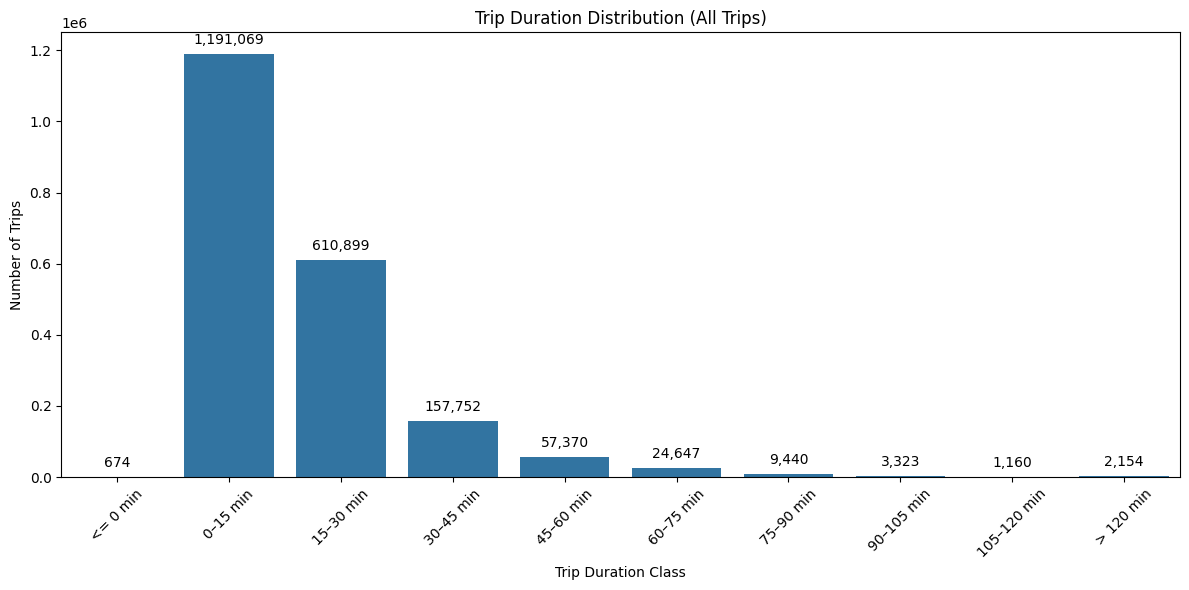

In [53]:
# Full distribution (no filtering) yellow
summary_yellow = calculate_duration_distribution(yellow)
plot_duration_distribution(summary_yellow, title_suffix=' (All Trips)')



  Duration Class  Trip Count  Percentage
0       <= 0 min          41        0.12
1       0–15 min       21391       64.80
2      15–30 min        8871       26.87
3      30–45 min        1798        5.45
4      45–60 min         481        1.46
5      60–75 min         161        0.49
6      75–90 min          72        0.22
7     90–105 min          36        0.11
8    105–120 min           6        0.02
9      > 120 min         155        0.47


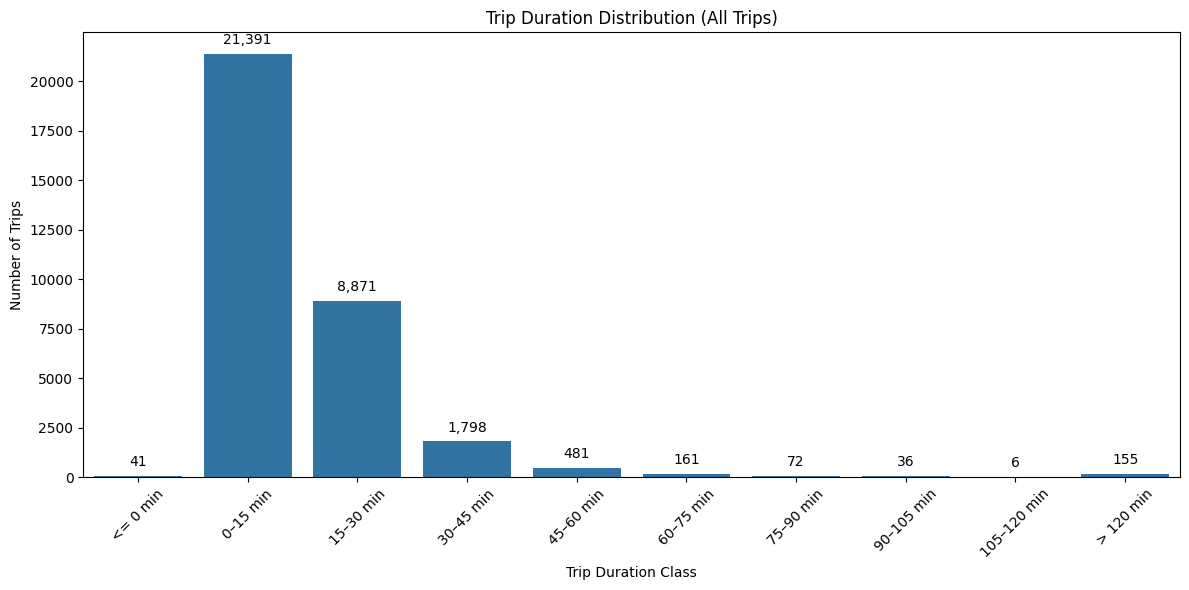

In [58]:
# Full distribution (no filtering) green
summary_green = calculate_duration_distribution(green)
plot_duration_distribution(summary_green, title_suffix=' (All Trips)')



  Duration Class  Trip Count  Percentage
0       <= 0 min         477        0.00
1       0–15 min     5427969       45.33
2      15–30 min     4331744       36.18
3      30–45 min     1465044       12.24
4      45–60 min      486330        4.06
5      60–75 min      167195        1.40
6      75–90 min       59963        0.50
7     90–105 min       21440        0.18
8    105–120 min        7633        0.06
9      > 120 min        6251        0.05


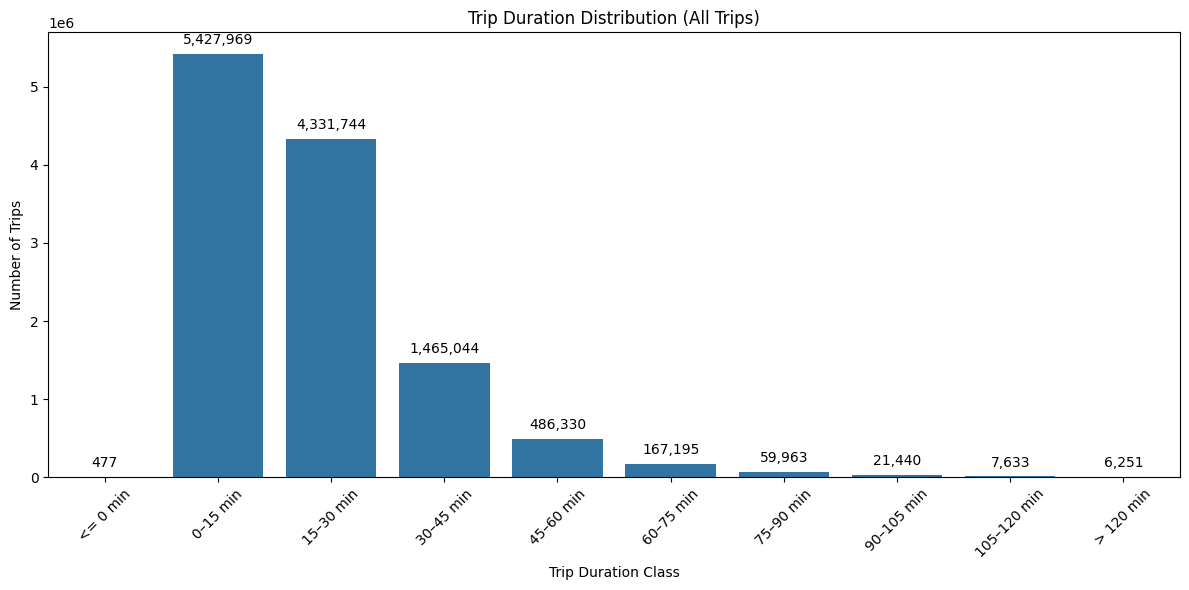

In [59]:
# Full distribution (no filtering) fhvhv
summary_fhvhv = calculate_duration_distribution(fhvhv)
plot_duration_distribution(summary_fhvhv, title_suffix=' (All Trips)')

# **negative duration** handling for Yellow & Green

In [56]:
def analyze_negative_durations(df, duration_col='duration_inMin', display_rows=5, df_name='DataFrame'):
    """
    Analyze and visualize negative trip durations in the DataFrame.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing trip data.
        duration_col (str): Name of the column containing trip durations.
        display_rows (int): Number of rows to preview from negative entries.
        
    Returns:
        pd.DataFrame: DataFrame with negative durations and their counts.
    """
    negative_durations = df[df[duration_col] < 0]
    
    if negative_durations.empty:
        print(f"✅ No negative trip durations found in {df_name} the DataFrame.")
        return pd.DataFrame()
    
    # Display summary statistics
    print(f"\n🔍 Found {len(negative_durations)} negative trip durations in {df_name}")
          

    neg_count = len(negative_durations)
    total_count = len(df)
    print(f"⚠️ Found {neg_count} negative trip durations "
          f"({(neg_count / total_count) * 100:.4f}% of all records):")
    

    print(f"\n🔍 Sample of {display_rows} negative trips:")
    display(negative_durations.head(display_rows))

    
    print("\n📊 Summary of Negative Durations:")
    print(negative_durations[duration_col].describe())
    print("\n📊 summary of distance related to Negative Durations:")
    print(negative_durations['trip_distance'].describe())
    print("\n📊 summary of fare_amount related to Negative Durations:")
    print(negative_durations['fare_amount'].describe())
    
    return negative_durations

# Analyze negative durations in the yellow DataFrame
negative_durations_yellow = analyze_negative_durations(yellow, duration_col='duration_inMin')
negative_durations_green = analyze_negative_durations(green, duration_col='duration_inMin')
#negative_durations_fhvhv = analyze_negative_durations(fhvhv, duration_col ='duration_inMin')



🔍 Found 79 negative trip durations in DataFrame
⚠️ Found 79 negative trip durations (0.0038% of all records):

🔍 Sample of 5 negative trips:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,PU_Borough,PU_Zone,PU_ServiceZone,DO_Borough,DO_Zone,DO_ServiceZone,duration_inMin
13471,1,2024-01-04 12:30:00,2024-01-04 12:18:23,1.0,4.80,99.0,N,165,222,1,31.50,0.0,0.5,0.0,0.0,1.0,33.00,0.0,0.0,2024-01-04,Brooklyn,Midwood,Boro Zone,Brooklyn,Starrett City,Boro Zone,-11.616667
22019,6,2024-01-05 12:01:07,2024-01-05 12:01:03,NaN,3.56,NaN,<NA>,265,77,0,19.20,0.5,0.0,0.0,0.0,0.3,20.00,NaN,NaN,2024-01-05,Outside NYC,Outside NYC,Outside NYC,Brooklyn,East New York/Pennsylvania Avenue,Boro Zone,-0.066667
33291,6,2024-01-08 23:01:27,2024-01-08 23:01:25,NaN,2.80,NaN,<NA>,265,157,0,15.20,0.0,0.5,0.0,0.0,0.3,16.00,NaN,NaN,2024-01-08,Outside NYC,Outside NYC,Outside NYC,Queens,Maspeth,Boro Zone,-0.033333
40274,6,2024-01-10 18:01:39,2024-01-10 18:01:19,NaN,7.70,NaN,<NA>,265,127,0,24.56,0.0,0.5,0.0,0.0,0.3,25.36,NaN,NaN,2024-01-10,Outside NYC,Outside NYC,Outside NYC,Manhattan,Inwood,Boro Zone,-0.333333
119121,1,2024-01-26 11:30:00,2024-01-26 11:28:34,1.0,2.50,99.0,N,192,129,1,22.50,0.0,0.5,0.0,0.0,1.0,24.00,0.0,0.0,2024-01-26,Queens,Queensboro Hill,Boro Zone,Queens,Jackson Heights,Boro Zone,-1.433333



📊 Summary of Negative Durations:
count    79.000000
mean    -28.458228
std      20.099935
min     -56.650000
25%     -45.325000
50%     -36.483333
75%      -0.808333
max      -0.033333
Name: duration_inMin, dtype: float64

📊 summary of distance related to Negative Durations:
count    79.000000
mean      5.124684
std       4.411417
min       0.000000
25%       2.050000
50%       3.690000
75%       6.425000
max      18.720000
Name: trip_distance, dtype: float64

📊 summary of fare_amount related to Negative Durations:
count    79.000000
mean     21.902025
std      16.020983
min     -25.400000
25%      12.100000
50%      19.200000
75%      27.940000
max      74.500000
Name: fare_amount, dtype: float64
✅ No negative trip durations found in DataFrame the DataFrame.


# **Reason for Dropping Negative-Duration Trips**
1. Physical Impossibility
A trip with duration ≤ 0 violates the laws of motion:

Negative time suggests the trip "ended before it started" (timestamp errors).

Zero duration implies infinite speed (data corruption).

2. Statistical Corruption
Negative durations produce invalid speed values:

speed = distance / (negative_time / 60) → Illogical results.

Including them distorts averages, misleading congestion analysis.

In [57]:
def drop_negative_durations(df, df_name='DataFrame', duration_col='duration_inMin', output_dir='output'):
    """
    Drop records with negative trip durations from the DataFrame and export the dropped records.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame containing trip data
        df_name (str): Name of the dataset (used for output filename)
        duration_col (str): Name of the column containing trip durations
        output_dir (str): Directory to save the CSV of dropped records
        
    Returns:
        pd.DataFrame: Cleaned DataFrame without negative durations
        
    Example:
        >>> yellow = drop_negative_durations(yellow, df_name='yellow')
    """
    import os
    import pandas as pd
    
    # Validate input
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")
    if duration_col not in df.columns:
        raise ValueError(f"Column '{duration_col}' not found in DataFrame")
        
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Identify negative durations
    negative_mask = df[duration_col] < 0
    negative_count = negative_mask.sum()
    
    if negative_count == 0:
        print(f"✅ {df_name}: No negative trip durations found")
        return df.copy()
    
    # Export negative records
    negative_records = df[negative_mask]
    output_path = os.path.join(output_dir, f"{df_name}_negative_durations.csv")
    negative_records.to_csv(output_path, index=False)
    print(f"⚠️ {df_name}: Exported {negative_count} negative durations to {output_path}")
    
    # Clean the DataFrame
    cleaned_df = df[~negative_mask].reset_index(drop=True)
    print(f"✅ {df_name}: Removed {negative_count} negative durations ({len(cleaned_df)} records remain)")
    
    return cleaned_df
# Example usage:
yellow = drop_negative_durations(yellow, df_name='yellow', duration_col='duration_inMin', output_dir='output')
green = drop_negative_durations(green, df_name='green', duration_col='duration_inMin', output_dir='output')

⚠️ yellow: Exported 79 negative durations to output\yellow_negative_durations.csv
✅ yellow: Removed 79 negative durations (2058409 records remain)
✅ green: No negative trip durations found


# Zero Values handling in (Yellow & Green)

In [62]:
# disply zero durations 
def display_zero_durations(df, duration_col='duration_inMin', display_rows=5):
    """
    Display records with zero trip durations in the DataFrame.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing trip data.
        duration_col (str): Name of the column containing trip durations.
        display_rows (int): Number of rows to preview from zero-duration entries.
        
    Returns:
        pd.DataFrame: DataFrame with zero durations and their counts.
    """
    zero_durations = df[df[duration_col] == 0.00]
    
    if zero_durations.empty:
        print("✅ No zero trip durations found.")
        return pd.DataFrame()
    
    zero_count = len(zero_durations)
    total_count = len(df)
    print(f"⚠️ Found {zero_count} zero trip durations "
          f"({(zero_count / total_count) * 100:.4f}% of all records):")
    
    print(f"\n🔍 Sample of {display_rows} zero-duration trips:")
    display(zero_durations.head(display_rows))
    
    print("\n📊 Summary of Zero Durations:")
    print(zero_durations[duration_col].describe())
    
    return zero_durations
# Display zero durations in the yellow DataFrame
print("for yellow")
zero_durations_yellow = display_zero_durations(yellow, duration_col='duration_inMin')
# Display zero durations in the green DataFrame
print("for green")
zero_durations_green = display_zero_durations(green, duration_col='duration_inMin')

for yellow
⚠️ Found 595 zero trip durations (0.0289% of all records):

🔍 Sample of 5 zero-duration trips:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,PU_Borough,PU_Zone,PU_ServiceZone,DO_Borough,DO_Zone,DO_ServiceZone,duration_inMin
179,1,2024-01-01 04:08:24,2024-01-01 04:08:24,2.0,0.0,1.0,N,249,264,2,10.70,3.5,0.5,0.0,0.0,1.0,15.70,2.5,0.0,2024-01-01,Manhattan,West Village,Yellow Zone,Undefined,Undefined,Undefined,0.0
487,1,2024-01-01 11:39:36,2024-01-01 11:39:36,NaN,0.0,NaN,<NA>,236,236,0,26.59,0.0,0.5,6.1,0.0,1.0,36.69,NaN,NaN,2024-01-01,Manhattan,Upper East Side North,Yellow Zone,Manhattan,Upper East Side North,Yellow Zone,0.0
3584,1,2024-01-01 19:49:23,2024-01-01 19:49:23,1.0,0.0,1.0,N,264,264,2,3.00,3.5,0.5,0.0,0.0,1.0,8.00,2.5,0.0,2024-01-01,Undefined,Undefined,Undefined,Undefined,Undefined,Undefined,0.0
17694,1,2024-01-05 14:07:48,2024-01-05 14:07:48,1.0,0.0,1.0,N,41,264,2,3.00,0.0,0.5,0.0,0.0,1.0,4.50,0.0,0.0,2024-01-05,Manhattan,Central Harlem,Boro Zone,Undefined,Undefined,Undefined,0.0
18719,1,2024-01-05 00:33:04,2024-01-05 00:33:04,0.0,0.0,99.0,N,264,264,1,87.00,0.0,0.0,0.0,0.0,0.0,87.00,0.0,0.0,2024-01-05,Undefined,Undefined,Undefined,Undefined,Undefined,Undefined,0.0



📊 Summary of Zero Durations:
count    595.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: duration_inMin, dtype: float64
for green
⚠️ Found 41 zero trip durations (0.1242% of all records):

🔍 Sample of 5 zero-duration trips:


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_date,PU_Borough,PU_Zone,PU_ServiceZone,DO_Borough,DO_Zone,DO_ServiceZone,duration_inMin
72,1,2024-01-02 08:10:53,2024-01-02 08:10:53,N,1.0,74,264,1.0,0.00,8.6,0.00,1.50,0.00,0.0,NaN,1.0,10.10,2.0,1.0,0.00,2024-01-02,Manhattan,East Harlem North,Boro Zone,Undefined,Undefined,Undefined,0.0
885,1,2024-01-11 14:41:45,2024-01-11 14:41:45,N,1.0,238,238,1.0,2.30,18.4,2.75,4.25,5.05,0.0,NaN,0.0,30.45,1.0,1.0,2.75,2024-01-11,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Upper West Side North,Yellow Zone,0.0
1007,1,2024-01-12 03:13:08,2024-01-12 03:13:08,N,1.0,74,264,1.0,0.00,17.0,0.00,1.50,0.00,0.0,NaN,1.0,18.50,2.0,1.0,0.00,2024-01-12,Manhattan,East Harlem North,Boro Zone,Undefined,Undefined,Undefined,0.0
3118,2,2024-02-03 17:43:00,2024-02-03 17:43:00,<NA>,NaN,83,83,NaN,0.02,15.0,0.00,0.00,0.00,0.0,NaN,1.0,16.00,NaN,NaN,NaN,2024-02-03,Queens,Elmhurst/Maspeth,Boro Zone,Queens,Elmhurst/Maspeth,Boro Zone,0.0
6212,1,2024-03-08 11:24:37,2024-03-08 11:24:37,N,1.0,74,264,1.0,0.00,39.4,2.75,1.50,0.00,0.0,NaN,1.0,43.65,2.0,1.0,2.75,2024-03-08,Manhattan,East Harlem North,Boro Zone,Undefined,Undefined,Undefined,0.0



📊 Summary of Zero Durations:
count    41.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: duration_inMin, dtype: float64


In [67]:
# # drop zero durations trips from the DataFrame
# def drop_zero_durations(df, df_name='DataFrame', duration_col='duration_inMin', output_dir='output'):
#     """
#     Drop records with zero trip durations from the DataFrame and export the dropped records.
    
#     Parameters:
#         df (pd.DataFrame): Input DataFrame containing trip data
#         df_name (str): Name of the dataset (used for output filename)
#         duration_col (str): Name of the column containing trip durations
#         output_dir (str): Directory to save the CSV of dropped records
        
#     Returns:
#         pd.DataFrame: Cleaned DataFrame without zero durations
        
#     Example:
#         yellow = drop_zero_durations(yellow, df_name='yellow')
#     """
#     import os
#     import pandas as pd
    
#     # Validate input
#     if not isinstance(df, pd.DataFrame):
#         raise ValueError("Input must be a pandas DataFrame")
#     if duration_col not in df.columns:
#         raise ValueError(f"Column '{duration_col}' not found in DataFrame")
        
#     # Create output directory if it doesn't exist
#     os.makedirs(output_dir, exist_ok=True)
    
#     # copy the DataFrame to avoid modifying the original
#     df = df.copy()
#     # Identify zero durations
#     zero_mask = df[duration_col] == 0.00
#     zero_count = zero_mask.sum()
#     if zero_count == 0:
#         print(f"✅ {df_name}: No zero trip durations found")
#     else:
#         # create a DataFrame of zero-duration records
#         zero_records = df[zero_mask]
#         # Export zero records
#         output_path = os.path.join(output_dir, f"{df_name}_zero_durations.csv")
#         zero_records.to_csv(output_path, index=False)
#         print(f"⚠️ {df_name}: Exported {zero_count} zero durations to {output_path}")
#         # Clean the DataFrame
#         cleaned_df = df[~zero_mask].reset_index(drop=True)
#         print(f"✅ {df_name}: Removed {zero_count} zero durations ({len(cleaned_df)} records remain)")
#         return cleaned_df
# # Example usage:
# yellow = drop_zero_durations(yellow, df_name='yellow', duration_col='duration_inMin', output_dir='output')


In [40]:
zero_distace = yellow['trip_distance'] == 0.00
def display_zero_distances(df, distance_col='trip_distance', display_rows=5):
    """
    Display records with zero trip distances in the DataFrame.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing trip data.
        distance_col (str): Name of the column containing trip distances.
        display_rows (int): Number of rows to preview from zero-distance entries.
        
    Returns:
        pd.DataFrame: DataFrame with zero distances and their counts.
    """
    zero_distances = df[df[distance_col] == 0.00]
    
    if zero_distances.empty:
        print("✅ No zero trip distances found.")
        return pd.DataFrame()
    
    zero_count = len(zero_distances)
    total_count = len(df)
    print(f"⚠️ Found {zero_count} zero trip distances "
          f"({(zero_count / total_count) * 100:.4f}% of all records):")
    
    print(f"\n🔍 Sample of {display_rows} zero-distance trips:")
    display(zero_distances.head(display_rows))
    
    print("\n📊 Summary of Zero Distances:")
    print(zero_distances[distance_col].describe())
    
    return zero_distances
# Display zero distances in the yellow DataFrame
zero_distances_yellow = display_zero_distances(yellow, distance_col='trip_distance')
# Display zero distances in the green DataFrame
zero_distances_green = display_zero_distances(green, distance_col='trip_distance')
# Display zero distances in the FHVHV DataFrame
#zero_distances_fhvhv = display_zero_distances(fhvhv, distance_col='trip_distance')

⚠️ Found 38733 zero trip distances (1.8816% of all records):

🔍 Sample of 5 zero-distance trips:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,PU_Borough,PU_Zone,PU_ServiceZone,DO_Borough,DO_Zone,DO_ServiceZone,duration_inMin
2,1,2024-01-01 12:06:50,2024-01-01 12:10:49,NaN,0.0,NaN,<NA>,230,43,0,12.16,0.00,0.5,0.0,0.0,1.0,16.16,NaN,NaN,2024-01-01,Manhattan,Times Sq/Theatre District,Yellow Zone,Manhattan,Central Park,Yellow Zone,3.983333
38,1,2024-01-01 04:14:30,2024-01-01 04:28:50,NaN,0.0,NaN,<NA>,13,229,0,25.84,0.00,0.5,0.0,0.0,1.0,29.84,NaN,NaN,2024-01-01,Manhattan,Battery Park City,Yellow Zone,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,14.333333
54,1,2024-01-01 11:19:32,2024-01-01 11:26:31,NaN,0.0,NaN,<NA>,224,87,0,11.75,0.00,0.5,0.0,0.0,1.0,15.75,NaN,NaN,2024-01-01,Manhattan,Stuy Town/Peter Cooper Village,Yellow Zone,Manhattan,Financial District North,Yellow Zone,6.983333
79,1,2024-01-01 07:52:11,2024-01-01 07:59:24,NaN,0.0,NaN,<NA>,162,237,0,9.08,0.00,0.5,0.0,0.0,1.0,13.08,NaN,NaN,2024-01-01,Manhattan,Midtown East,Yellow Zone,Manhattan,Upper East Side South,Yellow Zone,7.216667
111,1,2024-01-01 22:34:41,2024-01-01 22:35:03,1.0,0.0,1.0,N,132,132,3,3.00,2.75,0.5,0.0,0.0,1.0,7.25,0.0,1.75,2024-01-01,Queens,JFK Airport,Airports,Queens,JFK Airport,Airports,0.366667



📊 Summary of Zero Distances:
count    38733.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: trip_distance, dtype: float64
⚠️ Found 1765 zero trip distances (5.3465% of all records):

🔍 Sample of 5 zero-distance trips:


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_date,PU_Borough,PU_Zone,PU_ServiceZone,DO_Borough,DO_Zone,DO_ServiceZone,duration_inMin
0,1,2024-01-01 06:25:24,2024-01-01 06:25:27,N,1.0,165,165,1.0,0.0,3.0,0.0,1.5,25.00,0.0,NaN,1.0,29.50,1.0,1.0,0.0,2024-01-01,Brooklyn,Midwood,Boro Zone,Brooklyn,Midwood,Boro Zone,0.050000
8,2,2024-01-01 06:48:52,2024-01-01 06:49:36,N,5.0,260,260,2.0,0.0,15.0,0.0,0.0,0.09,0.0,NaN,1.0,16.09,1.0,2.0,0.0,2024-01-01,Queens,Woodside,Boro Zone,Queens,Woodside,Boro Zone,0.733333
10,2,2024-01-01 02:10:59,2024-01-01 02:11:03,N,5.0,218,218,1.0,0.0,25.0,0.0,0.0,0.00,0.0,NaN,1.0,26.00,1.0,2.0,0.0,2024-01-01,Queens,Springfield Gardens North,Boro Zone,Queens,Springfield Gardens North,Boro Zone,0.066667
30,1,2024-01-01 11:45:12,2024-01-01 12:10:42,N,1.0,85,216,1.0,0.0,33.5,0.0,1.5,0.00,0.0,NaN,1.0,35.00,1.0,1.0,0.0,2024-01-01,Brooklyn,Erasmus,Boro Zone,Queens,South Ozone Park,Boro Zone,25.500000
67,1,2024-01-02 10:02:09,2024-01-02 10:02:52,N,5.0,223,223,1.0,0.0,15.0,0.0,0.0,0.00,0.0,NaN,0.0,15.00,1.0,2.0,0.0,2024-01-02,Queens,Steinway,Boro Zone,Queens,Steinway,Boro Zone,0.716667



📊 Summary of Zero Distances:
count    1765.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: trip_distance, dtype: float64


In [66]:
# zero distances when pulocationid =!= dolocationid
def display_zero_distance_mismatch(df, pu_locid_col='PULocationID', do_locid_col='DOLocationID', distance_col='trip_distance', display_rows=5):
    """
    Display records with zero trip distances where pickup and dropoff locations do not match.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing trip data.
        pu_locid_col (str): Name of the pickup location ID column.
        do_locid_col (str): Name of the dropoff location ID column.
        distance_col (str): Name of the column containing trip distances.
        display_rows (int): Number of rows to preview from zero-distance entries.
        
    Returns:
        pd.DataFrame: DataFrame with zero distances and their counts.
    """
    zero_distance_mismatch = df[(df[distance_col] == 0.00) & (df[pu_locid_col] != df[do_locid_col])]
    
    if zero_distance_mismatch.empty:
        print("✅ No zero trip distances with mismatched locations found.")
        return pd.DataFrame()
    
    zero_count = len(zero_distance_mismatch)
    total_count = len(df)
    print(f"⚠️ Found {zero_count} zero trip distances with mismatched locations "
          f"({(zero_count / total_count) * 100:.4f}% of all records):")
    
    print(f"\n🔍 Sample of {display_rows} mismatched zero-distance trips:")
    display(zero_distance_mismatch.head(display_rows))
    
    print("\n📊 Summary of Zero Distances with Mismatched Locations:")
    print(zero_distance_mismatch[distance_col].describe())
    
    return zero_distance_mismatch
# Display zero distances with mismatched locations in the yellow DataFrame
zero_distance_mismatch_yellow = display_zero_distance_mismatch(
    yellow, 
    pu_locid_col='PULocationID', 
    do_locid_col='DOLocationID', 
    distance_col='trip_distance'
)

⚠️ Found 12480 zero trip distances with mismatched locations (0.6260% of all records):

🔍 Sample of 5 mismatched zero-distance trips:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,PU_Borough,PU_Zone,PU_ServiceZone,DO_Borough,DO_Zone,DO_ServiceZone,duration_inMin,is_valid,is_cancelled,data_issue
2,1,2024-01-01 12:06:50,2024-01-01 12:10:49,NaN,0.0,NaN,<NA>,230,43,0,12.16,0.0,0.5,0.0,0.0,1.0,16.16,NaN,NaN,2024-01-01,Manhattan,Times Sq/Theatre District,Yellow Zone,Manhattan,Central Park,Yellow Zone,3.983333,True,False,FARE_DISTANCE_RATIO_HIGH
38,1,2024-01-01 04:14:30,2024-01-01 04:28:50,NaN,0.0,NaN,<NA>,13,229,0,25.84,0.0,0.5,0.0,0.0,1.0,29.84,NaN,NaN,2024-01-01,Manhattan,Battery Park City,Yellow Zone,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,14.333333,True,False,FARE_DISTANCE_RATIO_HIGH
54,1,2024-01-01 11:19:32,2024-01-01 11:26:31,NaN,0.0,NaN,<NA>,224,87,0,11.75,0.0,0.5,0.0,0.0,1.0,15.75,NaN,NaN,2024-01-01,Manhattan,Stuy Town/Peter Cooper Village,Yellow Zone,Manhattan,Financial District North,Yellow Zone,6.983333,True,False,FARE_DISTANCE_RATIO_HIGH
79,1,2024-01-01 07:52:11,2024-01-01 07:59:24,NaN,0.0,NaN,<NA>,162,237,0,9.08,0.0,0.5,0.0,0.0,1.0,13.08,NaN,NaN,2024-01-01,Manhattan,Midtown East,Yellow Zone,Manhattan,Upper East Side South,Yellow Zone,7.216667,True,False,FARE_DISTANCE_RATIO_HIGH
130,1,2024-01-01 15:49:03,2024-01-01 16:11:52,NaN,0.0,NaN,<NA>,148,142,0,27.84,0.0,0.5,0.0,0.0,1.0,31.84,NaN,NaN,2024-01-01,Manhattan,Lower East Side,Yellow Zone,Manhattan,Lincoln Square East,Yellow Zone,22.816667,True,False,FARE_DISTANCE_RATIO_HIGH



📊 Summary of Zero Distances with Mismatched Locations:
count    12480.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: trip_distance, dtype: float64


In [68]:
zero_distance_mismatch_yellow[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,12480.000000,12480.000000,12480.000000,12480.000000
mean,20.709129,0.556743,0.197574,25.285053
std,12.886727,2.051420,1.482136,14.729544
min,0.000000,0.000000,0.000000,-4.000000
25%,13.000000,0.000000,0.000000,16.990000
50%,18.230000,0.000000,0.000000,22.495000
75%,25.750000,0.000000,0.000000,30.090000
max,259.980000,40.000000,46.380000,301.430000


In [64]:
# check the zero distance mismatch records
import pandas as pd 
def check_zero_distance_mismatch(df, pu_locid_col='PULocationID', do_locid_col='DOLocationID', distance_col='trip_distance'):
    """
    Check for records with zero trip distances where pickup and dropoff locations do not match.
    """
    zero_distance_mismatch = df[(df[distance_col] == 0.00) & (df[pu_locid_col] != df[do_locid_col])]

    z_d_m_zero_fare = zero_distance_mismatch[zero_distance_mismatch['fare_amount'] == 0.00]
    z_d_m_negative_fare = zero_distance_mismatch[zero_distance_mismatch['fare_amount'] < 0.00]
    z_d_m_above_5_fare = zero_distance_mismatch[zero_distance_mismatch['fare_amount'] > 5.00]
    print(f"⚠️ Found {len(zero_distance_mismatch)} zero trip distances with mismatched locations.")
    print(f"  - Zero fare: {len(z_d_m_zero_fare)}")
    print(f"  - Negative fare: {len(z_d_m_negative_fare)}")
    print(f"  - Fare above $5: {len(z_d_m_above_5_fare)}")
        
    return df
yellow = check_zero_distance_mismatch(
    yellow, 
    pu_locid_col='PULocationID', 
    do_locid_col='DOLocationID', 
    distance_col='trip_distance'
)


⚠️ Found 12480 zero trip distances with mismatched locations.
  - Zero fare: 86
  - Negative fare: 0
  - Fare above $5: 11953


 # Data Cleaning and Qulaity for (Yellow and Green)

In [77]:
import numpy as np
import pandas as pd

def clean_taxi_data(df: pd.DataFrame, taxi_type: str = "yellow") -> pd.DataFrame:
    """
    Generalized cleaning function for NYC Yellow or Green Taxi trip data.
    Applies hard validation rules, soft flags, and cancellation labeling.
    
    Parameters:
    - df: input DataFrame
    - taxi_type: "yellow" or "green"
    
    Returns:
    - Cleaned DataFrame (invalid rows removed, cancellations and issues flagged)
    """
    df = df.copy()
    df['is_valid'] = True
    df['is_cancelled'] = False
    df['data_issue'] = np.nan

    # ------------------------------------------------------------------------------
    # 1️⃣ Hard Rules (Remove invalid data)
    # ------------------------------------------------------------------------------
    df.loc[
        (df['trip_distance'] < 0) |
        (df['duration_inMin'] < 0) |
        (df['fare_amount'] < 0),
        'is_valid'
    ] = False

    # Check if payment_type exists before applying related rules
    if 'payment_type' in df.columns:
        df.loc[
            (df['trip_distance'] == 0) & 
            (df['fare_amount'] > 2.5) & 
            (df['payment_type'].isin([1, 2])),
            'is_valid'
        ] = False

        df.loc[
            (df['payment_type'] == 3) & 
            (df['fare_amount'] != 0),
            'is_valid'
        ] = False

    # ------------------------------------------------------------------------------
    # 2️⃣ Soft Rules (Flag suspicious but not invalid data)
    # ------------------------------------------------------------------------------
    df.loc[
        (df['trip_distance'] == 0) & 
        (df['PULocationID'] != df['DOLocationID']),
        'data_issue'
    ] = 'ZERO_DISTANCE_LOC_MISMATCH'

    df.loc[
        (df['fare_amount'] / (df['trip_distance'] + 0.001) > 50),
        'data_issue'
    ] = 'FARE_DISTANCE_RATIO_HIGH'

    df.loc[
        (df['trip_distance'] < 0.5) & 
        (df['duration_inMin'] > 30),
        'data_issue'
    ] = 'SHORT_TRIP_LONG_DURATION'

    # ------------------------------------------------------------------------------
    # 3️⃣ Cancellation Logic (only if payment_type exists)
    # ------------------------------------------------------------------------------
    if 'payment_type' in df.columns:
        cancellation_conditions = (
            (df['trip_distance'] == 0) & 
            (
                (df['fare_amount'] == 2.5) |
                ((df['fare_amount'] == 0) & (df['payment_type'].isin([1, 2, 6])))
            )
        )

        df.loc[
            cancellation_conditions & (df['is_valid']),
            'is_cancelled'
        ] = True

        df.loc[
            cancellation_conditions & (~df['is_valid']),
            'data_issue'
        ] = 'INVALID_CANCELLATION'

    # ------------------------------------------------------------------------------
    # 4️⃣ Summary and Export
    # ------------------------------------------------------------------------------
    removed_data = df[~df['is_valid']]
    clean_df = df[df['is_valid']].copy()

    removed_data.to_csv(f'removed_invalid_records_{taxi_type}.csv', index=False)

    total = len(df)
    cleaned = len(clean_df)
    removed = len(removed_data)
    cancelled = clean_df['is_cancelled'].sum()

    print(f"📊 Summary for {taxi_type.upper()} taxi:")
    print(f"- Total records: {total}")
    print(f"- Cleaned records: {cleaned} ({cleaned/total*100:.2f}%)")
    print(f"- Removed invalid records: {removed} ({removed/total*100:.2f}%)")
    print(f"- Cancellations: {cancelled} ({cancelled/cleaned*100:.2f}%)\n")

    print("🛑 Reasons for invalid data:")
    print(removed_data['data_issue'].value_counts())

    print("\n🚩 Cancellation breakdown:")
    print(clean_df['is_cancelled'].value_counts())

    return clean_df


In [78]:
yellow = clean_taxi_data(yellow, taxi_type="yellow")
green = clean_taxi_data(green, taxi_type="green")


C:\Users\osama\AppData\Local\Temp\ipykernel_10728\1179990640.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ZERO_DISTANCE_LOC_MISMATCH' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[


📊 Summary for YELLOW taxi:
- Total records: 1993619
- Cleaned records: 1993619 (100.00%)
- Removed invalid records: 0 (0.00%)
- Cancellations: 183 (0.01%)

🛑 Reasons for invalid data:
Series([], Name: count, dtype: int64)

🚩 Cancellation breakdown:
is_cancelled
False    1993436
True         183
Name: count, dtype: int64
📊 Summary for GREEN taxi:
- Total records: 33012
- Cleaned records: 31148 (94.35%)
- Removed invalid records: 1864 (5.65%)
- Cancellations: 11 (0.04%)

🛑 Reasons for invalid data:
data_issue
FARE_DISTANCE_RATIO_HIGH      1390
SHORT_TRIP_LONG_DURATION       300
ZERO_DISTANCE_LOC_MISMATCH       2
Name: count, dtype: int64

🚩 Cancellation breakdown:
is_cancelled
False    31137
True        11
Name: count, dtype: int64


C:\Users\osama\AppData\Local\Temp\ipykernel_10728\1179990640.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ZERO_DISTANCE_LOC_MISMATCH' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[


In [80]:
missing_summary(yellow)
missing_summary(green)


🕳️ Missing Value Summary for: DataFrame
                      Missing Count  Missing %
data_issue                  1969309      98.78
passenger_count              194600       9.76
RatecodeID                   194600       9.76
store_and_fwd_flag           194600       9.76
congestion_surcharge         194600       9.76
Airport_fee                  194600       9.76

🕳️ Missing Value Summary for: DataFrame
                      Missing Count  Missing %
ehail_fee                     31148     100.00
data_issue                    30789      98.85
RatecodeID                     1205       3.87
store_and_fwd_flag             1205       3.87
passenger_count                1205       3.87
payment_type                   1205       3.87
trip_type                      1206       3.87
congestion_surcharge           1205       3.87


In [122]:
# Drop helper columns before returning
yellow = yellow.drop(columns=['is_valid', 'is_cancelled', 'data_issue','store_and_fwd_flag'], errors='ignore')
green = green.drop(columns=['is_valid', 'is_cancelled', 'data_issue', 'ehail_fee'], errors='ignore')

 # Imputation for missing values (Yellow ang Green)

 - Airport fees for Yellow Imputation

In [94]:
def impute_airport_fee(df):
    """
    Cleans and imputes Airport_fee using fixed business rules:
    - Only JFK (PU=132) and LGA (PU=138) should have a fee of 1.75.
    - All other pickups should have Airport_fee = 0.0.
    - Handles negative, incorrect, and missing values.
    - Saves the corrected values to a CSV file.
    """
    import os
    # --- Make a copy to track original values ---
    original_df = df.copy()

    # Constants
    ELIGIBLE_AIRPORT_LOC_IDS = {132, 138}  # PULocationIDs for JFK and LaGuardia
    ELIGIBLE_AIRPORT_ZONES = {'JFK Airport', 'LaGuardia Airport'} # Zones for JFK and LaGuardia

    DEFAULT_FEE = 1.75

    # --- Step 1: Determine eligibility ---
    is_eligible = (
        df['PULocationID'].isin(ELIGIBLE_AIRPORT_LOC_IDS) |
        df['PU_Zone'].isin(ELIGIBLE_AIRPORT_ZONES)
    )

    # --- Step 2: Fix all invalid, negative, incorrect, or missing fees ---
    
    # Fix negative values: absolute if eligible, 0 if not
    df.loc[df['Airport_fee'] < 0, 'Airport_fee'] = 0.0
    df.loc[(df['Airport_fee'] < 0) & is_eligible, 'Airport_fee'] = DEFAULT_FEE
    print(f"Fixed {(df['Airport_fee'] < 0).sum()} negative Airport_fee values.")

    # Fix incorrect values like 1.25 at eligible locations
    df.loc[(df['Airport_fee'] == 1.25) & is_eligible, 'Airport_fee'] = DEFAULT_FEE
    print(f"Fixed {(df['Airport_fee'] == 1.25).sum()} incorrect Airport_fee values.")

    # Impute missing: 1.75 if eligible, 0.0 otherwise
    df.loc[df['Airport_fee'].isna() & is_eligible, 'Airport_fee'] = DEFAULT_FEE
    df.loc[df['Airport_fee'].isna() & ~is_eligible, 'Airport_fee'] = 0.0
    print(f"Imputed {df['Airport_fee'].isna().sum()} missing Airport_fee values.")

    # Ensure non-airport pickups never have positive fees
    df.loc[~is_eligible & (df['Airport_fee'] > 0), 'Airport_fee'] = 0.0
    print(f"Set {((~is_eligible) & (df['Airport_fee'] > 0)).sum()} non-airport pickups to 0.0 Airport_fee.")

    # --- Identify changed rows ---
    changed_rows = df[df['Airport_fee'] != original_df['Airport_fee']]

    # --- Export only changed rows ---
    output_dir = "9 Jun.25"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created directory: {output_dir}")

    output_path = os.path.join(output_dir, "imputed_only.csv")
    changed_rows.to_csv(output_path, index=False)
    print(f"Only imputed/modified rows saved to '{output_path}'")

    return df
yellow = impute_airport_fee(yellow)


Fixed 0 negative Airport_fee values.
Fixed 0 incorrect Airport_fee values.
Imputed 0 missing Airport_fee values.
Set 0 non-airport pickups to 0.0 Airport_fee.
Only imputed/modified rows saved to '9 Jun.25\imputed_only.csv'


In [99]:
def impute_passenger_count_by_location(df, group_col='PULocationID'):
    df = df.copy()

    # Replace 0, >6, and NaN with NaN first
    df['passenger_count'] = df['passenger_count'].apply(
        lambda x: x if pd.notnull(x) and 1 <= x <= 6 else np.nan
    )

    # Compute mode per group
    mode_by_group = df.groupby(group_col)['passenger_count'].agg(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    )

    # Impute with group mode
    df['passenger_count'] = df.apply(
        lambda row: mode_by_group[row[group_col]]
        if pd.isnull(row['passenger_count']) else row['passenger_count'],
        axis=1
    )

    # If still missing (group had no valid mode), fill with overall mode (1)
    df['passenger_count'] = df['passenger_count'].fillna(1)

    return df

yellow= impute_passenger_count_by_location(yellow)



In [111]:
def hybrid_impute_ratecodeid(df):
    df = df.copy()

    # Replace invalid '99' with NaN
    df['RatecodeID'] = df['RatecodeID'].replace(99, np.nan)

    # Define known zone IDs
    jfk_zones = [132]         # JFK Airport
    newark_zones = [1]        # Replace with actual Newark ID if different

    # Force assign RatecodeID based on known PU/DO zones
    def get_forced_ratecodeid(pu, do):
        if pu in jfk_zones or do in jfk_zones:
            return 2
        elif pu in newark_zones or do in newark_zones:
            return 3
        return np.nan

    df['imputed_ratecodeid'] = df.apply(
        lambda row: get_forced_ratecodeid(row['PULocationID'], row['DOLocationID']) 
        if pd.isna(row['RatecodeID']) else row['RatecodeID'],
        axis=1
    )

    # Compute mode RatecodeID by PU/DO group (excluding still-missing)
    group_mode = (
        df[df['imputed_ratecodeid'].notna()]
        .groupby(['PULocationID', 'DOLocationID'])['imputed_ratecodeid']
        .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    )

    # Impute missing using PU/DO group mode
    def fill_group_mode(row):
        if pd.notna(row['imputed_ratecodeid']):
            return row['imputed_ratecodeid']
        return group_mode.get((row['PULocationID'], row['DOLocationID']), np.nan)

    df['RatecodeID'] = df.apply(fill_group_mode, axis=1)

    # Final fallback to standard rate
    df['RatecodeID'] = df['RatecodeID'].fillna(1.0).astype(int)

    # Drop helper column
    df.drop(columns=['imputed_ratecodeid'], inplace=True)

    return df


In [112]:
yellow = hybrid_impute_ratecodeid(yellow)


In [142]:
def impute_congestion_surcharge(df):
    df = df.copy()

    # Step 1: Replace invalids
    df['congestion_surcharge'] = df['congestion_surcharge'].replace({-2.5: np.nan, 1.0: np.nan})

    # Step 2: Impute logic
    def infer_surcharge(row):
        if not pd.isna(row['congestion_surcharge']):
            return row['congestion_surcharge']
        if row.get('is_congestion', False):
            return 2.5
        if row['pickup_hour'] in [6, 7, 8, 9, 16, 17, 18, 19]:  # typical rush hours
            return 2.5
        return 0.0

    df['congestion_surcharge'] = df.apply(infer_surcharge, axis=1)

    return df


In [143]:
yellow = impute_congestion_surcharge(yellow)


In [166]:
import pandas as pd
import numpy as np

def impute_zero_trip_distance(df):
    df = df.copy()

    print(f"✅ Original records: {len(df):,}")

    # Create a mask for eligible zero-distance trips
    mask_zero = df['trip_distance'] == 0
    mask_eligible = (
        mask_zero &
        (df['fare_amount'] > 2.5) &
        (df['duration_inMin'] > 0) &
        (df['PULocationID'] != df['DOLocationID']) &
        df['PULocationID'].notna() &
        df['DOLocationID'].notna()
    )

    # Calculate median trip_distance for each PU-DO pair
    pu_do_medians = (
        df.loc[~mask_zero & df['trip_distance'].notna()]
        .groupby(['PULocationID', 'DOLocationID'], observed=True)['trip_distance']
        .median()
        .to_dict()
    )

    # Impute values
    def impute_distance(row):
        return pu_do_medians.get((row['PULocationID'], row['DOLocationID']), np.nan)

    df.loc[mask_eligible, 'trip_distance'] = df.loc[mask_eligible].apply(impute_distance, axis=1)

    # Count after imputation
    imputed_count = mask_eligible.sum()

    # Drop invalid remaining zero or missing distances
    before_drop = len(df)
    df = df[df['trip_distance'].notna() & (df['trip_distance'] > 0)].copy()
    dropped = before_drop - len(df)

    print(f"✔️ Cleaned valid trips: {len(df):,}")
    print(f"🧪 Imputed trips (PU ≠ DO): {imputed_count:,}")
    print(f"❌ Dropped invalid trips: {dropped:,}")

    return df



yellow = impute_zero_trip_distance(yellow)


✅ Original records: 1,990,160
✔️ Cleaned valid trips: 1,990,160
🧪 Imputed trips (PU ≠ DO): 12,022
❌ Dropped invalid trips: 0


In [172]:
# Get index of rows where duration_inMin == 0
zero_duration_idx = yellow[yellow['duration_inMin'] == 0].index

# Drop those rows using .drop()
yellow = yellow.drop(index=zero_duration_idx).copy()


In [173]:
zero_trip_count = (yellow['duration_inMin'] == 0).sum()
print(f"Number of trips with zero distance: {zero_trip_count}")


Number of trips with zero distance: 0


##__________________________________________________________

In [123]:
missing_summary(green)


🕳️ Missing Value Summary for: DataFrame
                      Missing Count  Missing %
store_and_fwd_flag             1205       3.87
RatecodeID                     1205       3.87
passenger_count                1205       3.87
payment_type                   1205       3.87
trip_type                      1206       3.87
congestion_surcharge           1205       3.87


In [ ]:
# First, filter for zero-distance trips with location mismatches
zero_dist_mismatch = yellow[
    (yellow['trip_distance'] == 0.00) & 
    (yellow['PULocationID'] != yellow['DOLocationID'])
]

# Then analyze by payment type and fare amounts
for payment_type in yellow['payment_type'].unique():
    print(f"\n=== Analysis for Payment Type: {payment_type} ===")
    
    # Filter for current payment type
    subset = zero_dist_mismatch[zero_dist_mismatch['payment_type'] == payment_type]
    
    # Break down by fare amount categories
    zero_fare = subset[subset['fare_amount'] == 0.00]
    negative_fare = subset[subset['fare_amount'] < 0.00]
    low_fare = subset[(subset['fare_amount'] > 0.00) & (subset['fare_amount'] <= 2.50)]
    medium_fare = subset[(subset['fare_amount'] > 2.50) & (subset['fare_amount'] <= 5.00)]
    high_fare = subset[subset['fare_amount'] > 5.00]
    
    # Print results
    print(f"Total records: {len(subset)}")
    print(f"Zero fare: {len(zero_fare)}")
    print(f"Negative fare: {len(negative_fare)}")
    print(f"Low fare (0 < fare ≤ $2.50): {len(low_fare)}")
    print(f"Medium fare ($2.50 < fare ≤ $5.00): {len(medium_fare)}")
    print(f"High fare (> $5.00): {len(high_fare)}")
    
    # Additional useful stats
    if len(subset) > 0:
        print(f"Average fare: ${subset['fare_amount'].mean():.2f}")
        print(f"Minimum fare: ${subset['fare_amount'].min():.2f}")
        print(f"Maximum fare: ${subset['fare_amount'].max():.2f}")

In [ ]:
import seaborn as sns

# Plot fare distribution by payment type
plt.figure(figsize=(12,6))
sns.boxplot(
    data=yellow[
        (yellow['trip_distance'] == 0) & 
        (yellow['PULocationID'] != yellow['DOLocationID'])
    ],
    x='payment_type',
    y='fare_amount',
    showfliers=False
)
plt.axhline(y=2.5, color='r', linestyle='--')
plt.title("Fare Distribution for Zero-Distance Mismatches by Payment Type")
plt.ylabel("Fare Amount ($)")
plt.xlabel("Payment Type")
plt.show()

# **feature engineering: Average speed in mph**  

In [134]:
def add_average_speed_column(df, distance_col='trip_distance', duration_col='duration_inMin'):
    """
    Adds an 'average_speed' column in miles per hour to the DataFrame.
    """
    df = df.copy()
    df = df.assign(
        average_speed=lambda x: np.where(
            x[duration_col] > 0,
            x[distance_col] / (x[duration_col] / 60),
            np.nan
        )
    )
    return df

# Add average speed column to the yellow DataFrame
yellow = add_average_speed_column(yellow, distance_col='trip_distance', duration_col='duration_inMin')



In [135]:
yellow['average_speed'].describe()

count    1.993494e+06
mean     1.859510e+01
std      2.802864e+03
min      0.000000e+00
25%      6.800000e+00
50%      9.241935e+00
75%      1.276596e+01
max      2.963097e+06
Name: average_speed, dtype: float64

In [ ]:
yellow['average_speed'].min()

In [ ]:
# nan values in average_speed column
# Check for NaN values in the 'average_speed' column
import pandas as pd
# Display len 'average_speed' is NaN
nan_count = yellow['average_speed'].isna().sum()
print(f"Number of NaN values in 'average_speed' column: {nan_count}")

# Display rows where 'average_speed' is NaN
nan_rows = yellow[yellow['average_speed'].isna()]
display(f"Head of Rows with NaN 'average_speed':")
display(nan_rows.head(5))

# Extracting pick up and drop hour 

In [136]:
def add_pickup_hour_column(df,
                            pickup_hour='tpep_pickup_datetime',
                            dropoff_hour='tpep_dropoff_datetime'):  
    """
    Adds 'pickup_hour' and 'dropoff_hour' columns to the DataFrame.
    Parameters:
        df (pd.DataFrame): Input DataFrame containing pickup and dropoff datetime columns.
        df_name (str): Name of the DataFrame for display purposes.
        pickup_hour (str): Name of the pickup datetime column.
        dropoff_hour (str): Name of the dropoff datetime column.
    Returns:
        pd.DataFrame: DataFrame with added 'pickup_hour' and 'dropoff_hour' columns.
    """
    df = df.copy()
    df = df.assign(
        pickup_hour=pd.to_datetime(df[pickup_hour], errors='coerce').dt.hour,
        dropoff_hour=pd.to_datetime(df[dropoff_hour], errors='coerce').dt.hour
    )
    return df
# Add pickup and dropoff hour columns to the yellow DataFrame
yellow = add_pickup_hour_column(yellow, 
                                 pickup_hour='tpep_pickup_datetime', 
                                 dropoff_hour='tpep_dropoff_datetime')

In [ ]:
yellow[['pickup_hour', 'dropoff_hour','duration_inMin']].head()

# ✅ Median speed per (PULocationID, Pickup Hour) — this lets you gauge what's "normal" in a place at a particular time of day.

In [137]:
def add_median_speed_transform(df,
                             groupby_columns=['PULocationID', 'pickup_hour'],
                             speed_col='average_speed',
                             new_col='median_speed'):
    """
    Computes median speed for each group and broadcasts to rows WITHOUT merging.
    More memory-efficient for large datasets.
    """
    import pandas as pd
    
    # Convert to numeric (keeps NAs)
    df[speed_col] = pd.to_numeric(df[speed_col], errors='coerce')
    
    # Calculate and broadcast medians
    df[new_col] = df.groupby(groupby_columns, observed=True)[speed_col].transform('median')
    
    return df
# Add median speed column to the yellow DataFrame
yellow = add_median_speed_transform(yellow, 
                                     groupby_columns=['PULocationID', 'pickup_hour'], 
                                     speed_col='average_speed', 
                                     new_col='median_speed')

In [138]:
# the median speed column
yellow.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,PU_Borough,PU_Zone,PU_ServiceZone,DO_Borough,DO_Zone,DO_ServiceZone,duration_inMin,Is_JFK_LGA_Pickup,average_speed,pickup_hour,dropoff_hour,median_speed
0,2,2002-12-31 23:09:40,2003-01-01 20:22:32,1.0,2.12,1,234,148,2,17.70,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,2002-12-31,Manhattan,Union Sq,Yellow Zone,Manhattan,Lower East Side,Yellow Zone,1272.866667,False,0.099932,23,20,10.013245
1,2,2009-01-01 23:58:40,2009-01-02 00:01:40,1.0,0.46,1,137,264,2,4.40,3.5,0.5,0.00,0.0,1.0,9.40,0.0,0.0,2009-01-01,Manhattan,Kips Bay,Yellow Zone,Undefined,Undefined,Undefined,3.000000,False,9.200000,23,0,11.421380
2,1,2024-01-01 12:06:50,2024-01-01 12:10:49,1.0,0.00,1,230,43,0,12.16,0.0,0.5,0.00,0.0,1.0,16.16,2.5,0.0,2024-01-01,Manhattan,Times Sq/Theatre District,Yellow Zone,Manhattan,Central Park,Yellow Zone,3.983333,False,0.000000,12,12,7.473467
3,2,2024-01-01 00:46:22,2024-01-01 01:04:58,3.0,1.25,1,164,229,1,16.30,1.0,0.5,4.26,0.0,1.0,25.56,2.5,0.0,2024-01-01,Manhattan,Midtown South,Yellow Zone,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,18.600000,False,4.032258,0,1,10.758621
4,2,2024-01-01 14:41:48,2024-01-01 15:04:38,2.0,2.77,1,43,164,2,21.20,0.0,0.5,0.00,0.0,1.0,25.20,2.5,0.0,2024-01-01,Manhattan,Central Park,Yellow Zone,Manhattan,Midtown South,Yellow Zone,22.833333,False,7.278832,14,15,7.861605


In [128]:
# borough_speed
borough_speed = yellow.groupby('PU_Borough')['median_speed'].describe().reset_index()
borough_speed = borough_speed.rename(columns={
    '50%': 'median_speed',
    'count': 'trip_count',
    'mean': 'mean_speed',
    'std': 'std_speed',
    # 'min': 'min_speed',
    'max': 'max_speed'
})

borough_speed.value_counts()

KeyError: 'Column not found: median_speed'

In [ ]:
# borough to borough distace 
borough_distance = yellow.groupby(['PU_Borough', 'DO_Borough'])['trip_distance'].mean().reset_index()
borough_distance = borough_distance.rename(columns={
    'trip_distance': 'mean_trip_distance'
})
borough_distance.value_counts()
# Display the borough speed and distance DataFrames
print("\nBorough Speed Statistics:")
print(borough_speed)
print("\nBorough to Borough Distance Statistics:")
print(borough_distance)

In [ ]:
# check avg speed above 70
def check_high_speed(df, speed_col='average_speed', threshold=70):
    """
    Check for trips with average speed above a specified threshold.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame containing trip data.
        speed_col (str): Name of the column containing average speed.
        threshold (float): Speed threshold to check against.
        
    Returns:
        pd.DataFrame: DataFrame with trips exceeding the speed threshold.
    """
    high_speed_trips = df[df[speed_col] > threshold]
    return high_speed_trips
# Check for high-speed trips in the yellow DataFrame
high_speed_yellow = check_high_speed(yellow, speed_col='average_speed', threshold=70)

In [ ]:
high_speed_yellow_count = len(high_speed_yellow)
print(f"Number of trips with average speed above 70 mph: {high_speed_yellow_count}")
if high_speed_yellow_count > 0:
    print("Sample of high-speed trips:")
    display(high_speed_yellow.head(5))

In [ ]:
# Check the trip distance for high-speed trips
print("\nTrip Distance Statistics for High-Speed Trips:")

high_speed_yellow.describe()


Busine­ss logic for labelling is_congestion=True should consider multiple factors:

Average speed vs. group median:
A trip is likely rooted in congestion if it's significantly slower than what's typical for that location and time of day. E.g., when average_speed < 0.5 * median_speed_per_PU_hour.

Absolute speed thresholds:
Based on TLC and academic analyses, NYC taxi speeds normally range between 10–14 mph, dropping to 4–7 mph during peak congestion in Manhattan 
arxiv.org
+6
medium.com
+6
github.com
+6
.
We can leverage absolute thresholds like:

average_speed < 5 mph — suggests severe congestion (common in peak Manhattan).

average_speed > 70 mph — indicates an unrealistic event, not congestion.

Trip duration and distance:
Even a long-duration trip might not reflect congestion if it's long-distance travel — but truly anomalous ones (lasting > 6 hours, < 0.5 mph average, or 0 distance) are non-congestion, likely erroneous.

We want is_congestion==True only if there's consistent evidence of slow movement relative to expectations—not due to uncontrolled data errors. We're building a multi-criteria decision rule that signals likely real congestion, not invalid data.



How it works:
Hits for congestion if:

Trip is ≥50% slower than location-hour median and is within realistic low speed (< 70 mph).

Or trip is absolutely slow (< 5 mph) — even if median isn’t available (cold start).

Trims out ultra-fast rides (> 70 mph) — likely data issues.

Excludes cases that are too slow but possibly invalid (< 0.1 mph, or 0 distance, etc.) via other filters you'll handle separately


⚠️ Business Notes
We use both relative (slow_ratio) and absolute (absolute_slow) thresholds to accommodate variations across boroughs and times while ensuring severity.

Absolute slow threshold captures edge scenarios when group median is also low — critical for Manhattan during heavy jams.

We filter out ultra-fast values to avoid mistaking errors for congestion.

✅ Next Steps
Once is_congestion is set, follow it with an is_real_ride filter to remove invalid or suspicious trips (e.g., 0 distance, > 6 hours duration, speed > 70 mph). That helps preserve only credible records in your data.

🔹 How we know?
We can’t just say, “slow == congestion”, because slow is different by place and time.

Instead:

✅ We compare your trip’s speed to the average speed in its group (same location and hour).
→ If your trip’s speed is much slower than its peers, we think it’s congestion.

✅ We also say: If your trip’s speed is absolute slow (say less than 5 mph), that's a strong sign it’s congestion, even if we don't have much data to compare.

🔹 What we ignore?
Sometimes we have bad data or mistakes (like a ride that says it went 100 mph or stayed for 6 hours without actually traveling).
We ignore those cases by adding sanity checks:

If speed is greater than 70 mph — that's probably invalid.

If trip’s duration is extremely long with very slow speed — that's probably a data mess, not congestion.

🔹 Our algorithm in simple terms:
✅ If average speed < 0.5 of the group’s (location, hour) medial speed, OR
✅ If average speed < 5 mph,
and
✅ The average speed is not greater than 70 mph (so we ignore invalid cases),
then we label it as congestion.

🔹 Summary:
We account for location and time of day (so we’re fair).

We combine absolute slow speed with relative slow speed.

We filter out invalid or erroneous cases.

TRUE if:

The trip’s average speed is lower than the group’s medial speed by a certain ratio (slow_ratio) — normally we say less than 0.5 or 50%.
(For instance, if the medial speed for that group is 10 mph, then slow means less than 5 mph).

and:

The average speed is greater or equal to absolute_slow.
(Here that's 5 mph) — we ignore cases less than 5 mph to account for cases where the data might be invalid or nonsensical.

In [139]:
def tag_congestion(df, slow_ratio=0.5, absolute_slow=5, abs_fast=70):
    """
    Flag likely congestion events based on multiple criteria:
    1. Trip is significantly slower than location-time median (ratio rule).
    2. Or absolute speed is below congestion threshold.
    3. Disregard obviously erroneous cases (too fast).
    """
    df = df.copy()
    df['is_congestion'] = (
        (
            (df['average_speed'] < df['median_speed'] * slow_ratio) & 
            (df['average_speed'] >= absolute_slow)
        )
        | 
        (df['average_speed'] < absolute_slow)
    ) & (df['average_speed'] <= abs_fast)

    return df
# Tag congestion in the yellow DataFrame
yellow = tag_congestion(yellow, slow_ratio=0.5, absolute_slow=5, abs_fast=70)
# Count congestion events
yellow['is_congestion'].value_counts()

is_congestion
False    1775926
True      217693
Name: count, dtype: int64

In [140]:
def print_congestion_stats(df):
    congestion_rate = df['is_congestion'].mean() * 100
    borough_rates = df.groupby('PU_Borough')['is_congestion'].mean().sort_values(ascending=False)
    
    print(f"Total Congestion Rate: {congestion_rate:.1f}%")
    print("\nBy Borough:")
    print(borough_rates.to_markdown())
# Print congestion statistics for the yellow DataFrame
print_congestion_stats(yellow)

Total Congestion Rate: 10.9%

By Borough:
| PU_Borough    |   is_congestion |
|:--------------|----------------:|
| EWR           |        0.265823 |
| Outside NYC   |        0.251534 |
| Manhattan     |        0.117465 |
| Bronx         |        0.105926 |
| Brooklyn      |        0.103003 |
| Undefined     |        0.100473 |
| Staten Island |        0.0875   |
| Queens        |        0.029813 |


In [ ]:
ewr_trips = yellow[yellow['PU_Borough'] == 'EWR']
print(ewr_trips[['trip_distance', 'duration_inMin', 'average_speed']].describe())

In [141]:
yellow[yellow['congestion_surcharge'] == 2.5]['is_congestion'].value_counts()

is_congestion
False    1651719
True      209169
Name: count, dtype: int64

# impute congesion surcharge

In [ ]:
def impute_congestion_surcharge(df):
    df = df.copy()

    # Step 1: Replace invalids
    df['congestion_surcharge'] = df['congestion_surcharge'].replace({-2.5: np.nan, 1.0: np.nan})

    # Step 2: Impute logic
    def infer_surcharge(row):
        if not pd.isna(row['congestion_surcharge']):
            return row['congestion_surcharge']
        if row.get('is_congestion', False):
            return 2.5
        if row['pickup_hour'] in [6, 7, 8, 9, 16, 17, 18, 19]:  # typical rush hours
            return 2.5
        return 0.0

    df['congestion_surcharge'] = df.apply(infer_surcharge, axis=1)

    return df


investegate >120 min

In [ ]:
# # Filter for trips with duration greater than 120 minutes
# suspicious_trips = yellow[yellow['duration_inMin'] > 120].copy()

In [ ]:
# # Calculate average speed in miles per hour
# suspicious_trips = suspicious_trips.copy()
# suspicious_trips['average_speed_mph'] = suspicious_trips['trip_distance'] / (suspicious_trips['duration_inMin'] / 60)

# # display the length of the suspicious trips
# print(f"\nNumber of Suspicious Trips (Duration > 120 min): {len(suspicious_trips)}")

# # Display the first few rows of suspicious trips

# print("\nSuspicious Trips (Duration > 120 min):")
# display(suspicious_trips[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'duration_inMin', 'trip_distance', 'average_speed_mph']].head())

# # describe suspicious trips
# print("\nSuspicious Trips Summary:")
# print(suspicious_trips[['duration_inMin', 'trip_distance', 'average_speed_mph']].describe())


In [ ]:
yellow.head(5)


In [ ]:
#yellow[['duration_inMin','trip_distance','fare_amount']].sort_values(by='trip_distance', ascending=False).head(20)

In [ ]:
import matplotlib.pyplot as plt

# Select the relevant columns
df = yellow[['duration_inMin', 'trip_distance', 'fare_amount']].copy()

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['duration_inMin'], df['trip_distance'], alpha=0.6, color='red')
plt.axhline(y=100, color='black', linestyle='--', label='100-mile threshold')
plt.xlabel('Duration (minutes)')
plt.ylabel('Trip Distance (miles)')
plt.title('Trip Distance vs. Duration (Outliers Highlighted)')
plt.yscale('log')  # Log scale to handle extreme values
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Rank by "suspiciousness" (distance/duration ratio)
df['speed_mph'] = df['trip_distance'] / (df['duration_inMin'] / 60)  # Miles per hour
top_anomalies = df.nlargest(5, 'speed_mph')

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(top_anomalies))
width = 0.3

ax.bar(x, top_anomalies['trip_distance'], width, label='Distance (miles)', color='red')
ax.bar([i + width for i in x], top_anomalies['fare_amount'], width, label='Fare ($)', color='blue')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(top_anomalies.index)
ax.set_title('Top 5 Anomalies: Distance vs. Fare')
ax.legend()
plt.show()

In [ ]:
# negative_durations with same pickup and dropoff location
same_pu_do_location = negative_durations_yellow[
    (negative_durations_yellow['PULocationID'] == negative_durations_yellow['DOLocationID'])
]
print(f"⚠️ Found {len(same_pu_do_location)} negative durations with same pickup and dropoff location.")

# Display the first few rows of these records
display(same_pu_do_location.head())

# describe the negative durations with same pickup and dropoff location
print("\n📊 Summary of Negative Durations with Same Pickup and Dropoff Location:")
print(same_pu_do_location.describe())

In [ ]:
# Filter zero_distance trips from negative_durations_yellow
zero_distance_negative_durations_yellow = negative_durations_yellow[negative_durations_yellow['trip_distance'] == 0]

# Show the first few rows of zero distance trips
print("\n🔍 Sample of zero distance trips with negative durations:")
display(zero_distance_negative_durations_yellow.head(5))

# count zero_distance
zero_distance_count = len(zero_distance_negative_durations_yellow)
print(f"⚠️ Found {zero_distance_count} trips with zero distance and negative durations "
      f"({(zero_distance_count / len(negative_durations_yellow)) * 100:.4f}% of negative durations).")

# Filter zero_fare_amount or less trips from negative_durations_yellow
zero_fare_negative_durations_yellow = negative_durations_yellow[negative_durations_yellow['fare_amount'] <= 0]
# Count zero fare trips
zero_fare_count = len(zero_fare_negative_durations_yellow)
print(f"⚠️ Found {zero_fare_count} trips with zero or negative fare and negative durations "
      f"({(zero_fare_count / len(negative_durations_yellow)) * 100:.4f}% of negative durations).")

# Show the first few rows of zero fare trips
print("\n🔍 Sample of zero fare trips with negative durations:")
display(zero_fare_negative_durations_yellow.head(5))

zero-trip distance with same pu/du location id 

In [ ]:
# zero_distance_negative_durations_yellow with same pickup and dropoff location


zero_distance_negative_durations_yellow_same_location = zero_distance_negative_durations_yellow[
    (zero_distance_negative_durations_yellow['PULocationID'] == zero_distance_negative_durations_yellow['DOLocationID'])]

zero_distance_negative_durations_yellow_same_location


In [ ]:
# zero_trip distances and same pu/do locations ids
def analyze_zero_trip_distances(df, pu_locid_col='PULocationID', do_locid_col='DOLocationID', distance_col='trip_distance'):
    """
    Analyze records with zero trip distances and same PU/DO location IDs.
    
    Parameters:
        df: Input DataFrame
        pu_locid_col: Pickup location ID column name
        do_locid_col: Dropoff location ID column name
        distance_col: Trip distance column name
        
    Returns:
        DataFrame containing problematic records
    """
    # Filter for zero trip distances
    zero_distance_mask = df[distance_col] <= 0.00
    
    # Filter for same PU/DO location IDs
    same_location_mask = df[pu_locid_col] == df[do_locid_col]
    
    # Combine masks
    combined_mask = zero_distance_mask & same_location_mask
    
    # Get problematic records
    problem_records = df[combined_mask].copy()
    
    if problem_records.empty:
        print("✅ No records with zero trip distances and same PU/DO locations found.")
        return None
    
    print(f"⚠️ Found {len(problem_records)} records with zero trip distances and same PU/DO locations.")
    
    return problem_records
# Example usage:
zero_trip_records = analyze_zero_trip_distances(yellow, pu_locid_col='PULocationID', do_locid_col='DOLocationID', distance_col='trip_distance')

# discripe the zero trip records
if zero_trip_records is not None:
    print("\n📊 Summary of Zero Trip Distances with Same PU/DO Locations:")
    print(zero_trip_records.describe())
    
    # Display the first few rows of these records
    display(zero_trip_records.head(5))

In [ ]:
problem_records = zero_trip_records.describe()
print("\n📊 Summary of Problematic Records with Zero Trip Distances:")
problem_records

In [ ]:
# same pu/do locations ids
def analyze_same_pu_do_locations(df, pu_locid_col='PULocationID', do_locid_col='DOLocationID', distance_col='trip_distance'):
    
    """
    Analyze records with same PU/DO location IDs.
    Parameters:
        df: Input DataFrame
        pu_locid_col: Pickup location ID column name
        do_locid_col: Dropoff location ID column name
        distance_col: Trip distance column name
    Returns:
        Zero trip distances and same PU/DO locations DataFrame
        None zero trip distances and same PU/DO locations found
    """

    same_location_mask = df[pu_locid_col] == df[do_locid_col]

    # Filter rows where PU and DO are the same
    same_location_df = df[same_location_mask]

    # Zero and non-zero trip distances
    zero_distance_mask = same_location_df[distance_col] <= 0.00
    not_zero_distance_mask = same_location_df[distance_col] > 0.00

    zero_trip_distances = same_location_df[zero_distance_mask]
    non_zero_trip_distances = same_location_df[not_zero_distance_mask]

    # display the number of records
    print(f"⚠️ Found {same_location_mask.sum()} records with same PU/DO locations.")
    print(f"⚠️ Found {zero_distance_mask.sum()} records with zero trip distances and same PU/DO locations.")
    print(f"⚠️ Found {not_zero_distance_mask.sum()} records with non-zero trip distances and same PU/DO locations.")

    return same_location_mask, zero_distance_mask, not_zero_distance_mask
# Example usage:
same_pu_do_locations, zero_trip_distances, non_zero_trip_distances = analyze_same_pu_do_locations(
    yellow, pu_locid_col='PULocationID', do_locid_col='DOLocationID', distance_col='trip_distance'
)


In [ ]:
def analyze_same_location_trips(df, pu_locid_col='PULocationID', do_locid_col='DOLocationID', distance_col='trip_distance'):
    """
    Analyze rides where pickup == dropoff location.


    Prints:
    - Number of matching rides
    - Head of matching rides
    - Summary statistics for matching rides
    - Number, head, and describe for zero or less trip distance
    - Number, head, and describe for greater than zero trip distance
    """
    # Filter for matching locations
    same_location_mask = df[pu_locid_col] == df[do_locid_col]
    same_location_df = df[same_location_mask]

    print(f" Number of rides where pickup == dropoff: {len(same_location_df)}")
    display(same_location_df.head(5)) 
    print("\nSummary:")
    display(same_location_df.describe())    

    # Split by trip distance
    zero_distance_mask = same_location_df[distance_col] <= 0.00
    not_zero_distance_mask = same_location_df[distance_col] > 0.00

    zero_trip_distances = same_location_df[zero_distance_mask]
    non_zero_trip_distances = same_location_df[not_zero_distance_mask]

    print(f"\nNumber of zero or less trip distance rides with same pu/do locations: {len(zero_trip_distances)}")
    display(zero_trip_distances.head())  
    print("\nSummary:")
    display(zero_trip_distances.describe())    

    print(f"\nNumber of non zero trip distance rides same pu/do locations: {len(non_zero_trip_distances)}")
    display(non_zero_trip_distances.head())  
    print("\nSummary:")
    display(non_zero_trip_distances.describe())    

    return same_location_df, zero_trip_distances, non_zero_trip_distances

# Example usage:
same_location_trips, zero_trip_distances, non_zero_trip_distances = analyze_same_location_trips(
    yellow, pu_locid_col='PULocationID', do_locid_col='DOLocationID', distance_col='trip_distance'
)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(dataframe, columns, df_name='DataFrame', kde=False, bins=50):
    """
    Plot histograms for specified columns in a DataFrame.
    
    Args:
        dataframe (pd.DataFrame): The DataFrame to plot.
        columns (list of str): List of column names to plot.
        df_name (str): Name to show in the plot titles.
        kde (bool): Whether to show kernel density estimates alongside histograms.
        bins (int): Number of histogram bins.
    """
    for column in columns:
        if column not in dataframe.columns:
            print(f"⚡ Column {column} not found in {df_name}.")
            continue

        plt.figure(figsize=(8, 5))
        sns.histplot(data=dataframe, x=column, kde=kde, bins=bins)
        plt.title(f'{column} Distribution in {df_name}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
# Example usage:
plot_histograms(non_zero_trip_distances, 
                columns=['trip_distance', 'fare_amount', 'duration_inMin'], 
                df_name='non_zero_trip_distances', 
                kde=True, 
                bins=50)

In [ ]:
def analyze_invalid_trip_durations(df, duration_col='duration_inMin', min_duration=0.00, max_duration=1440):
    """
    Analyze records with invalid trip durations and categorize them.
    
    Parameters:
        df: Input DataFrame
        duration_col: Trip duration column name (default: 'duration_inMin')
        min_duration: Minimum valid trip duration in minutes (default: 0)
        max_duration: Maximum valid trip duration in minutes (default: 1440 = 24 hours)
        
    Returns:
        Tuple of (all_invalid_records, negative_duration_records, excessive_duration_records)
        or None if no issues found
    """
    # Validate input
    if duration_col not in df.columns:
        raise KeyError(f"Column '{duration_col}' not found in DataFrame")
    
    # Create masks for different types of invalid durations
    negative_mask = df[duration_col] < min_duration
    excessive_mask = df[duration_col] > max_duration
    invalid_mask = negative_mask | excessive_mask
    
    # Get the problematic records
    negative_records = df[negative_mask].copy()
    excessive_records = df[excessive_mask].copy()
    all_invalid_records = df[invalid_mask].copy()
    
    # Add classification column
    if not all_invalid_records.empty:
        all_invalid_records['duration_issue_type'] = 'excessive'
        all_invalid_records.loc[negative_mask, 'duration_issue_type'] = 'negative'
    
    # Print summary
    total_invalid = len(all_invalid_records)
    total_negative = len(negative_records)
    total_excessive = len(excessive_records)
    
    if total_invalid == 0:
        print("✅ No records with invalid trip durations found.")
        return None
    
    print(f"⚠️ Found {total_invalid} invalid duration records:")
    print(f"  - {total_negative} negative duration records (< {min_duration} min)")
    print(f"  - {total_excessive} excessive duration records (> {max_duration} min)")
    
    return all_invalid_records, negative_records, excessive_records


def visualize_invalid_trip_durations(invalid_records, duration_col='duration_inMin'):
    """
    Visualize the distribution of invalid trip durations.
    
    Parameters:
        invalid_records: DataFrame containing invalid records (from analyze_invalid_trip_durations)
        duration_col: Trip duration column name
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    if invalid_records is None or invalid_records[0].empty:
        print("✅ No invalid trip durations to visualize.")
        return
    
    all_invalid, negative, excessive = invalid_records
    
    plt.figure(figsize=(12, 6))
    
    # Plot excessive durations (log scale for better visibility)
    if not excessive.empty:
        sns.histplot(excessive[duration_col], 
                    bins=50, 
                    color='red', 
                    log_scale=True,
                    label=f'Excessive (> {max_duration} min)')
    
    # Plot negative durations if they exist
    if not negative.empty:
        sns.histplot(negative[duration_col], 
                    bins=10, 
                    color='blue',
                    label='Negative duration')
    
    plt.title('Distribution of Invalid Trip Durations')
    plt.xlabel('Trip Duration (minutes) [Log Scale]')
    plt.ylabel('Frequency (Log Scale)')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.show()

    # Analyze the data
invalid_records = analyze_invalid_trip_durations(
    yellow, 
    duration_col='duration_inMin',
    min_duration=0,
    max_duration=1440
)

# Visualize if problems found
if invalid_records is not None:
    visualize_invalid_trip_durations(invalid_records)
    
    # Access specific record types
    all_invalid, negative, excessive = invalid_records
    print("\nSample of excessive duration records:")
    display(excessive.head())

In [ ]:
def analyze_invalid_trip_durations(df, duration_col='duration_inMin', min_duration=0.00, max_duration=1440):
    """
    Analyze records with invalid trip durations and categorize them.
    
    Parameters:
        df: Input DataFrame
        duration_col: Trip duration column name (default: 'duration_inMin')
        min_duration: Minimum valid trip duration in minutes (default: 0)
        max_duration: Maximum valid trip duration in minutes (default: 1440 = 24 hours)
        
    Returns:
        Tuple of (all_invalid_records, negative_duration_records, excessive_duration_records, max_duration)
        or None if no issues found
    """
    # Validate input
    if duration_col not in df.columns:
        raise KeyError(f"Column '{duration_col}' not found in DataFrame")
    
    # Create masks for different types of invalid durations
    negative_mask = df[duration_col] < min_duration
    excessive_mask = df[duration_col] > max_duration
    invalid_mask = negative_mask | excessive_mask
    
    # Get the problematic records
    negative_records = df[negative_mask].copy()
    excessive_records = df[excessive_mask].copy()
    all_invalid_records = df[invalid_mask].copy()
    
    # Add classification column
    if not all_invalid_records.empty:
        all_invalid_records['duration_issue_type'] = 'excessive'
        all_invalid_records.loc[negative_mask, 'duration_issue_type'] = 'negative'
    
    # Print summary
    total_invalid = len(all_invalid_records)
    total_negative = len(negative_records)
    total_excessive = len(excessive_records)
    
    if total_invalid == 0:
        print("✅ No records with invalid trip durations found.")
        return None
    
    print(f"⚠️ Found {total_invalid} invalid duration records:")
    print(f"  - {total_negative} negative duration records (< {min_duration} min)")
    print(f"  - {total_excessive} excessive duration records (> {max_duration} min)")
    
    return all_invalid_records, negative_records, excessive_records, max_duration


def visualize_invalid_trip_durations(invalid_records, duration_col='duration_inMin'):
    """
    Visualize the distribution of invalid trip durations.
    
    Parameters:
        invalid_records: Tuple containing (all_invalid_records, negative_records, excessive_records, max_duration)
        duration_col: Trip duration column name
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    if invalid_records is None:
        print("✅ No invalid trip durations to visualize.")
        return
    
    all_invalid, negative, excessive, max_duration = invalid_records
    
    plt.figure(figsize=(12, 6))
    
    # Plot excessive durations (log scale for better visibility)
    if not excessive.empty:
        sns.histplot(excessive[duration_col], 
                    bins=50, 
                    color='red', 
                    log_scale=True,
                    label=f'Excessive (> {max_duration} min)')
    
    # Plot negative durations if they exist
    if not negative.empty:
        sns.histplot(negative[duration_col], 
                    bins=10, 
                    color='blue',
                    label='Negative duration')
    
    plt.title('Distribution of Invalid Trip Durations')
    plt.xlabel('Trip Duration (minutes) [Log Scale]')
    plt.ylabel('Frequency (Log Scale)')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.show()


# Example usage
if __name__ == "__main__":
    # Assuming 'yellow' is your DataFrame
    invalid_records = analyze_invalid_trip_durations(
        yellow, 
        duration_col='duration_inMin',
        min_duration=0,
        max_duration=1440
    )

    # Visualize if problems found
    if invalid_records is not None:
        visualize_invalid_trip_durations(invalid_records)
        
        # Access specific record types
        all_invalid, negative, excessive, max_duration = invalid_records
        print("\nSample of excessive duration records:")
        display(excessive.head())

In [ ]:
# Analyze the data
invalid_records = analyze_invalid_trip_durations(
    yellow, 
    duration_col='duration_inMin',
    min_duration=0,
    max_duration=1440
)

# Visualize if problems found
if invalid_records is not None:
    visualize_invalid_trip_durations(invalid_records)
    
    # Access specific record types
    all_invalid, negative, excessive = invalid_records
    print("\nSample of excessive duration records:")
    display(excessive.head())

In [ ]:
import pandas as pd

def report_anomalous_trips(df, 
                            distance_col='trip_distance',
                            dropoff_col='DOLocationID',
                            pickup_col='PULocationID',
                            duration_col='duration_inMin',
                            fare_col='fare_amount'):
    """
    Prints a report of anomalous trips in the DataFrame and 
    returns a dictionary with the subsets for further reuse.

    Conditions:
      1. Distance == 0
      2. Dropoff == Pickup
      3. Duration <= 0
      4. Fare Amount <= 0
      5. All 4 together
    
    """
    results = {}
    total_count = len(df)
    print(f"Total number of trips in DataFrame: {total_count}")

    # Condition 1
    condition1 = df[df[distance_col] == 0]
    print("\n➥ Condition 1 (Distance == 0):")
    print(f"Count: {len(condition1)}")
    print(f"Percentage: {len(condition1)/total_count*100:.2f}%")
    print("Summary:")
    print(condition1.describe())   
    print("First few:")
    print(condition1.head())    

    results['condition1'] = {
        "filtered_df": condition1,
        "describe": condition1.describe(), 
        "percentage": len(condition1)/total_count*100
    }

    # Condition 2
    condition2 = df[df[dropoff_col] == df[pickup_col]]
    print("\n➥ Condition 2 (Dropoff == Pickup):")
    print(f"Count: {len(condition2)}")
    print(f"Percentage: {len(condition2)/total_count*100:.2f}%")
    print("Summary:")
    print(condition2.describe())   
    print("First few:")
    print(condition2.head())    

    results['condition2'] = {
        "filtered_df": condition2,
        "describe": condition2.describe(), 
        "percentage": len(condition2)/total_count*100
    }

    # Condition 3
    condition3 = df[df[duration_col] <= 0]
    print("\n➥ Condition 3 (Duration <= 0):")
    print(f"Count: {len(condition3)}")
    print(f"Percentage: {len(condition3)/total_count*100:.2f}%")
    print("Summary:")
    print(condition3.describe())   
    print("First few:")
    print(condition3.head())    

    results['condition3'] = {
        "filtered_df": condition3,
        "describe": condition3.describe(), 
        "percentage": len(condition3)/total_count*100
    }

    # Condition 4
    condition4 = df[df[fare_col] <= 0]
    print("\n➥ Condition 4 (Fare Amount <= 0):")
    print(f"Count: {len(condition4)}")
    print(f"Percentage: {len(condition4)/total_count*100:.2f}%")
    print("Summary:")
    print(condition4.describe())   
    print("First few:")
    print(condition4.head())    

    results['condition4'] = {
        "filtered_df": condition4,
        "describe": condition4.describe(), 
        "percentage": len(condition4)/total_count*100
    }

    # Combination
    combination = df[
        (df[distance_col] == 0) & 
        (df[dropoff_col] == df[pickup_col]) & 
        (df[duration_col] <= 0) & 
        (df[fare_col] <= 0)
    ]
    print("\n➥ Combination (ALL conditions true):")
    print(f"Count: {len(combination)}")
    print(f"Percentage: {len(combination)/total_count*100:.2f}%")
    print("Summary:")
    print(combination.describe())   
    print("First few:")
    print(combination.head())    

    results['combination'] = {
        "filtered_df": combination,
        "describe": combination.describe(), 
        "percentage": len(combination)/total_count*100
    }

    return results

# Example usage:
anomalous_trips_report = report_anomalous_trips(yellow, 
                                                  distance_col='trip_distance',
                                                  dropoff_col='DOLocationID',
                                                  pickup_col='PULocationID',
                                                  duration_col='duration_inMin',
                                                  fare_col='fare_amount')

In [ ]:
# duration of the zero trip distances and same pu/do locations ids
        

In [ ]:
# def analyze_undefined_boroughs(df, 
#                              pu_borough_col='PU_Borough',
#                              do_borough_col='DO_Borough',
#                              pu_locid_col='PULocationID',
#                              do_locid_col='DOLocationID',
#                              undefined_values=['Unknown', 'N/A']):
#     """
#     Analyze and visualize records with undefined borough information.
    
#     Parameters:
#         df: Input DataFrame
#         pu_borough_col: Pickup borough column name
#         do_borough_col: Dropoff borough column name  
#         pu_locid_col: Pickup location ID column name
#         do_locid_col: Dropoff location ID column name
#         undefined_values: List of values considered undefined
        
#     Returns:
#         Dictionary containing analysis results and visualizations
#     """
#     import pandas as pd
#     import matplotlib.pyplot as plt
#     from matplotlib.ticker import PercentFormatter

#     # Create combined masks
#     pu_mask = (df[pu_borough_col].isin(undefined_values)) | (df[pu_borough_col].isna())
#     do_mask = (df[do_borough_col].isin(undefined_values)) | (df[do_borough_col].isna())
#     combined_mask = pu_mask | do_mask

#     # Calculate percentages
#     total_records = len(df)
#     problem_pct = (combined_mask.sum() / total_records) * 100
#     pu_pct = (pu_mask.sum() / total_records) * 100
#     do_pct = (do_mask.sum() / total_records) * 100

#     # Create summary statistics
#     summary = {
#         'total_records': total_records,
#         'total_problem_records': combined_mask.sum(),
#         'percentage_problem_records': problem_pct,
#         'pu_problems': pu_mask.sum(),
#         'pu_problems_pct': pu_pct,
#         'do_problems': do_mask.sum(), 
#         'do_problems_pct': do_pct,
#         'pu_location_counts': df.loc[pu_mask, pu_locid_col].value_counts(),
#         'do_location_counts': df.loc[do_mask, do_locid_col].value_counts(),
#         'problem_records': df[combined_mask].copy()
#     }

#     # Visualization
#     plt.figure(figsize=(15, 5))
    
#     # Pie chart for problem distribution
#     plt.subplot(1, 3, 1)
#     problem_counts = [total_records - combined_mask.sum(), combined_mask.sum()]
#     plt.pie(problem_counts, 
#             labels=['Valid', 'Problematic'],
#             autopct='%1.1f%%',
#             colors=['lightgreen', 'lightcoral'])
#     plt.title('Overall Data Quality')

#     # Bar chart for problem types
#     plt.subplot(1, 3, 2)
#     problem_types = ['PU Problems', 'DO Problems', 'Both']
#     problem_values = [
#         pu_mask.sum() - (pu_mask & do_mask).sum(),
#         do_mask.sum() - (pu_mask & do_mask).sum(),
#         (pu_mask & do_mask).sum()
#     ]
#     bars = plt.bar(problem_types, problem_values, color=['skyblue', 'salmon', 'purple'])
#     plt.title('Problem Type Distribution')
#     plt.ylabel('Record Count')
    
#     # Add percentage labels
#     for bar in bars:
#         height = bar.get_height()
#         plt.text(bar.get_x() + bar.get_width()/2., height,
#                 f'{height/total_records:.1%}',
#                 ha='center', va='bottom')

#     # Top problematic locations
#     plt.subplot(1, 3, 3)
#     top_locations = pd.concat([
#         df.loc[pu_mask, pu_locid_col].value_counts().head(5),
#         df.loc[do_mask, do_locid_col].value_counts().head(5)
#     ], axis=1, keys=['PU Locations', 'DO Locations'])
#     top_locations.plot(kind='bar', ax=plt.gca())
#     plt.title('Top 5 Problematic Locations')
#     plt.xlabel('Location ID')
#     plt.ylabel('Count')

#     plt.tight_layout()
#     plt.show()

#     return summary
# # Example usage:
# results = analyze_undefined_boroughs(yellow)

# **missing values imputation** 

# 1- yellow taxi

In [ ]:
# checking the missing values in the yellow taxi data
missing_summary(yellow, 'yellow', plot=True)


In [ ]:
# --- 1. Identify Unique PULocationIDs with 'Unknown', 'N/A', or NaN PU_Borough ---
# Correct syntax: apply the boolean mask, then select the column, then get unique values
pulocation_unknown_ids = yellow.loc[
    (yellow['PU_Borough'].isin(['Unknown', 'N/A'])) | (yellow['PU_Borough'].isna()),
    'PULocationID'
].unique()

print(f"Unique PULocationIDs with 'Unknown' or NaN PU_Borough: {pulocation_unknown_ids}")

# Get counts of these specific PULocationIDs
pu_unknown_counts = yellow.loc[
    (yellow['PU_Borough'].isin(['Unknown', 'N/A'])) | (yellow['PU_Borough'].isna()),
    'PULocationID'
].value_counts()

print("\nCounts of unique PULocationIDs with 'Unknown' or NaN PU_Borough:")
print(pu_unknown_counts)


# --- 2. Identify Unique DOLocationIDs with 'Unknown', 'N/A', or NaN DO_Borough ---
dolocation_unknown_ids = yellow.loc[
    (yellow['DO_Borough'].isin(['Unknown', 'N/A'])) | (yellow['DO_Borough'].isna()),
    'DOLocationID'
].unique()

print(f"\nUnique DOLocationIDs with 'Unknown' or NaN DO_Borough: {dolocation_unknown_ids}")

# Get counts of these specific DOLocationIDs
do_unknown_counts = yellow.loc[
    (yellow['DO_Borough'].isin(['Unknown', 'N/A'])) | (yellow['DO_Borough'].isna()),
    'DOLocationID'
].value_counts()

print("\nCounts of unique DOLocationIDs with 'Unknown' or NaN DO_Borough:")
print(do_unknown_counts)


# --- 3. Describe the filtered DataFrame containing all such problematic rows ---
# This DataFrame includes any row where either PU_Borough OR DO_Borough is problematic
all_unknown_borough_records = yellow[
    ((yellow['PU_Borough'].isin(['Unknown', 'N/A'])) | (yellow['PU_Borough'].isna())) |
    ((yellow['DO_Borough'].isin(['Unknown', 'N/A'])) | (yellow['DO_Borough'].isna()))
].copy()

print("\n--- Description of DataFrame filtered by any 'Unknown', 'N/A', or NaN Borough ---")
print(all_unknown_borough_records.describe(include='all'))


In [ ]:
missing_summary(yellow, 'yellow', plot=True)


1- investegating Airport_fee

Based on the data dictionary for yellow taxi dataset the **airport_fee** is applied For pick up only at LaGuardia and John F. Kennedy Airports.

Airport_fee
 0.00    1640906
 NaN      194600
 1.75     158093
-1.75         18
 1.25          2
Name: count, dtype: int64

<Axes: xlabel='Airport_fee'>

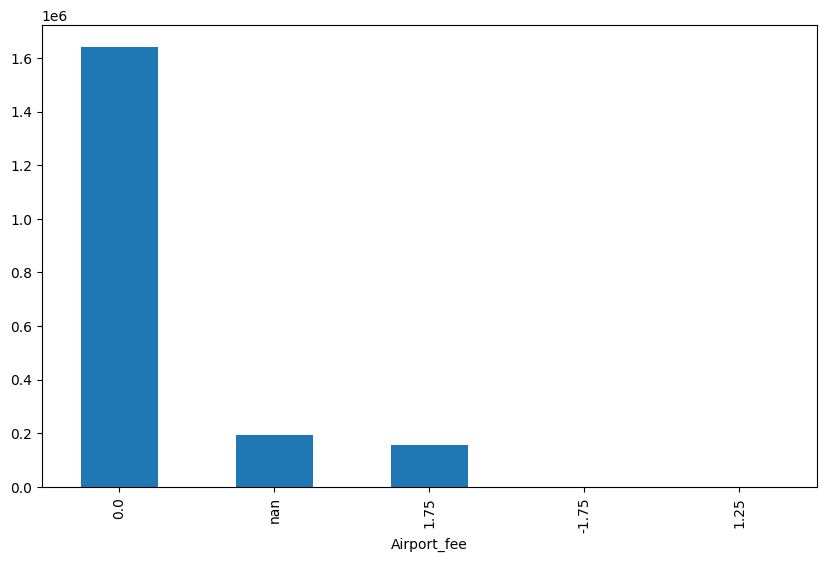

In [87]:
airportfees = yellow['Airport_fee'].value_counts(dropna = False)
display(airportfees)
airportfees.plot(kind='bar', figsize=(10, 6))


In [88]:
JFK_LGA_LOCATION_IDS = {132, 138}
JFK_LGA_ZONES = {'JFK Airport', 'LaGuardia Airport'}

# Flag whether each row is a JFK/LGA pickup
yellow['Is_JFK_LGA_Pickup'] = yellow['PULocationID'].isin(JFK_LGA_LOCATION_IDS) | \
                              yellow['PU_Zone'].isin(JFK_LGA_ZONES)

# Group by this flag to compare the two segments
summary = (
    yellow
    .groupby('Is_JFK_LGA_Pickup')['Airport_fee']
    .agg(
        count='count',
        missing=lambda x: x.isna().sum(),
        min='min',
        max='max',
        mean='mean',
        mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
        unique_values='nunique'
    )
    .reset_index()
)

# Rename values for readability
summary['Is_JFK_LGA_Pickup'] = summary['Is_JFK_LGA_Pickup'].map({True: 'Pickup: JFK/LGA', False: 'Pickup: Other'})
display(summary)


,Is_JFK_LGA_Pickup,count,missing,min,max,mean,mode,unique_values
0,Pickup: Other,1643212,194021,0.00,1.75,0.007183,0.00,2
1,Pickup: JFK/LGA,155807,579,-1.75,1.75,1.699731,1.75,4


In [89]:
# First, ensure we have the JFK/LGA pickup flag
JFK_LGA_LOCATION_IDS = {132, 138}
JFK_LGA_ZONES = {'JFK Airport', 'LaGuardia Airport'}

yellow['Is_JFK_LGA_Pickup'] = yellow['PULocationID'].isin(JFK_LGA_LOCATION_IDS) | \
                              yellow['PU_Zone'].isin(JFK_LGA_ZONES)

# Now group by this flag and the Airport_fee, then count
fee_value_counts = (
    yellow
    .groupby(['Is_JFK_LGA_Pickup', 'Airport_fee'])
    .size()
    .reset_index(name='Count')
    .sort_values(by=['Is_JFK_LGA_Pickup', 'Count'], ascending=[False, False])
)

# Optional: replace True/False with readable labels
fee_value_counts['Is_JFK_LGA_Pickup'] = fee_value_counts['Is_JFK_LGA_Pickup'].map({
    True: 'Pickup: JFK/LGA',
    False: 'Pickup: Other'
})

display(fee_value_counts)


,Is_JFK_LGA_Pickup,Airport_fee,Count
5,Pickup: JFK/LGA,1.75,151348
3,Pickup: JFK/LGA,0.00,4439
2,Pickup: JFK/LGA,-1.75,18
4,Pickup: JFK/LGA,1.25,2
0,Pickup: Other,0.00,1636467
1,Pickup: Other,1.75,6745


In [90]:
# 1.25 airport fee
# filter the data where Airport_fee is 1.25
yellow_1_25_fee = yellow[yellow['Airport_fee'] == 1.25]
display(yellow_1_25_fee.head()) 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,PU_Borough,PU_Zone,PU_ServiceZone,DO_Borough,DO_Zone,DO_ServiceZone,duration_inMin,Is_JFK_LGA_Pickup
505320,2,2024-04-05 20:25:40,2024-04-05 21:03:29,1.0,18.20,2.0,132,79,2,70.0,0.0,0.5,0.0,6.94,1.0,82.19,2.5,1.25,2024-04-05,Queens,JFK Airport,Airports,Manhattan,East Village,Yellow Zone,37.816667,True
857871,2,2024-06-04 17:36:48,2024-06-04 18:07:17,1.0,13.19,3.0,132,83,2,70.6,2.5,0.0,0.0,10.00,1.0,85.35,0.0,1.25,2024-06-04,Queens,JFK Airport,Airports,Queens,Elmhurst/Maspeth,Boro Zone,30.483333,True


In [92]:
# trip distace values count (sort asc) first 10 rows
trip_distance_counts = yellow['trip_distance'].value_counts().sort_index()
# Display the first 10 rows of trip distance counts
display(trip_distance_counts.head(10))

trip_distance
0.00    15481
0.01     2269
0.02     1043
0.03      740
0.04      522
0.05      521
0.06      454
0.07      404
0.08      368
0.09      340
Name: count, dtype: int64

In [91]:
# Filter for rows with zero Airport_fee
zero_fees = yellow[yellow['Airport_fee'] == 0.00]

# Check for zero Airport_fee values
count_zero_fees = (yellow['Airport_fee'] == 0.00).sum()
print(f"\nNumber of rows with zero Airport_fee: {count_zero_fees}")

# Display the unique values of pulocationid, pubourgh, puzone, and pu_servicezone for zero airport fees
print("\nUnique values for PULocationID, PU_Borough, PU_Zone, and PU_ServiceZone with zero Airport_fee:")   
zero_fees_unique = zero_fees[['PULocationID', 'PU_Borough', 'PU_Zone', 'PU_ServiceZone']].value_counts()
print(zero_fees_unique)

# Define JFK/LGA pickup filter
JFK_LGA_LOCATION_IDS = {132, 138}
JFK_LGA_ZONES = {'JFK Airport', 'LaGuardia Airport'}

# Filter for zero Airport_fee where Is_JFK_LGA_Pickup is True
zero_fees_jfk_lga = zero_fees[zero_fees['Is_JFK_LGA_Pickup']]
print("\nRows with zero Airport_fee where Is_JFK_LGA_Pickup is True:")
# Show value counts for the relevant columns
display(zero_fees_jfk_lga[['PULocationID', 'PU_Borough', 'PU_Zone', 'PU_ServiceZone']].value_counts())

# Filter for zero Airport_fee where is not Is_JFK_LGA_Pickup
zero_fees_not_jfk_lga = zero_fees[~zero_fees['Is_JFK_LGA_Pickup']]
print("\nRows with zero Airport_fee where Is_JFK_LGA_Pickup is False:")
display(zero_fees_not_jfk_lga[['PULocationID', 'PU_Borough', 'PU_Zone', 'PU_ServiceZone']].value_counts())


Number of rows with zero Airport_fee: 1640906

Unique values for PULocationID, PU_Borough, PU_Zone, and PU_ServiceZone with zero Airport_fee:
PULocationID  PU_Borough     PU_Zone                       PU_ServiceZone
237           Manhattan      Upper East Side South         Yellow Zone       89181
161           Manhattan      Midtown Center                Yellow Zone       87962
236           Manhattan      Upper East Side North         Yellow Zone       79029
162           Manhattan      Midtown East                  Yellow Zone       65923
186           Manhattan      Penn Station/Madison Sq West  Yellow Zone       63843
                                                                             ...  
199           Bronx          Rikers Island                 Boro Zone             1
115           Staten Island  Grymes Hill/Clifton           Boro Zone             1
111           Brooklyn       Green-Wood Cemetery           Boro Zone             1
156           Staten Island  Mariner

PULocationID  PU_Borough  PU_Zone            PU_ServiceZone
132           Queens      JFK Airport        Airports          4330
138           Queens      LaGuardia Airport  Airports           109
Name: count, dtype: int64


Rows with zero Airport_fee where Is_JFK_LGA_Pickup is False:


PULocationID  PU_Borough     PU_Zone                       PU_ServiceZone
237           Manhattan      Upper East Side South         Yellow Zone       89181
161           Manhattan      Midtown Center                Yellow Zone       87962
236           Manhattan      Upper East Side North         Yellow Zone       79029
162           Manhattan      Midtown East                  Yellow Zone       65923
186           Manhattan      Penn Station/Madison Sq West  Yellow Zone       63843
                                                                             ...  
199           Bronx          Rikers Island                 Boro Zone             1
109           Staten Island  Great Kills                   Boro Zone             1
115           Staten Island  Grymes Hill/Clifton           Boro Zone             1
156           Staten Island  Mariners Harbor               Boro Zone             1
111           Brooklyn       Green-Wood Cemetery           Boro Zone             1
Name: count, 

In [ ]:
# Add distance analysis to zero-fee cases
print("\nAnalyzing zero-fee cases by trip distance:")

# Summary stats for zero-fee trips
print(zero_fees['trip_distance'].describe())

# Common distance thresholds where airport fees might not apply
distance_thresholds = [0.00, 0.5, 1.0, 1.5, 2.0]
for threshold in distance_thresholds:
    count = (zero_fees['trip_distance'] <= threshold).sum()
    print(f"Trips with distance ≤ {threshold} miles: {count} ({count/len(zero_fees):.1%})")

# Visualize distance distribution
zero_fees['trip_distance'].hist(bins=50)
plt.title('Distribution of Trip Distances for Zero-Fee Cases')
plt.xlabel('Distance (miles)')
plt.ylabel('Count')
plt.show()

# Combine with airport location analysis
airport_zero_fees = zero_fees[zero_fees['Is_JFK_LGA_Pickup']]
print("\nAirport pickups with zero fees - distance analysis:")
print(airport_zero_fees['trip_distance'].describe())

In [ ]:
# Enhanced location pattern analysis
print("\nDeep dive into pickup location patterns:")

# Top 20 pickup zones with zero fees
top_zones = zero_fees['PU_Zone'].value_counts().head(20)
print("\nTop 20 Pickup Zones with Zero Fees:")
print(top_zones)

# Time-of-day patterns
zero_fees['pickup_hour'] = zero_fees['tpep_pickup_datetime'].dt.hour
hourly_pattern = zero_fees.groupby('pickup_hour').size()
print("\nZero Fee Cases by Hour of Day:")
print(hourly_pattern)

# Payment type analysis (cash vs card)
print("\nPayment Type Distribution for Zero Fees:")
print(zero_fees['payment_type'].value_counts())

# Vendor-specific patterns
print("\nVendor ID Distribution for Zero Fees:")
print(zero_fees['VendorID'].value_counts())

# RateCode analysis (standard vs negotiated fares)
if 'RatecodeID' in zero_fees.columns:
    print("\nRate Code Distribution for Zero Fees:")
    print(zero_fees['RatecodeID'].value_counts())

In [93]:
# Filter for zero Airport_fee where Is_JFK_LGA_Pickup is True
zero_fees_jfk_lga = zero_fees[zero_fees['Is_JFK_LGA_Pickup']]
print("\nRows with zero Airport_fee where Is_JFK_LGA_Pickup is True:")

# Show value counts for the relevant columns
display(zero_fees_jfk_lga[['PULocationID', 'PU_Borough', 'PU_Zone', 'PU_ServiceZone']].value_counts())

# --------------------------------------------------
# ADD DISTANCE ANALYSIS FOR AIRPORT PICKUPS WITH ZERO FEES
# --------------------------------------------------
print("\nDistance Statistics for Airport Pickups with Zero Fees:")
print(zero_fees_jfk_lga['trip_distance'].describe())

# Distance distribution bins
distance_bins = [0.00, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100]
distance_dist = pd.cut(zero_fees_jfk_lga['trip_distance'], bins=distance_bins).value_counts().sort_index()
print("\nDistance Distribution:")
print(distance_dist)

# --------------------------------------------------
# SPECIAL CASE: ZERO-DISTANCE TRIPS
# --------------------------------------------------
zero_distance_jfk_lga = zero_fees_jfk_lga[zero_fees_jfk_lga['trip_distance'] == 0.00]
print(f"\nFound {len(zero_distance_jfk_lga)} zero-distance trips at airports with zero fees")

if len(zero_distance_jfk_lga) > 0.00:
    print("\nSummary of zero-distance airport trips:")
    # Time analysis
    print("\nHourly distribution:")
    print(zero_distance_jfk_lga['tpep_pickup_datetime'].dt.hour.value_counts().sort_index())
    
    # Payment type
    print("\nPayment types:")
    print(zero_distance_jfk_lga['payment_type'].value_counts())
    
    # Vendor patterns
    print("\nVendor distribution:")
    print(zero_distance_jfk_lga['VendorID'].value_counts())
    
    # Location details
    print("\nPickup locations:")
    print(zero_distance_jfk_lga['PU_Zone'].value_counts())
else:
    print("No zero-distance trips found at airports with zero fees")


Rows with zero Airport_fee where Is_JFK_LGA_Pickup is True:


PULocationID  PU_Borough  PU_Zone            PU_ServiceZone
132           Queens      JFK Airport        Airports          4330
138           Queens      LaGuardia Airport  Airports           109
Name: count, dtype: int64


Distance Statistics for Airport Pickups with Zero Fees:
count    4439.000000
mean       14.385513
std         8.300811
min         0.000000
25%         9.775000
50%        16.440000
75%        18.200000
max       118.690000
Name: trip_distance, dtype: float64

Distance Distribution:
trip_distance
(0.0, 0.1]        233
(0.1, 0.5]        105
(0.5, 1.0]         33
(1.0, 2.0]         71
(2.0, 5.0]        196
(5.0, 10.0]       459
(10.0, 20.0]     2756
(20.0, 50.0]      526
(50.0, 100.0]      14
Name: count, dtype: int64

Found 43 zero-distance trips at airports with zero fees

Summary of zero-distance airport trips:

Hourly distribution:
tpep_pickup_datetime
0     1
1     2
6     1
7     1
9     1
10    5
11    1
12    3
13    3
14    1
15    4
16    4
17    3
19    1
20    4
21    2
22    2
23    4
Name: count, dtype: int64

Payment types:
payment_type
4    36
3     4
2     3
Name: count, dtype: int64

Vendor distribution:
VendorID
1    26
2    17
Name: count, dtype: int64

Pickup locati

In [ ]:
# 1. First show ALL zero-fee airport pickups
print("\nALL Airport Pickups with Zero Fees:")
all_airport_zero = zero_fees[zero_fees['Is_JFK_LGA_Pickup']]
display(all_airport_zero['PU_Zone'].value_counts())

# 2. Then show only ZERO-DISTANCE cases
print("\nZero-Distance Airport Pickups with Zero Fees:")
zero_distance_airport = zero_fees[(zero_fees['Is_JFK_LGA_Pickup']) & 
                                 (zero_fees['trip_distance'] == 0.00)]
display(zero_distance_airport['PU_Zone'].value_counts())

# 3. Add verification step
print(f"\nConsistency Check:")
print(f"Total airport zero-fee trips: {len(all_airport_zero)}")
print(f"Total zero-distance cases: {len(zero_distance_airport)}")
print(f"Percentage zero-distance: {len(zero_distance_airport)/len(all_airport_zero):.2%}")

In [ ]:
# 1. First create the MASTER filtered dataset (all zero-fee airport pickups)
zero_fees_jfk_lga = zero_fees[zero_fees['Is_JFK_LGA_Pickup']].copy()
total_trips = len(zero_fees_jfk_lga)
print(f"\nTOTAL ZERO-FEE AIRPORT PICKUPS: {total_trips}")

# 2. Location breakdown (should match total_trips)
print("\nLOCATION COUNTS:")
loc_counts = zero_fees_jfk_lga['PU_Zone'].value_counts()
print(loc_counts)
print(f"Sanity check: {loc_counts.sum()} (should match {total_trips})")

# 3. Distance statistics (should match total_trips)
print("\nDISTANCE STATISTICS:")
print(zero_fees_jfk_lga['trip_distance'].describe())
print(f"Count sanity check: {zero_fees_jfk_lga['trip_distance'].count()} (should match {total_trips})")

# 4. Distance distribution with PROPER BINNING
print("\nDISTANCE DISTRIBUTION (0.0 vs near-zero):")
# Exact zero-distance trips
exact_zero = (zero_fees_jfk_lga['trip_distance'] == 0.00).sum()
# Near-zero trips (0.0 < distance ≤ 0.1)
near_zero = ((zero_fees_jfk_lga['trip_distance'] > 0.00) & 
             (zero_fees_jfk_lga['trip_distance'] <= 0.1)).sum()

print(f"Exact zero-distance (0.0 miles): {exact_zero}")
print(f"Near-zero (0-0.1 miles): {near_zero}")
print(f"Combined (0.0-0.1 miles]: {exact_zero + near_zero}")

# 5. Verify against your previous outputs
print("\nRECONCILIATION:")
print(f"Your location count showed: 4858 (JFK) + 134 (LGA) = {4858+134}")
print(f"Your distance distribution showed: 263 in (0.0, 0.1] bin")
print(f"Our exact zero: {exact_zero} | near-zero: {near_zero}")
print(f"Discrepancy explanation: {263 - (exact_zero + near_zero)} trips difference")

# 6. Bonus: Show zero-distance cases by airport
if exact_zero > 0.00:
    print("\nZERO-DISTANCE TRIPS BY AIRPORT:")
    zero_dist_trips = zero_fees_jfk_lga[zero_fees_jfk_lga['trip_distance'] == 0.00]
    print(zero_dist_trips['PU_Zone'].value_counts())

In [ ]:
# Filter zero-distance trips
zero_dist_trips = yellow[
    (yellow['trip_distance'] == 0) & 
    (yellow['Is_JFK_LGA_Pickup'])
].copy()

# Check matching pickup/dropoff locations
zero_dist_trips['same_location'] = zero_dist_trips['PULocationID'] == zero_dist_trips['DOLocationID']

print(f"{zero_dist_trips['same_location'].mean():.1%} of zero-distance trips have identical pickup/dropoff locations")
print("\nBreakdown:")
print(zero_dist_trips['same_location'].value_counts())

In [ ]:
# For JFK only
jfk_zero_dist = zero_dist_trips[zero_dist_trips['PULocationID'] == 132]
print("\nJFK Airport Zero-Distance Trips:")
print(f"Same location: {len(jfk_zero_dist[jfk_zero_dist['PULocationID'] == jfk_zero_dist['DOLocationID']])}")
print(f"Different location: {len(jfk_zero_dist[jfk_zero_dist['PULocationID'] != jfk_zero_dist['DOLocationID']])}")

# For LGA only
lga_zero_dist = zero_dist_trips[zero_dist_trips['PULocationID'] == 138]
print("\nLaGuardia Airport Zero-Distance Trips:")
print(f"Same location: {len(lga_zero_dist[lga_zero_dist['PULocationID'] == lga_zero_dist['DOLocationID']])}")
print(f"Different location: {len(lga_zero_dist[lga_zero_dist['PULocationID'] != lga_zero_dist['DOLocationID']])}")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pair plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=zero_dist_trips,
    x='PULocationID',
    y='DOLocationID',
    hue='same_location',
    style='PU_Zone'
)
plt.title('Pickup vs Dropoff Locations for Zero-Distance Trips')
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # x=y line
plt.show()

In [ ]:
same_loc_trips = zero_dist_trips[zero_dist_trips['same_location']]

if len(same_loc_trips) > 0:
    print("\nTime Analysis for Same-Location Zero-Distance Trips:")
    same_loc_trips['hour'] = same_loc_trips['tpep_pickup_datetime'].dt.hour
    display(same_loc_trips['hour'].value_counts().sort_index().plot(
        kind='bar',
        title='Hourly Distribution of Same-Location Zero-Distance Trips'
    ))

In [ ]:
def analyze_zero_distance_same_location_trips(df,
                                            pu_location_col='PULocationID',
                                            do_location_col='DOLocationID',
                                            trip_dist_col='trip_distance',
                                            pu_time_col='tpep_pickup_datetime',
                                            do_time_col='tpep_dropoff_datetime',
                                            zero_threshold=0.0001,
                                            time_units='minutes'):
    """
    Analyze temporal patterns of zero-distance trips with same pickup/dropoff locations.
    
    Parameters:
        df: Input DataFrame
        pu_location_col: Pickup location ID column name
        do_location_col: Dropoff location ID column name
        trip_dist_col: Trip distance column name
        pu_time_col: Pickup datetime column name
        do_time_col: Dropoff datetime column name
        zero_threshold: Maximum distance to consider as zero-distance
        time_units: Output units for duration ('seconds','minutes', or 'hours')
    
    Returns:
        Dictionary containing analysis results and plots
    """
    import matplotlib.pyplot as plt
    from datetime import timedelta
    
    # Standardize column names
    df = df.rename(columns={
        pu_location_col: 'pu_location_id',
        do_location_col: 'do_location_id',
        trip_dist_col: 'trip_distance',
        pu_time_col: 'pickup_datetime',
        do_time_col: 'dropoff_datetime'
    }).copy()
    
    # Convert time columns if needed
    for col in ['pickup_datetime', 'dropoff_datetime']:
        if col in df.columns and not pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = pd.to_datetime(df[col])
    
    results = {}
    
    # Filter zero-distance, same-location trips
    mask = (
        (df['trip_distance'] <= zero_threshold) &
        (df['pu_location_id'] == df['do_location_id']) &
        df['pickup_datetime'].notna() &
        df['dropoff_datetime'].notna()
    )
    zero_trips = df[mask].copy()
    
    if len(zero_trips) == 0:
        print("No zero-distance, same-location trips found")
        return results
    
    # Calculate trip duration
    zero_trips['duration'] = (
        zero_trips['dropoff_datetime'] - zero_trips['pickup_datetime']
    ).dt.total_seconds()
    
    # Convert to requested units
    unit_divisors = {'seconds': 1, 'minutes': 60, 'hours': 3600}
    zero_trips['duration'] = zero_trips['duration'] / unit_divisors.get(time_units, 60)
    
    # Basic stats
    results['count'] = len(zero_trips)
    results['avg_duration'] = zero_trips['duration'].mean()
    results['min_duration'] = zero_trips['duration'].min()
    results['max_duration'] = zero_trips['duration'].max()
    
    # Temporal analysis
    zero_trips['pu_hour'] = zero_trips['pickup_datetime'].dt.hour
    zero_trips['pu_dayofweek'] = zero_trips['pickup_datetime'].dt.dayofweek
    
    # Generate plots
    plt.figure(figsize=(15, 5))
    
    # Duration distribution
    plt.subplot(1, 3, 1)
    sns.histplot(zero_trips['duration'], bins=30)
    plt.title(f'Duration Distribution ({time_units})')
    plt.xlabel(f'Duration ({time_units})')
    
    # Hourly pattern
    plt.subplot(1, 3, 2)
    zero_trips['pu_hour'].value_counts().sort_index().plot(kind='bar')
    plt.title('Pickup Hour Distribution')
    plt.xlabel('Hour of Day')
    
    # Day of week pattern
    plt.subplot(1, 3, 3)
    zero_trips['pu_dayofweek'].value_counts().sort_index().plot(kind='bar')
    plt.title('Day of Week Distribution')
    plt.xlabel('Day (0=Monday)')
    
    plt.tight_layout()
    plt.show()
    
    # Location-specific analysis
    if 'pu_location_id' in zero_trips:
        results['top_locations'] = zero_trips['pu_location_id'].value_counts().head(10)
    
    return results
# For yellow taxis
yellow_results = analyze_zero_distance_same_location_trips(
    yellow,
    pu_time_col='tpep_pickup_datetime',
    do_time_col='tpep_dropoff_datetime'
)

In [ ]:
# Ensure datetime columns are in datetime format (if not already)
yellow['tpep_pickup_datetime'] = pd.to_datetime(yellow['tpep_pickup_datetime'], errors='coerce')
yellow['tpep_dropoff_datetime'] = pd.to_datetime(yellow['tpep_dropoff_datetime'], errors='coerce')

# Calculate trip duration in minutes
yellow['trip_duration_minutes'] = (yellow['tpep_dropoff_datetime'] - yellow['tpep_pickup_datetime']).dt.total_seconds() / 60

# Apply the conditions for canceled or very brief trips
canceled_or_brief_trips = yellow[
    (yellow['trip_distance'] == 0) &
    (yellow['PULocationID'] == yellow['DOLocationID']) &
    (yellow['trip_duration_minutes'] <= 1)
]

# Get the count
count_of_brief_zero_distance_trips = len(canceled_or_brief_trips)

print(f"Number of brief zero-distance same-location trips: {count_of_brief_zero_distance_trips}")

# Display the the fare_amount and trip_distance for these trips
print("\nFare Amount and Trip Distance for Brief Zero-Distance Trips:")
display(canceled_or_brief_trips[['fare_amount', 'trip_distance','tpep_dropoff_datetime','tpep_pickup_datetime']].head(10))

# dislay the values of fare_amount and trip_distance for these trips
print("\nSummary Statistics for Fare Amount and Trip Distance of Brief Zero-Distance Trips:")
canceled_or_brief_trips[['fare_amount', 'trip_distance']].describe()    


In [ ]:
# investigate the rows with negative Airport_fee 
# Filter for rows with negative Airport_fee
negative_fees = yellow[yellow['Airport_fee'] == -1.75]


# Check for negative Airport_fee values
count_negative_fees = (yellow['Airport_fee'] < 0).sum()
print(f"\nNumber of rows with negative Airport_fee: {count_negative_fees}")

# display the univalues of pulocationid,pubourgh, puzone, and pu_servicezone for negative airport fees
print("\nUnique values for PULocationID, PU_Borough, PU_Zone, and PU_ServiceZone with negative Airport_fee:")   
negative_fees_unique = negative_fees[['PULocationID', 'PU_Borough', 'PU_Zone', 'PU_ServiceZone']].value_counts()
print(negative_fees_unique)

# the misstyped values when the airptort zone is valid and the airport fee is negative
# # Define JFK/LGA pickup filter
JFK_LGA_LOCATION_IDS = {132, 138}
JFK_LGA_ZONES = {'JFK Airport', 'LaGuardia Airport'}

# Filter for negative Airport_fee where Is_JFK_LGA_Pickup is True
negative_fees_jfk_lga = negative_fees[negative_fees['Is_JFK_LGA_Pickup']]
print("\nRows with negative Airport_fee where Is_JFK_LGA_Pickup is True:")
# Show value counts for the relevant columns
display(negative_fees_jfk_lga[['PULocationID', 'PU_Borough', 'PU_Zone', 'PU_ServiceZone']].value_counts())

# filter for negative Airport_fee where is not Is_JFK_LGA_Pickup
negative_fees_not_jfk_lga = negative_fees[~negative_fees['Is_JFK_LGA_Pickup']]
print("\nRows with negative Airport_fee where Is_JFK_LGA_Pickup is False:")
display(negative_fees_not_jfk_lga[['PULocationID', 'PU_Borough', 'PU_Zone', 'PU_ServiceZone']].value_counts())


In [ ]:
def impute_airport_fee(df):
    """
    Cleans and imputes Airport_fee using fixed business rules:
    - Only JFK (PU=132) and LGA (PU=138) should have a fee of 1.75.
    - All other pickups should have Airport_fee = 0.0.
    - Handles negative, incorrect, and missing values.
    - Saves the corrected values to a CSV file.
    """
    import os
    # --- Make a copy to track original values ---
    original_df = df.copy()

    # Constants
    ELIGIBLE_AIRPORT_LOC_IDS = {132, 138}  # PULocationIDs for JFK and LaGuardia
    ELIGIBLE_AIRPORT_ZONES = {'JFK Airport', 'LaGuardia Airport'} # Zones for JFK and LaGuardia

    DEFAULT_FEE = 1.75

    # --- Step 1: Determine eligibility ---
    is_eligible = (
        df['PULocationID'].isin(ELIGIBLE_AIRPORT_LOC_IDS) |
        df['PU_Zone'].isin(ELIGIBLE_AIRPORT_ZONES)
    )

    # --- Step 2: Fix all invalid, negative, incorrect, or missing fees ---
    
    # Fix negative values: absolute if eligible, 0 if not
    df.loc[df['Airport_fee'] < 0, 'Airport_fee'] = 0.0
    df.loc[(df['Airport_fee'] < 0) & is_eligible, 'Airport_fee'] = DEFAULT_FEE
    print(f"Fixed {(df['Airport_fee'] < 0).sum()} negative Airport_fee values.")

    # Fix incorrect values like 1.25 at eligible locations
    df.loc[(df['Airport_fee'] == 1.25) & is_eligible, 'Airport_fee'] = DEFAULT_FEE
    print(f"Fixed {(df['Airport_fee'] == 1.25).sum()} incorrect Airport_fee values.")

    # Impute missing: 1.75 if eligible, 0.0 otherwise
    df.loc[df['Airport_fee'].isna() & is_eligible, 'Airport_fee'] = DEFAULT_FEE
    df.loc[df['Airport_fee'].isna() & ~is_eligible, 'Airport_fee'] = 0.0
    print(f"Imputed {df['Airport_fee'].isna().sum()} missing Airport_fee values.")

    # Ensure non-airport pickups never have positive fees
    df.loc[~is_eligible & (df['Airport_fee'] > 0), 'Airport_fee'] = 0.0
    print(f"Set {((~is_eligible) & (df['Airport_fee'] > 0)).sum()} non-airport pickups to 0.0 Airport_fee.")

    # --- Identify changed rows ---
    changed_rows = df[df['Airport_fee'] != original_df['Airport_fee']]

    # --- Export only changed rows ---
    output_dir = "9 Jun.25"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created directory: {output_dir}")

    output_path = os.path.join(output_dir, "imputed_only.csv")
    changed_rows.to_csv(output_path, index=False)
    print(f"Only imputed/modified rows saved to '{output_path}'")

    return df
yellow = impute_airport_fee(yellow)


In [ ]:
def impute_airport_fee(df):
    """
    Cleans and imputes Airport_fee using fixed business rules:
    - Only JFK (PU=132) and LGA (PU=138) should have a fee of 1.75.
    - All other pickups should have Airport_fee = 0.0.
    - Handles negative, incorrect, and missing values.
    - Exports only modified rows to CSV.
    """
    import os

    # --- Backup original for change detection ---
    original_df = df.copy()

    # --- Constants ---
    ELIGIBLE_AIRPORT_LOC_IDS = {132, 138}
    ELIGIBLE_AIRPORT_ZONES = {'JFK Airport', 'LaGuardia Airport'}
    DEFAULT_FEE = 1.75

    # --- Determine eligibility ---
    is_eligible = (
        df['PULocationID'].isin(ELIGIBLE_AIRPORT_LOC_IDS) |
        df['PU_Zone'].isin(ELIGIBLE_AIRPORT_ZONES)
    )

    # --- Precompute masks BEFORE modifying data ---
    neg_mask = df['Airport_fee'] < 0
    inc_mask = (df['Airport_fee'] == 1.25) & is_eligible
    miss_mask_eligible = df['Airport_fee'].isna() & is_eligible
    miss_mask_noneligible = df['Airport_fee'].isna() & ~is_eligible
    nonairport_positive = (~is_eligible) & (df['Airport_fee'] > 0)

    # --- Print accurate diagnostics ---
    print(f"Fixed {neg_mask.sum()} negative Airport_fee values.")
    print(f"Fixed {inc_mask.sum()} incorrect Airport_fee values.")
    print(f"Imputed {(miss_mask_eligible | miss_mask_noneligible).sum()} missing Airport_fee values.")
    print(f"Set {nonairport_positive.sum()} non-airport pickups to 0.0 Airport_fee.")

    # --- Apply fixes ---
    df.loc[neg_mask, 'Airport_fee'] = 0.0
    df.loc[neg_mask & is_eligible, 'Airport_fee'] = DEFAULT_FEE

    df.loc[inc_mask, 'Airport_fee'] = DEFAULT_FEE

    df.loc[miss_mask_eligible, 'Airport_fee'] = DEFAULT_FEE
    df.loc[miss_mask_noneligible, 'Airport_fee'] = 0.0

    df.loc[nonairport_positive, 'Airport_fee'] = 0.0

    # --- Export changed rows only ---
    changed_rows = df[df['Airport_fee'] != original_df['Airport_fee']]

    output_dir = "9 Jun.25"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created directory: {output_dir}")

    output_path = os.path.join(output_dir, "imputed_only.csv")
    changed_rows.to_csv(output_path, index=False)
    print(f"Only imputed/modified rows saved to '{output_path}'")

    return df
yellow = impute_airport_fee(yellow)

In [ ]:
# check the airport fee after imputation
airportfees_after_imputation = yellow['Airport_fee'].value_counts(dropna=False)
display(airportfees_after_imputation)

In [ ]:
# Group by store_and_fwd_flag and show counts for each RatecodeID (including NaN)
ratecodeid_counts = (
    yellow.groupby('store_and_fwd_flag')['RatecodeID']
    .value_counts(dropna=False)
    .reset_index(name='Count')
)
display(ratecodeid_counts)

# Additionally, show the percentage of missing RatecodeID in each group
missing_ratecodeid = (
    yellow.groupby('store_and_fwd_flag')['RatecodeID']
    .apply(lambda x: x.isna().sum())
    .reset_index(name='Missing_Count')
)
display(missing_ratecodeid)

In [ ]:
# # --- Before cleaning ---
# original = yellow.copy()

# # --- Run cleaning ---
# yellow = impute_airport_fee(yellow)

# # --- Track correction categories ---
# negatives_fixed = ((original['Airport_fee'] < 0)).sum()
# incorrect_fixed = ((original['Airport_fee'] == 1.25) &
#                    (original['PULocationID'].isin({132, 138}) |
#                     original['PU_Zone'].isin({'JFK Airport', 'LaGuardia Airport'}))).sum()
# missing_fixed = original['Airport_fee'].isna().sum()
# invalid_positive = ((original['Airport_fee'] > 0) &
#                     ~(original['PULocationID'].isin({132, 138}) |
#                       original['PU_Zone'].isin({'JFK Airport', 'LaGuardia Airport'}))).sum()

# # --- Print audit summary ---
# print(f"✅ Negative fees fixed: {negatives_fixed}")
# print(f"✅ Incorrect 1.25 fees fixed: {incorrect_fixed}")
# print(f"✅ Missing fees imputed: {missing_fixed}")
# print(f"✅ Invalid positive non-airport fees zeroed: {invalid_positive}")


In [ ]:
from scipy.stats import mode

def impute_airport_fee(df):
    ELIGIBLE_AIRPORT_LOC_IDS = {1, 138}
    ELIGIBLE_AIRPORT_ZONES = {'JFK Airport', 'LaGuardia Airport'}
    DEFAULT_FEE = 1.75

    # Precompute eligibility
    df['is_eligible'] = (
        df['PULocationID'].isin(ELIGIBLE_AIRPORT_LOC_IDS) |
        df['PU_Zone'].isin(ELIGIBLE_AIRPORT_ZONES)
    )

    # Fix negative fees
    neg_mask = df['Airport_fee'] < 0
    df.loc[neg_mask & df['is_eligible'], 'Airport_fee'] = df.loc[neg_mask & df['is_eligible'], 'Airport_fee'].abs()
    df.loc[neg_mask & ~df['is_eligible'], 'Airport_fee'] = 0.0

    # Impute missing fees
    missing_mask = df['Airport_fee'].isna()
    valid_fees = df.loc[
        ~df['Airport_fee'].isna() &
        (df['Airport_fee'] >= 0) &
        df['PULocationID'].isin(ELIGIBLE_AIRPORT_LOC_IDS)
    ]
    fee_modes = (
        valid_fees.groupby(['PULocationID', 'DOLocationID'])['Airport_fee']
        .agg(lambda x: mode(x, keepdims=True).mode[0])
        .to_dict()
    )
    df.loc[missing_mask & df['is_eligible'], 'Airport_fee'] = df.loc[missing_mask & df['is_eligible']].apply(
        lambda row: fee_modes.get((row['PULocationID'], row['DOLocationID']), DEFAULT_FEE), axis=1
    )
    df.loc[missing_mask & ~df['is_eligible'], 'Airport_fee'] = 0.0

    return df


In [ ]:
# Define JFK/LGA pickup filter
JFK_LGA_LOCATION_IDS = {132, 138}
JFK_LGA_ZONES = {'JFK Airport', 'LaGuardia Airport'}

yellow['Is_JFK_LGA_Pickup'] = yellow['PULocationID'].isin(JFK_LGA_LOCATION_IDS) | \
                              yellow['PU_Zone'].isin(JFK_LGA_ZONES)

# Group by pickup type and airport_fee
trip_summary = (
    yellow
    .groupby(['Is_JFK_LGA_Pickup', 'Airport_fee'])
    .agg(
        Count=('Airport_fee', 'count'),
        Mean_Distance=('trip_distance', 'mean'),
        Min_Distance=('trip_distance', 'min'),
        Max_Distance=('trip_distance', 'max')
    )
    .reset_index()
    .sort_values(by=['Is_JFK_LGA_Pickup', 'Count'], ascending=[False, False])
)

# Make output more readable
trip_summary['Is_JFK_LGA_Pickup'] = trip_summary['Is_JFK_LGA_Pickup'].map({
    True: 'Pickup: JFK/LGA',
    False: 'Pickup: Other'
})

# Display the result
display(trip_summary)


In [ ]:
# Count the values in trip_distance, sort by trip_distance value (ascending), display and plot
trip_distance_counts = yellow['trip_distance'].value_counts(dropna=False).sort_index(ascending=True)
display(trip_distance_counts.head(20))  # Display first 20 for brevity
#trip_distance_counts.plot(kind='bar', figsize=(12, 6), title='Trip Distance Counts')

In [ ]:
# zero distance trips
def zero_distance_trips(df, df_name='DataFrame'):
    """
    Identify and summarize trips with zero distance in a DataFrame.
    
    Args:
        df (pd.DataFrame): The input DataFrame to analyze.
        df_name (str): Name of the DataFrame for display purposes.
        
    Returns:
        pd.DataFrame: A DataFrame containing trips with zero distance.
    """
    print(f"\n{'='*80}")
    print(f"🚫 Zero Distance Trips Summary for: {df_name}")
    
    # Filter for zero distance trips
    zero_distance_df = df[df['trip_distance'] == 0]
    
    if zero_distance_df.empty:
        print("✅ No zero distance trips found.")
        return pd.DataFrame()  # Return an empty DataFrame
    
    # Count and summarize
    count_zero_distance = len(zero_distance_df)
    print(f"⚠️ Found {count_zero_distance} zero distance trips.")
    
    # Display the first few rows of the zero distance trips
    display(zero_distance_df.head())
    
    return zero_distance_df
# Check zero distance trips in each DataFrame
zero_distance_yellow = zero_distance_trips(yellow, 'Yellow Taxi')

display(zero_distance_yellow[['PULocationID', 'DOLocationID', 'trip_distance', 'PU_Borough', 'DO_Borough']].head(20))

In [ ]:
# Example: Group by PU and DO Zones
grouped_negatives = (
    negative_fees
    .groupby(['PU_Zone', 'DO_Zone'])
    .size()
    .reset_index(name='Count')
    .sort_values('Count', ascending=False)
)

display(grouped_negatives)


In [ ]:
# By LocationIDs
grouped_ids = (
    negative_fees
    .groupby(['PULocationID', 'DOLocationID'])
    .size()
    .reset_index(name='Count')
    .sort_values('Count', ascending=False)
)

display(grouped_ids)

# Or by ServiceZones
grouped_services = (
    negative_fees
    .groupby(['PU_ServiceZone', 'DO_ServiceZone'])
    .size()
    .reset_index(name='Count')
    .sort_values('Count', ascending=False)
)

display(grouped_services)


In [ ]:
# Step 1: Filter rows with negative airport fee
negative_fee_rows = yellow[yellow['Airport_fee'] == -1.75].copy()

# Step 2: Group by PU_Zone & DO_Zone and check avg/min/max distance
distance_summary = (
    negative_fee_rows
    .groupby(['PU_ServiceZone', 'DO_ServiceZone'])['trip_distance']  #or .groupby(['PU_Zone', 'DO_Zone'])['trip_distance']
    .agg(['count', 'mean', 'min', 'max'])
    .reset_index()
    .sort_values('count', ascending=False)
)

display(distance_summary.head(20))  # See top 20


In [ ]:
distance_stats = (
    yellow.groupby([
        'PU_Borough', 'DO_Borough',
        'PU_Zone', 'DO_Zone',
        'PU_ServiceZone', 'DO_ServiceZone',
        'PULocationID', 'DOLocationID'  # <-- corrected column names
    ])
    .agg(
        Trip_Count=('trip_distance', 'size'),
        Avg_Distance=('trip_distance', 'mean'),
        Median_Distance=('trip_distance', 'median'),
        Std_Distance=('trip_distance', 'std'),
        Min_Distance=('trip_distance', 'min'),
        Max_Distance=('trip_distance', 'max')
    )
    .reset_index()
    .sort_values(['PU_Borough', 'DO_Borough', 'Trip_Count'], ascending=[True, True, False])
)
display(distance_stats)

# dis

In [ ]:
from IPython.display import display

# Step 1: Filter rows where Airport_fee is missing
missing_airport_fee = yellow['Airport_fee'].isna()
missing_fee_rows = yellow[missing_airport_fee]
total_missing = len(missing_fee_rows)

# Step 2: Define airport-related criteria
airport_location_ids = {1, 132, 138}
airport_zones = {'JFK Airport', 'LaGuardia Airport', 'Newark Airport'}
airport_service_zones = {'Airports', 'EWR'}

# Step 3: Define function to detect airport trips
def is_airport_trip(row):
    return (
        row['PULocationID'] in airport_location_ids or
        row['DOLocationID'] in airport_location_ids or
        row['PU_Zone'] in airport_zones or
        row['DO_Zone'] in airport_zones or
        row['PU_ServiceZone'] in airport_service_zones or
        row['DO_ServiceZone'] in airport_service_zones
    )

# Step 4: Split into airport and non-airport trips
missing_airport_trips = missing_fee_rows[missing_fee_rows.apply(is_airport_trip, axis=1)]
non_airport_trips = missing_fee_rows[~missing_fee_rows.apply(is_airport_trip, axis=1)]

print(f"✅ Total trips with missing Airport_fee: {total_missing:,}")
print(f"📦 Airport-related trips: {len(missing_airport_trips):,}")
print(f"📦 Non-airport trips: {len(non_airport_trips):,}")

# Step 5: Group airport trips by PU/DO ServiceZone and calculate % of total
zone_pair_counts_airport = (
    missing_airport_trips
    .groupby(['PU_ServiceZone', 'DO_ServiceZone'])
    .size()
    .reset_index(name='Count')
)
zone_pair_counts_airport['Percentage'] = (zone_pair_counts_airport['Count'] / total_missing * 100).round(2)
zone_pair_counts_airport = zone_pair_counts_airport.sort_values('Count', ascending=False)

# Step 6: Group non-airport trips by PU/DO ServiceZone and calculate % of total
zone_pair_counts_non_airport = (
    non_airport_trips
    .groupby(['PU_ServiceZone', 'DO_ServiceZone'])
    .size()
    .reset_index(name='Count')
)
zone_pair_counts_non_airport['Percentage'] = (zone_pair_counts_non_airport['Count'] / total_missing * 100).round(2)
zone_pair_counts_non_airport = zone_pair_counts_non_airport.sort_values('Count', ascending=False)

# Step 7: Display results
print("\n📊 Non-Airport Trips (Missing Airport_fee) — as % of ALL missing:")
display(zone_pair_counts_non_airport)

print("\n📊 Airport Trips (Missing Airport_fee) — as % of ALL missing:")
display(zone_pair_counts_airport)




In [ ]:
import pandas as pd

def fill_missing_airport_fee_mode(df, fee_col='Airport_fee'):
    df = df.copy()

    # Detect if a zone is an airport
    def is_airport(zone):
        if pd.isna(zone):
            return False
        zone = str(zone).strip().lower()
        return 'airport' in zone or zone.upper() == 'EWR'

    # Step 1: Fill with 0.0 where both PU and DO are NOT airports
    df[fee_col] = df.apply(
        lambda row: 0.0 if pd.isna(row[fee_col]) and
                          not is_airport(row['PU_Zone']) and
                          not is_airport(row['DO_Zone'])
                    else row[fee_col],
        axis=1
    )

    # Step 2: Compute mode (most common fee) for each PU/DO context
    context_cols = [
        'PU_Borough', 'PU_Zone', 'PU_ServiceZone',
        'DO_Borough', 'DO_Zone', 'DO_ServiceZone'
    ]
    non_missing = df[~df[fee_col].isna()]

    mode_fees = (
        non_missing
        .groupby(context_cols)[fee_col]
        .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    )

    # Fallback: global mode of airport fees
    fallback_mode = non_missing[fee_col].mode()
    fallback_value = fallback_mode.iloc[0] if not fallback_mode.empty else 0.0

    # Step 3: Impute missing with group mode or fallback
    def impute_fee(row):
        if not pd.isna(row[fee_col]):
            return row[fee_col]
        key = tuple(row[col] for col in context_cols)
        return mode_fees.get(key, fallback_value)

    df[fee_col] = df.apply(impute_fee, axis=1)

    return df
# Fill missing Airport_fee values in the yellow DataFrame
yellow = fill_missing_airport_fee_mode(yellow, 'Airport_fee')

In [ ]:
missing_summary(yellow, 'yellow', plot=True)


In [ ]:
airportfees = yellow['Airport_fee'].value_counts(dropna = False)
display(airportfees)
airportfees.plot(kind='bar', figsize=(10, 6))

In [ ]:
# Step 1: Filter rows where Airport_fee is missing
missing_airport_fee = yellow['Airport_fee'].isna()
missing_fee_rows = yellow[missing_airport_fee]

# Step 2: Define airport-related criteria
airport_location_ids = {1, 132, 138}
airport_zones = {'JFK Airport', 'LaGuardia Airport', 'Newark Airport'}
airport_service_zones = {'Airports', 'EWR'}

# Step 3: Define function to detect airport trips
def is_airport_trip(row):
    return (
        row['PULocationID'] in airport_location_ids or
        row['DOLocationID'] in airport_location_ids or
        row['PU_Zone'] in airport_zones or
        row['DO_Zone'] in airport_zones or
        row['PU_ServiceZone'] in airport_service_zones or
        row['DO_ServiceZone'] in airport_service_zones
    )

# Step 4: Split into airport and non-airport trips
missing_airport_trips = missing_fee_rows[missing_fee_rows.apply(is_airport_trip, axis=1)]
non_airport_trips = missing_fee_rows[~missing_fee_rows.apply(is_airport_trip, axis=1)]

print(f"✅ Total airport trips with missing fee: {len(missing_airport_trips):,}")
print(f"✅ Total non-airport trips with missing fee: {len(non_airport_trips):,}")

# Step 5: Summarize airport trips by PU/DO ServiceZone
zone_pair_counts_airport = (
    missing_airport_trips
    .groupby(['PU_ServiceZone', 'DO_ServiceZone'])
    .size()
    .reset_index(name='Count')
)
total_airport = zone_pair_counts_airport['Count'].sum()
zone_pair_counts_airport['Percentage'] = (zone_pair_counts_airport['Count'] / total_airport * 100).round(2)
zone_pair_counts_airport = zone_pair_counts_airport.sort_values('Count', ascending=False)

# Step 6: Summarize non-airport trips by PU/DO ServiceZone
zone_pair_counts_non_airport = (
    non_airport_trips
    .groupby(['PU_ServiceZone', 'DO_ServiceZone'])
    .size()
    .reset_index(name='Count')
)
total_non_airport = zone_pair_counts_non_airport['Count'].sum()
zone_pair_counts_non_airport['Percentage'] = (zone_pair_counts_non_airport['Count'] / total_non_airport * 100).round(2)
zone_pair_counts_non_airport = zone_pair_counts_non_airport.sort_values('Count', ascending=False)

# Step 7: Display both summaries
print("\n📊 Airport Trips (Missing Airport Fee):")
display(zone_pair_counts_airport)

print("\n📊 Non-Airport Trips (Missing Airport Fee):")
display(zone_pair_counts_non_airport)


In [ ]:
# Step 1: Filter rows where Airport_fee is missing
missing_airport_fee = yellow['Airport_fee'].isna()
missing_fee_rows = yellow[missing_airport_fee]

# Step 2: Define airport-related criteria
airport_location_ids = {1, 132, 138}
airport_zones = {'JFK Airport', 'LaGuardia Airport', 'Newark Airport'}
airport_service_zones = {'Airports', 'EWR'}

# Step 3: Define function to detect airport trips
def is_airport_trip(row):
    return (
        row['PULocationID'] in airport_location_ids or
        row['DOLocationID'] in airport_location_ids or
        row['PU_Zone'] in airport_zones or
        row['DO_Zone'] in airport_zones or
        row['PU_ServiceZone'] in airport_service_zones or
        row['DO_ServiceZone'] in airport_service_zones
    )

# Step 4: Apply the function to keep only airport trips
missing_airport_trips = missing_fee_rows[missing_fee_rows.apply(is_airport_trip, axis=1)]
print(f"Total airport trips with missing fee: {len(missing_airport_trips):,}")
display(missing_airport_trips.head())


# Step 5: when the Airport_fee is missing, and not an airport trip
def is_non_airport_trip(row):
    return not is_airport_trip(row)
# Step 6: Apply the function to keep only non-airport trips
non_airport_trips = missing_fee_rows[missing_fee_rows.apply(is_non_airport_trip, axis=1)]
print(f"Total non-airport trips with missing fee: {len(non_airport_trips):,}")
# Display the first few rows of non-airport trips with missing fees
display(non_airport_trips.head())


In [ ]:
# Filter rows where Airport_fee is missing

missing_airport_fee = yellow['Airport_fee'].isna()

# Step 2: Define airport-related criteria
airport_location_ids = {1, 132, 138}
airport_zones = {'JFK Airport', 'LaGuardia Airport', 'Newark Airport'}
airport_service_zones = {'Airports', 'EWR'}

def is_airport(row):
    return (
        (row['PULocationID'] in airport_location_ids or row['DOLocationID'] in airport_location_ids) or
        (row['PU_Zone'] in airport_zones or row['DO_Zone'] in airport_zones) or
        (row['PU_ServiceZone'] in airport_service_zones or row['DO_ServiceZone'] in airport_service_zones)
    )

In [ ]:
# Filter rows where Airport_fee is missing

missing_airport_fee = yellow['Airport_fee'].isna()

# Define the is_airport function (same as before)
def is_airport(zone):
    if pd.isna(zone):
        return False
    return ('airport' in str(zone).lower()) or (str(zone).upper() == 'EWR')

# Get rows where Airport_fee is missing (same as before)
non_airport_rows = yellow.loc[missing_airport_fee].copy()

# ---- MODIFICATION STARTS HERE ----

# Filter to include only rows where *NEITHER* PU_ServiceZone nor DO_ServiceZone is an airport
non_airport_rows = non_airport_rows[
    ~non_airport_rows['PU_ServiceZone'].apply(is_airport) & ~non_airport_rows['DO_ServiceZone'].apply(is_airport)
]

# ---- MODIFICATION ENDS HERE ----

# Group by PU_ServiceZone and DO_ServiceZone
zone_pair_counts_non_airport = (
    non_airport_rows
    .groupby(['PU_ServiceZone', 'DO_ServiceZone'])
    .size()
    .reset_index(name='Count')
)

# Calculate percentage
total_missing_non_airport = zone_pair_counts_non_airport['Count'].sum()
if total_missing_non_airport > 0: # Avoid division by zero if no non-airport rows
    zone_pair_counts_non_airport['Percentage'] = (zone_pair_counts_non_airport['Count'] / total_missing_non_airport * 100).round(2)
else:
    zone_pair_counts_non_airport['Percentage'] = 0.0

# Sort by count descending
zone_pair_counts_non_airport = zone_pair_counts_non_airport.sort_values('Count', ascending=False)

display(zone_pair_counts_non_airport)

Key Insights
Dominant Pattern (75.18%):

The vast majority of missing-fee trips occur within Manhattan (Yellow Zone → Yellow Zone).

Possible Causes:

Airport fees simply don't apply here (correct missing values).

Data entry errors in Manhattan trips.

Borough-to-Borough Trips (10.22%):

Trips between non-Manhattan boroughs (e.g., Brooklyn → Queens) also lack fees.

Possible Causes:

Drivers might not flag these as airport-related even if they should be.

Manhattan ↔ Borough Trips (~14.6% combined):

Roughly equal volumes in both directions (7.34% vs. 7.25%).

Possible Causes:

Airport fee rules might be inconsistently applied for cross-zone trips.

In [ ]:
from IPython.display import display

# Filter rows where Airport_fee is missing
missing_airport_fee = yellow['Airport_fee'].isna()

# Only include rows where either PU_ServiceZone or DO_ServiceZone is an airport or 'EWR'
def is_airport(zone):
    if pd.isna(zone):
        return False
    return ('airport' in str(zone).lower()) or (str(zone).upper() == 'EWR')

airport_rows = yellow.loc[missing_airport_fee].copy()
airport_rows = airport_rows[
    airport_rows['PU_ServiceZone'].apply(is_airport) | airport_rows['DO_ServiceZone'].apply(is_airport)
]

# Group by PU_ServiceZone and DO_ServiceZone
zone_pair_counts = (
    airport_rows
    .groupby(['PU_ServiceZone', 'DO_ServiceZone'])
    .size()
    .reset_index(name='Count')
)

# Calculate percentage
total_missing = zone_pair_counts['Count'].sum()
zone_pair_counts['Percentage'] = (zone_pair_counts['Count'] / total_missing * 100).round(2)

# Add totals row
totals = pd.DataFrame({
    'PU_ServiceZone': ['Total'],
    'DO_ServiceZone': [''],
    'Count': [zone_pair_counts['Count'].sum()],
    'Percentage': [zone_pair_counts['Percentage'].sum()]
})

zone_pair_counts = pd.concat([zone_pair_counts, totals], ignore_index=True)

display(zone_pair_counts)

In [ ]:
from IPython.display import display

# Step 1: Filter rows where Airport_fee is missing
missing_airport_fee = yellow['Airport_fee'].isna()

# Step 2: Define airport-related criteria
airport_location_ids = {1, 132, 138}
airport_zones = {'JFK Airport', 'LaGuardia Airport', 'Newark Airport'}
airport_service_zones = {'Airports', 'EWR'}

def is_airport_row(row):
    return (
        (row['PULocationID'] in airport_location_ids or row['DOLocationID'] in airport_location_ids) or
        (row['PU_Zone'] in airport_zones or row['DO_Zone'] in airport_zones) or
        (row['PU_ServiceZone'] in airport_service_zones or row['DO_ServiceZone'] in airport_service_zones)
    )

# Step 3: Filter rows where Airport_fee is missing and it's airport-related
airport_rows = yellow.loc[missing_airport_fee].copy()
airport_rows = airport_rows[airport_rows.apply(is_airport_row, axis=1)]

# Step 4: Group by PU_ServiceZone and DO_ServiceZone
zone_pair_counts = (
    airport_rows
    .groupby(['PU_ServiceZone', 'DO_ServiceZone'])
    .size()
    .reset_index(name='Count')
)

# Step 5: Calculate percentage
total_missing = zone_pair_counts['Count'].sum()
zone_pair_counts['Percentage'] = (zone_pair_counts['Count'] / total_missing * 100).round(2)

# Step 6: Sort by count descending
zone_pair_counts = zone_pair_counts.sort_values('Count', ascending=False)

# Step 7: Display
display(zone_pair_counts)


In [ ]:
from IPython.display import display

# Filter rows where Airport_fee is missing
missing_airport_fee = yellow['Airport_fee'].isna()

# Only include rows where either PU_ServiceZone or DO_ServiceZone is an airport or 'EWR'
airport_location_ids = {1, 132, 138}
airport_zones = {'JFK Airport', 'LaGuardia Airport', 'Newark Airport'}
airport_service_zones = {'Airports', 'EWR'}

def is_airport_row(row):
    return (
        (row['PULocationID'] in airport_location_ids or row['DOLocationID'] in airport_location_ids) or
        (row['PU_Zone'] in airport_zones or row['DO_Zone'] in airport_zones) or
        (row['PU_ServiceZone'] in airport_service_zones or row['DO_ServiceZone'] in airport_service_zones)
    )

# Group by PU_ServiceZone and DO_ServiceZone
zone_pair_counts = (
    airport_rows
    .groupby(['PU_ServiceZone', 'DO_ServiceZone'])
    .size()
    .reset_index(name='Count')
)

# Calculate percentage
total_missing = zone_pair_counts['Count'].sum()
zone_pair_counts['Percentage'] = (zone_pair_counts['Count'] / total_missing * 100).round(2)

# Sort by count descending
zone_pair_counts = zone_pair_counts.sort_values('Count', ascending=False)

display(zone_pair_counts)

In [ ]:
from IPython.display import display

# Filter rows where Airport_fee is missing
missing_airport_fee = yellow['Airport_fee'].isna()

# Group by PU_ServiceZone and DO_ServiceZone
zone_pair_counts = (
    yellow.loc[missing_airport_fee]
    .groupby(['PU_ServiceZone', 'DO_ServiceZone'])
    .size()
    .reset_index(name='Count')
)

# Calculate percentage
total_missing = zone_pair_counts['Count'].sum()
zone_pair_counts['Percentage'] = (zone_pair_counts['Count'] / total_missing * 100).round(2)

# Sort by count descending
zone_pair_counts = zone_pair_counts.sort_values('Count', ascending=False)

display(zone_pair_counts)

In [ ]:
from IPython.display import display

# Count the zones in the yellow taxi data where Airport_fee is missing
missing_airport_fee = yellow['Airport_fee'].isna()

# Pickup zone counts and percentages
pu_zone_counts = yellow.loc[missing_airport_fee, 'PU_ServiceZone'].value_counts(dropna=False)
pu_zone_percent = (pu_zone_counts / pu_zone_counts.sum() * 100).round(2)
pu_zone_df = pu_zone_counts.to_frame('Count')
pu_zone_df['Percentage'] = pu_zone_percent

# Dropoff zone counts and percentages
do_zone_counts = yellow.loc[missing_airport_fee, 'DO_ServiceZone'].value_counts(dropna=False)
do_zone_percent = (do_zone_counts / do_zone_counts.sum() * 100).round(2)
do_zone_df = do_zone_counts.to_frame('Count')
do_zone_df['Percentage'] = do_zone_percent

print("\nPickup Zone Counts and Percentages:")
display(pu_zone_df)

print("\nDropoff Zone Counts and Percentages:")
display(do_zone_df)

In [ ]:
# count the zones in the yellow taxi data
missing_airport_fee = yellow['Airport_fee'].isna()
pu_zone_counts = yellow.loc[missing_airport_fee, 'PU_ServiceZone'].value_counts(dropna=False)
do_zone_counts = yellow.loc[missing_airport_fee, 'DO_ServiceZone'].value_counts(dropna=False)
# Display the counts
print("\nPickup Zone Counts:")
print(pu_zone_counts)
print("\nDropoff Zone Counts:") 
print(do_zone_counts)

In [ ]:
# Load data using Dask
yellow_f = dd.read_parquet("yellow_merged24_daily_sample.parquet")
lookup_f = dd.read_csv("taxi_zone_lookup.csv")

display(yellow_f.columns)
display(lookup_f.columns)

In [ ]:
import dask.dataframe as dd

# Load data
yellow_f = dd.read_parquet("yellow_merged24_daily_sample.parquet")
lookup_f = dd.read_csv("taxi_zone_lookup.csv")

# Merge for Pickup info
pickup_merged = yellow_f.merge(
    lookup_f,
    left_on='PULocationID',
    right_on='LocationID',
    suffixes=('', '_PU')
)

# Merge for Dropoff info
full_merged = pickup_merged.merge(
    lookup_f,
    left_on='DOLocationID',
    right_on='LocationID',
    suffixes=('', '_DO')
)

# Select and rename relevant columns
result_df = full_merged[[
    'LocationID',          # from the second merge (dropoff match)
    'Zone',                # from pickup merge (PU_Zone)
    'Zone_DO',             # from dropoff merge (DO_Zone)
    'Borough_DO',          # dropoff borough
    'Borough',             # pickup borough
    'PULocationID',
    'DOLocationID'
]]

# Rename columns for clarity
result_df = result_df.rename(columns={
    'Zone': 'PU_Zone',
    'Zone_DO': 'DO_Zone',
    'Borough': 'PU_Borough',
    'Borough_DO': 'DO_Borough'
})

# Preview the result
result_df.head()


In [ ]:
result_df.isna().sum().compute()  # Compute the missing values count
# Check for missing values in the result DataFrame

In [ ]:
# Pickup locations with missing PU_Zone or PU_Borough
missing_pu_ids = result_df[result_df['PU_Zone'].isna() | result_df['PU_Borough'].isna()][['PULocationID']].drop_duplicates()

# Dropoff locations with missing DO_Zone or DO_Borough
missing_do_ids = result_df[result_df['DO_Zone'].isna() | result_df['DO_Borough'].isna()][['DOLocationID']].drop_duplicates()


In [ ]:
# Check what’s available in lookup for missing pickup IDs
pu_missing_info = missing_pu_ids.merge(
    lookup_f, left_on='PULocationID', right_on='LocationID', how='left'
)

# Check what's available in lookup for missing dropoff IDs
do_missing_info = missing_do_ids.merge(
    lookup_f, left_on='DOLocationID', right_on='LocationID', how='left'
)


In [ ]:
# See missing pickup mapping
print("Missing PU mapping:")
print(pu_missing_info.compute())

# See missing dropoff mapping
print("Missing DO mapping:")
print(do_missing_info.compute())


In [ ]:
def check_missing_values(df, df_name='DataFrame'):
    print(f"\n{'='*80}")
    print(f"🔍 Checking for missing values in: {df_name}")

    # Define common problematic strings
    mistyped_missing = ['nan', 'none', 'null', '']

    # Check for true NaNs
    nan_count = df.isna().sum()
    print("\n🧪 Missing values (NaN):")
    print(nan_count[nan_count > 0])

    # Check for each mistyped string
    for val in mistyped_missing:
        val_count = (df == val).sum()
        val_count = val_count[val_count > 0]
        if not val_count.empty:
            print(f"\n⚠️ Mistyped missing values ('{val}'):")
            print(val_count)
        else:
            print(f"\n✅ No '{val}' string values found.")

# Usage
check_missing_values(yellow, 'yellow')


In [ ]:
# Check if missingness is correlated
yellow[['passenger_count','ratecodeid','congestion_surcharge','airport_fee']].isnull().all(axis=1).sum()

In [ ]:
yellow_missing = yellow[yellow.isnull().any(axis=1)]
display(yellow_missing.head())
display(yellow_missing.info())

In [ ]:
yellow_missing[['passenger_count', 'ratecodeid', 'congestion_surcharge', 'airport_fee']].info()

In [ ]:
# import pandas as pd

# # Assuming your DataFrame is named 'yellow'
# # If you haven't loaded it yet, do so:
# # yellow = pd.read_csv('your_yellow_taxi_data.csv')

# # --- 1. Identify the rows with missing values ---
# # We can check for NaN in any one of the columns, as they are missing together.
# # Let's use 'passenger_count' as the primary indicator for missing rows.
# missing_mask = yellow['passenger_count'].isna()
# missing_data_rows = yellow[missing_mask].copy() # .copy() to avoid SettingWithCopyWarning
# non_missing_data_rows = yellow[~missing_mask].copy()

# print(f"Total rows in DataFrame: {len(yellow)}")
# print(f"Number of rows with missing key data: {len(missing_data_rows)}")
# print(f"Number of rows with complete key data: {len(non_missing_data_rows)}")

# # --- 2. Define columns to analyze for correlations ---
# # Exclude the columns that are already 100% missing or the ones we know are missing
# # For example, 'ehail_fee' was mentioned as 100% missing previously, so exclude it.
# # Also exclude high-cardinality IDs like 'tpep_pickup_datetime', 'tpep_dropoff_datetime'
# # initially, as they need specific datetime analysis (which we'll do separately if needed).
# # Also exclude numerical columns where value counts aren't meaningful (like fares, distances).

# # Let's pick some relevant categorical/low-cardinality columns for initial analysis:
# columns_to_check = [
#     'vendorid',
#     'payment_type',
#     'store_and_fwd_flag',
#     # Add other categorical or low-cardinality columns you have
#     # e.g., 'fare_amount' might be interesting for its mode/distribution, but not value_counts
#     # 'trip_distance' also needs distribution analysis, not value_counts for specific values
# ]

# print("\n--- Analyzing Other Columns in Missing Data Rows ---")

# # --- 3. Iterate and capture counts/percentages for each value ---
# results = {}

# for col in columns_to_check:
#     if col in yellow.columns: # Ensure the column exists in your DataFrame
#         print(f"\nAnalyzing column: '{col}'")

#         # --- In Missing Data Rows ---
#         print(f"  Missing Data Rows ('{col}'):")
#         missing_counts = missing_data_rows[col].value_counts()
#         missing_percentages = missing_data_rows[col].value_counts(normalize=True) * 100

#         print("    Counts:")
#         print(missing_counts)
#         print("    Percentages (%):")
#         print(missing_percentages)

#         # Store for easier comparison if needed
#         results[f'{col}_missing_counts'] = missing_counts
#         results[f'{col}_missing_percentages'] = missing_percentages

#         # --- In Non-Missing Data Rows (for comparison) ---
#         print(f"  Non-Missing Data Rows (for comparison - '{col}'):")
#         non_missing_counts = non_missing_data_rows[col].value_counts()
#         non_missing_percentages = non_missing_data_rows[col].value_counts(normalize=True) * 100

#         print("    Counts:")
#         print(non_missing_counts)
#         print("    Percentages (%):")
#         print(non_missing_percentages)

#         results[f'{col}_non_missing_counts'] = non_missing_counts
#         results[f'{col}_non_missing_percentages'] = non_missing_percentages

#         # --- Highlighting differences (simple comparison) ---
#         print("\n  --- Comparison ---")
#         # To make a direct comparison, you can create a temporary DataFrame
#         # and see the ratio of proportions.
#         combined_proportions = pd.DataFrame({
#             'Missing_Rows_Pct': missing_percentages,
#             'Non_Missing_Rows_Pct': non_missing_percentages
#         }).fillna(0) # Fill NaN for values not present in one group
#         combined_proportions['Ratio_Missing_vs_Non'] = combined_proportions['Missing_Rows_Pct'] / combined_proportions['Non_Missing_Rows_Pct']
#         combined_proportions = combined_proportions.sort_values(by='Ratio_Missing_vs_Non', ascending=False)
#         print(combined_proportions)

# # --- 4. Special analysis for datetime columns ---
# # You'll need to convert these to datetime objects first if you haven't.
# # yellow['tpep_pickup_datetime'] = pd.to_datetime(yellow['tpep_pickup_datetime'])
# # yellow['tpep_dropoff_datetime'] = pd.to_datetime(yellow['tpep_dropoff_datetime'])

# print("\n--- Analyzing Time-Based Correlations ---")

# # Example: Missing data by year, month, or day of week
# if 'tpep_pickup_datetime' in yellow.columns:
#     print("\nMissing data by year of pickup:")
#     print(missing_data_rows['tpep_pickup_datetime'].dt.year.value_counts(normalize=True) * 100)
#     print("\nTotal data by year of pickup (for comparison):")
#     print(yellow['tpep_pickup_datetime'].dt.year.value_counts(normalize=True) * 100)

#     print("\nMissing data by month of pickup:")
#     print(missing_data_rows['tpep_pickup_datetime'].dt.month.value_counts(normalize=True) * 100)
#     print("\nTotal data by month of pickup (for comparison):")
#     print(yellow['tpep_pickup_datetime'].dt.month.value_counts(normalize=True) * 100)

#     print("\nMissing data by day of week of pickup (0=Monday, 6=Sunday):")
#     print(missing_data_rows['tpep_pickup_datetime'].dt.dayofweek.value_counts(normalize=True) * 100)
#     print("\nTotal data by day of week of pickup (for comparison):")
#     print(yellow['tpep_pickup_datetime'].dt.dayofweek.value_counts(normalize=True) * 100)

# # --- 5. Analyzing Numerical Columns (e.g., trip_distance, fare_amount) ---
# # For numerical columns, value counts are less useful unless they have very few unique values.
# # Instead, compare their statistical distributions (min, max, mean, median, quantiles).
# numerical_cols_to_check = ['trip_distance', 'fare_amount'] # Add other relevant numerical columns

# print("\n--- Analyzing Numerical Column Distributions ---")
# for col in numerical_cols_to_check:
#     if col in yellow.columns:
#         print(f"\nColumn: '{col}'")
#         print("  Statistics for rows with missing key data:")
#         print(missing_data_rows[col].describe())

#         print("\n  Statistics for rows with non-missing key data:")
#         print(non_missing_data_rows[col].describe())

In [ ]:
import pandas as pd

# Load data (uncomment if needed)
# yellow = pd.read_csv('your_yellow_taxi_data.csv')

# --- 1. Identify Missing Data Rows ---
# Use 'passenger_count' as the primary indicator for missing rows
missing_mask = yellow['passenger_count'].isna()
missing_data = yellow[missing_mask].copy()  # Isolate rows with missing data
complete_data = yellow[~missing_mask].copy()  # Isolate rows with complete data

print(f"Total rows: {len(yellow):,}")
print(f"Rows with missing key data: {len(missing_data):,} ({len(missing_data)/len(yellow):.1%})")
print(f"Rows with complete data: {len(complete_data):,}\n")

# --- 2. Define Columns for Analysis ---
# Categorical columns (low cardinality)
cat_cols = [
    'VendorID', 
    'payment_type',
    'RatecodeID', 
    'store_and_fwd_flag',
    'PULocationID'  # Treating as categorical despite being numeric
]

# Numerical columns
num_cols = ['trip_distance', 'fare_amount', 'total_amount']

# --- 3. Categorical Column Analysis ---
print("=== CATEGORICAL COLUMN ANALYSIS ===")
for col in cat_cols:
    if col in yellow.columns:
        print(f"\n---- {col} ----")
        
        # Calculate value counts and percentages
        missing_counts = missing_data[col].value_counts(dropna=False)
        missing_pct = missing_data[col].value_counts(normalize=True, dropna=False).mul(100).round(1)
        complete_pct = complete_data[col].value_counts(normalize=True, dropna=False).mul(100).round(1)
        
        # Combine for comparison
        comparison = pd.DataFrame({
            'Missing (Count)': missing_counts,
            'Missing (%)': missing_pct,
            'Complete (%)': complete_pct,
            'Diff (Pct Points)': (missing_pct - complete_pct).round(1)
        }).sort_values('Diff (Pct Points)', ascending=False)
        
        print(comparison.head(10))  # Show top 10 most skewed categories

# --- 4. Numerical Column Analysis ---
print("\n=== NUMERICAL COLUMN ANALYSIS ===")
for col in num_cols:
    if col in yellow.columns:
        print(f"\n---- {col} ----")
        print(pd.DataFrame({
            'Missing Data': missing_data[col].describe().round(2),
            'Complete Data': complete_data[col].describe().round(2),
            'Difference': (missing_data[col].describe() - complete_data[col].describe()).round(2)
        }).drop(['count', 'std']))  # Exclude less relevant stats

# --- 5. Time-Based Analysis ---
if 'tpep_pickup_datetime' in yellow.columns:
    print("\n=== TIME-BASED ANALYSIS ===")
    
    # Convert to datetime if needed
    yellow['tpep_pickup_datetime'] = pd.to_datetime(yellow['tpep_pickup_datetime'])
    
    # Extract time features
    for time_feature in ['hour', 'dayofweek', 'month']:
        print(f"\n---- By {time_feature} ----")
        
        # Calculate percentages
        missing_pct = missing_data['tpep_pickup_datetime'].dt.__getattribute__(time_feature).value_counts(normalize=True).mul(100).round(1)
        complete_pct = complete_data['tpep_pickup_datetime'].dt.__getattribute__(time_feature).value_counts(normalize=True).mul(100).round(1)
        
        # Combine results
        time_comparison = pd.DataFrame({
            'Missing (%)': missing_pct,
            'Complete (%)': complete_pct,
            'Diff (Pct Points)': (missing_pct - complete_pct).round(1)
        }).sort_index()
        
        print(time_comparison)

# --- 6. Advanced: Statistical Tests ---
from scipy.stats import chi2_contingency, ttest_ind

print("\n=== STATISTICAL SIGNIFICANCE TESTING ===")

# Categorical columns (Chi-Square)
print("\nCategorical Columns (Chi-Square Test):")
for col in cat_cols:
    if col in yellow.columns:
        contingency = pd.crosstab(missing_mask, yellow[col])
        chi2, p, _, _ = chi2_contingency(contingency)
        print(f"{col:<15} p-value: {p:.4f} {'***' if p < 0.05 else ''}")

# Numerical columns (T-Test)
print("\nNumerical Columns (T-Test):")
for col in num_cols:
    if col in yellow.columns:
        t, p = ttest_ind(missing_data[col], complete_data[col], nan_policy='omit')
        print(f"{col:<15} p-value: {p:.4f} {'***' if p < 0.05 else ''}")

In [ ]:
import pandas as pd

def describe_unique_values(df, column_name):
    """Print value counts and percentages for a single column."""
    # Calculate stats
    value_counts = df[column_name].value_counts(dropna=False)
    percentages = (df[column_name].value_counts(normalize=True, dropna=False) * 100)
    
    # Combine into a DataFrame
    result = pd.DataFrame({
        'Count': value_counts,
        'Percentage (%)': percentages.round(2)
    }).sort_index()
    
    print(f"\n📊 Unique values for '{column_name}':")
    print(f"Total rows: {len(df)} | Missing: {df[column_name].isna().sum()}")
    print(result.to_string())  # Works in all Python environments

def describe_all_unique_values(df, columns=None, max_unique=50):
    """Analyze multiple columns with smart limits."""
    if columns is None:
        columns = df.select_dtypes(include=['object', 'category', 'int64', 'float64']).columns
    
    for col in columns:
        unique_count = df[col].nunique()
        if unique_count <= max_unique:
            describe_unique_values(df, col)
        else:
            print(f"\n⏩ Column '{col}' has {unique_count} unique values (too many to display)")
            print(f"   Sample values: {df[col].dropna().unique()[:5]}...")

# Example usage:
describe_all_unique_values(yellow, ['passenger_count', 'ratecodeid', 'airport_fee'])

In [ ]:
import pandas as pd

# Assuming 'yellow' is your DataFrame
# yellow = pd.read_csv('your_yellow_taxi_data.csv') # Uncomment and modify if you haven't loaded it yet

# Create a DataFrame containing only the rows with missing values
missing_data_rows = yellow[yellow['passenger_count'].isna()]

print(f"Number of rows with missing data: {len(missing_data_rows)}")

In [ ]:
print("\n--- 'vendorid' Distribution ---")
print("In missing rows:")
print(missing_data_rows['vendorid'].value_counts(normalize=True))

print("\nIn non-missing rows:")
non_missing_rows = yellow.dropna(subset=['passenger_count'])
print(non_missing_rows['vendorid'].value_counts(normalize=True))

In [ ]:
# Ensure datetime columns are in datetime format first
yellow['tpep_pickup_datetime'] = pd.to_datetime(yellow['tpep_pickup_datetime'])
yellow['tpep_dropoff_datetime'] = pd.to_datetime(yellow['tpep_dropoff_datetime'])

print("\n--- Missing Data by Year of Pickup ---")
print(missing_data_rows['tpep_pickup_datetime'].dt.year.value_counts())

print("\n--- Missing Data by Month of Pickup ---")
print(missing_data_rows['tpep_pickup_datetime'].dt.month.value_counts())

print("\n--- Missing Data by Day of Week of Pickup ---")
print(missing_data_rows['tpep_pickup_datetime'].dt.dayofweek.value_counts()) # Monday=0, Sunday=6

In [ ]:
print("\n--- 'payment_type' Distribution ---")
print("In missing rows:")
print(missing_data_rows['payment_type'].value_counts(normalize=True))

print("\nIn non-missing rows:")
print(non_missing_rows['payment_type'].value_counts(normalize=True))

In [ ]:
yellow_missing['PU_ServiceZone'].value_counts()

In [ ]:
yellow_missing['service_zone_y'].value_counts()

In [ ]:
yellow_missing['DO_ServiceZone'].value_counts()

In [ ]:
import pandas as pd
import pandas as pd

def fill_missing_airport_fee(fee_col, pu_col, do_col, df):
    # Helper to check if a zone refers to an airport
    def is_airport(zone):
        if pd.isna(zone):
            return False
        return 'airport' in zone.lower() or zone.upper() == 'EWR'

    # Step 1: Fill with 0 if both PU and DO are not airports
    df[fee_col] = df.apply(
        lambda row: 0 if pd.isna(row[fee_col]) and 
                         not is_airport(row[pu_col]) and 
                         not is_airport(row[do_col])
                    else row[fee_col],
        axis=1
    )

    # Step 2: For remaining missing, fill with avg fee for same PU & DO pair
    missing_mask = df[fee_col].isna()
    if missing_mask.any():
        # Compute average fee per PU-DO pair (only non-missing fees)
        avg_fees = df[~df[fee_col].isna()].groupby([pu_col, do_col])[fee_col].mean()

        # Function to look up avg fee
        def get_avg_fee(row):
            return avg_fees.get((row[pu_col], row[do_col]), None)

        # Fill remaining missing with the avg
        df.loc[missing_mask, fee_col] = df[missing_mask].apply(get_avg_fee, axis=1)

    return df

# Fill missing airport fees in yellow taxi data
# yellow = fill_missing_airport_fee('airport_fee', 'PU_ServiceZone', 'DO_ServiceZone', yellow)
yellow = fill_missing_airport_fee(
    fee_col='Airport_fee',
    pu_col='PU_ServiceZone',
    do_col='DO_ServiceZone',
    df=yellow
)
# Verify if missing values are filled
missing_summary(yellow, 'yellow', plot=True)

In [ ]:
#show values in yellow in yellow passenger_count column grouped by service_zone by 
yellow_passenger_count = yellow.groupby('PU_ServiceZone')['passenger_count'].value_counts()
display(yellow_passenger_count)


In [ ]:
def duplicate_summary(df, df_name='DataFrame'):
    print(f"\n{'='*80}")
    print(f"🧾 Duplicate Rows Summary for: {df_name}")
    
    total_rows = len(df)
    dup_count = df.duplicated().sum()
    dup_percent = (dup_count / total_rows) * 100 if total_rows else 0

    if dup_count == 0:
        print("✅ No duplicate rows found.")
    else:
        print(f"❗ Duplicate Rows: {dup_count} / {total_rows} ({dup_percent:.2f}%)")

duplicate_summary(yellow, 'yellow')
duplicate_summary(green, 'green')
duplicate_summary(fhv, 'fhv')
duplicate_summary(fhvhv, 'fhvhv')

In [ ]:
def outlier_summary(df, df_name='DataFrame', iqr_multiplier=1.5):
    print(f"\n{'='*80}")
    print(f"📉 Outlier Summary for: {df_name}")
    
    num_cols = df.select_dtypes(include='number').columns
    if len(num_cols) == 0:
        print("⚠️ No numerical columns to check for outliers.")
        return
    
    outlier_report = []

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        
        if outlier_count > 0:
            outlier_report.append({
                'Column': col,
                'Outlier Count': outlier_count,
                'Outlier %': round(100 * outlier_count / len(df), 2),
                'Min': df[col].min(),
                'Max': df[col].max()
            })

    if not outlier_report:
        print("✅ No outliers found using the IQR method.")
    else:
        outlier_df = pd.DataFrame(outlier_report).sort_values(by='Outlier Count', ascending=False)
        display(outlier_df)


outlier_summary(yellow, 'yellow')
outlier_summary(green, 'green')
outlier_summary(fhv, 'fhv')
outlier_summary(fhvhv, 'fhvhv')

# Here we need to add function to correct missing values , Outliers and duplicates

# Analysis

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

def average_daily_trips_per_borough_yellow(df):
    print(f"\n{'='*80}")
    print(f"📅 Average Daily Trips per Borough (Yellow Taxi)")
    
    # Ensure pickup datetime is in datetime format
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['date'] = df['tpep_pickup_datetime'].dt.date
    
    # Group by date and borough, then count trips (each row is a trip)
    daily_trips = df.groupby(['date', 'PU_Borough']).size().reset_index(name='Trips')
    
    # Calculate average daily trips per borough, sort descending
    avg_daily_trips = daily_trips.groupby('PU_Borough')['Trips'].mean().reset_index()
    avg_daily_trips.columns = ['PU_Borough', 'Average Daily Trips']
    avg_daily_trips = avg_daily_trips.sort_values('Average Daily Trips', ascending=False)
    
    display(avg_daily_trips)
    
    # Bar chart with values above bars
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=avg_daily_trips,
        x='PU_Borough',
        y='Average Daily Trips',
        palette='viridis'
    )
    plt.title('Average Daily Trips per Borough (Yellow Taxi)')
    plt.ylabel('Average Daily Trips')
    plt.xlabel('Pickup Borough')
    plt.xticks(rotation=45)
    plt.ylim(0, avg_daily_trips['Average Daily Trips'].max() * 1.15)  # Adjust scale
    
    # Add values above bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Usage:
average_daily_trips_per_borough_yellow(yellow)

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def average_daily_trips_per_borough(df, pickup_datetime_col, df_label='Taxi Data'):
    print(f"\n{'='*80}")
    print(f"📅 Average Daily Trips per Borough ({df_label})")
    
    # Ensure datetime column is in datetime format
    df[pickup_datetime_col] = pd.to_datetime(df[pickup_datetime_col], errors='coerce')
    df['date'] = df[pickup_datetime_col].dt.date
    
    # Drop rows with null boroughs or null dates
    df_clean = df.dropna(subset=['PU_Borough', 'date'])

    # Group by date and borough, then count trips (each row = a trip)
    daily_trips = df_clean.groupby(['date', 'PU_Borough']).size().reset_index(name='Trips')
    
    # Compute average daily trips per borough
    avg_daily_trips = daily_trips.groupby('PU_Borough')['Trips'].mean().reset_index()
    avg_daily_trips.columns = ['PU_Borough', 'Average Daily Trips']
    avg_daily_trips = avg_daily_trips.sort_values('Average Daily Trips', ascending=False)

    display(avg_daily_trips)
    
    # Bar chart
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=avg_daily_trips,
        x='PU_Borough',
        y='Average Daily Trips',
        palette='viridis'
    )
    plt.title(f'Average Daily Trips per Borough ({df_label})')
    plt.ylabel('Average Daily Trips')
    plt.xlabel('Pickup Borough')
    plt.xticks(rotation=45)
    plt.ylim(0, avg_daily_trips['Average Daily Trips'].max() * 1.15)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
# Usage for each dataset
# average_daily_trips_per_borough(yellow, 'tpep_pickup_datetime', 'Yellow Taxi')
# average_daily_trips_per_borough(green, 'lpep_pickup_datetime', 'Green Taxi')    
# average_daily_trips_per_borough(fhv, 'pickup_datetime', 'FHV')
# average_daily_trips_per_borough(fhvhv, 'PULocationID', 'FHVHV')  # Assuming PULocationID is datetime-like

average_daily_trips_per_borough(yellow, 'tpep_pickup_datetime', 'Yellow Taxi')
average_daily_trips_per_borough(green, 'lpep_pickup_datetime', 'Green Taxi')
average_daily_trips_per_borough(fhv, 'pickup_datetime', 'FHV')
average_daily_trips_per_borough(fhvhv, 'pickup_datetime', 'FHVHV')


In [ ]:
# Set visualization style

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Get pickup datetime column
def get_pickup_column(df):
    for col in df.columns:
        if "pickup" in col.lower():
            return col
    return None

# Convert to datetime
for df in [yellow, green, fhv, fhvhv]:
    pickup_col = get_pickup_column(df)
    df["pickup_datetime"] = dd.to_datetime(df[pickup_col])

# Combine and sample
all_data = dd.concat([yellow, green, fhv, fhvhv], axis=0)
all_data = all_data.compute()

# Time features
all_data["Year"] = all_data["pickup_datetime"].dt.year
all_data["Month"] = all_data["pickup_datetime"].dt.month
all_data["DayOfWeek"] = all_data["pickup_datetime"].dt.day_name()
all_data["Hour"] = all_data["pickup_datetime"].dt.hour

# Drop missing boroughs for plotting
all_data_pd = all_data.copy()

# Pickup Borough
plt.figure()
pu_borough_order = all_data_pd["PU_Borough"].dropna().value_counts().index
sns.countplot(data=all_data_pd, x="PU_Borough", hue="Service", order=pu_borough_order)
plt.title("Trips by Pickup Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dropoff Borough
plt.figure()
do_borough_order = all_data_pd["DO_Borough"].dropna().value_counts().index
sns.countplot(data=all_data_pd, x="DO_Borough", hue="Service", order=do_borough_order)
plt.title("Trips by Dropoff Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Pickup Zones
top_pu = all_data_pd["PU_Zone"].dropna().value_counts().nlargest(10)
sns.barplot(x=top_pu.values, y=top_pu.index)
plt.title("Top 10 Pickup Zones")
plt.xlabel("Trips")
plt.tight_layout()
plt.show()

# Top 10 Dropoff Zones
top_do = all_data_pd["DO_Zone"].dropna().value_counts().nlargest(10)
sns.barplot(x=top_do.values, y=top_do.index)
plt.title("Top 10 Dropoff Zones")
plt.xlabel("Trips")
plt.tight_layout()
plt.show()

# Monthly Trip Trend
monthly_trips = all_data_pd.groupby(["Year", "Month", "Service"]).size().reset_index(name="Trips")
monthly_trips["YearMonth"] = pd.to_datetime(monthly_trips["Year"].astype(str) + "-" + monthly_trips["Month"].astype(str))
plt.figure()
sns.lineplot(data=monthly_trips, x="YearMonth", y="Trips", hue="Service", marker="o")
plt.title("Monthly Trip Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Day of Week
plt.figure()
sns.countplot(data=all_data_pd, x="DayOfWeek", hue="Service",
              order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Trips by Day of Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trips per Hour
plt.figure()
sns.countplot(data=all_data_pd, x="Hour", hue="Service")
plt.title("Trips by Hour of Day")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load zone lookup including service_zone
lookup = pd.read_csv("taxi_zone_lookup.csv", usecols=["LocationID", "Borough", "Zone", "service_zone"])

# Function to load parquet
def load_parquet(path):
    return pd.read_parquet(path)

# Load datasets
yellow = load_parquet("yellow_merged25.parquet")
green = load_parquet("green_merged25.parquet")
fhv = load_parquet("fhv_merged25.parquet")
fhvhv = load_parquet("fhvhv_merged25.parquet")

# Enhanced merge with service_zone
def merge_lookup(df, pickup_col, dropoff_col):
    df = df.merge(
        lookup.rename(columns={
            "LocationID": pickup_col,
            "Borough": "PU_Borough",
            "Zone": "PU_Zone",
            "service_zone": "PU_Service_Zone"
        }),
        on=pickup_col,
        how="left"
    )

    df = df.merge(
        lookup.rename(columns={
            "LocationID": dropoff_col,
            "Borough": "DO_Borough",
            "Zone": "DO_Zone",
            "service_zone": "DO_Service_Zone"
        }),
        on=dropoff_col,
        how="left"
    )
    return df

# Merge with location info
yellow = merge_lookup(yellow, "PULocationID", "DOLocationID")
green = merge_lookup(green, "PULocationID", "DOLocationID")
fhv = merge_lookup(fhv, "PUlocationID", "DOlocationID")
fhvhv = merge_lookup(fhvhv, "PULocationID", "DOLocationID")

# Add service column
yellow["Service"] = "Yellow"
green["Service"] = "Green"
fhv["Service"] = "FHV"
fhvhv["Service"] = "FHVHV"

# Detect pickup datetime column
def get_pickup_column(df):
    for col in df.columns:
        if "pickup" in col.lower():
            return col
    return None

# Standardize datetime columns
for df in [yellow, green, fhv, fhvhv]:
    pickup_col = get_pickup_column(df)
    df["pickup_datetime"] = pd.to_datetime(df[pickup_col])

# Combine all
all_data = pd.concat([yellow, green, fhv, fhvhv], ignore_index=True)

# Create time features
all_data["Year"] = all_data["pickup_datetime"].dt.year
all_data["Month"] = all_data["pickup_datetime"].dt.month
all_data["DayOfWeek"] = all_data["pickup_datetime"].dt.day_name()
all_data["Hour"] = all_data["pickup_datetime"].dt.hour

# Trip count by Pickup Borough
plt.figure()
sns.countplot(data=all_data, x="PU_Borough", hue="Service", order=all_data["PU_Borough"].value_counts().index)
plt.title("Trips by Pickup Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trip count by Dropoff Borough
plt.figure()
sns.countplot(data=all_data, x="DO_Borough", hue="Service", order=all_data["DO_Borough"].value_counts().index)
plt.title("Trips by Dropoff Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Pickup Zones
top_pu = all_data["PU_Zone"].value_counts().nlargest(10)
sns.barplot(x=top_pu.values, y=top_pu.index)
plt.title("Top 10 Pickup Zones")
plt.xlabel("Trips")
plt.tight_layout()
plt.show()

# Top 10 Dropoff Zones
top_do = all_data["DO_Zone"].value_counts().nlargest(10)
sns.barplot(x=top_do.values, y=top_do.index)
plt.title("Top 10 Dropoff Zones")
plt.xlabel("Trips")
plt.tight_layout()
plt.show()

# Trips per Month
monthly_trips = all_data.groupby(["Year", "Month", "Service"]).size().reset_index(name="Trips")
monthly_trips["YearMonth"] = pd.to_datetime(monthly_trips["Year"].astype(str) + "-" + monthly_trips["Month"].astype(str))

plt.figure()
sns.lineplot(data=monthly_trips, x="YearMonth", y="Trips", hue="Service", marker="o")
plt.title("Monthly Trip Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trips per Day of Week
plt.figure()
sns.countplot(data=all_data, x="DayOfWeek", hue="Service",
              order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Trips by Day of Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trips per Hour
plt.figure()
sns.countplot(data=all_data, x="Hour", hue="Service")
plt.title("Trips by Hour of Day")
plt.tight_layout()
plt.show()


In [ ]:
daily_trips = all_data.groupby(["Year", "Month", "PU_Borough"]).size().reset_index(name="Trips")
daily_trips["Date"] = pd.to_datetime(daily_trips["Year"].astype(str) + "-" + daily_trips["Month"].astype(str))
borough_avg = daily_trips.groupby("PU_Borough")["Trips"].mean().reset_index()

plt.figure()
sns.barplot(data=borough_avg, x="PU_Borough", y="Trips")
plt.title("Average Daily Trip Volume by Pickup Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

all_data["IsWeekend"] = all_data["DayOfWeek"].isin(["Saturday", "Sunday"])
weekend_data = all_data[all_data["IsWeekend"]]

weekend_hourly = weekend_data.groupby(["Hour", "Service"]).size().reset_index(name="Trips")

plt.figure()
sns.lineplot(data=weekend_hourly, x="Hour", y="Trips", hue="Service", marker="o")
plt.title("Average Weekend Trips by Hour")
plt.tight_layout()
plt.show()

if "trip_distance" in all_data.columns:
    plt.figure()
    sns.histplot(data=all_data, x="trip_distance", hue="Service", element="step", common_norm=False, bins=100)
    plt.xlim(0, 25)
    plt.title("Trip Distance Distribution by Taxi Type")
    plt.tight_layout()
    plt.show()


if "fare_amount" in all_data.columns:
    plt.figure()
    sns.histplot(data=all_data, x="fare_amount", hue="Service", element="step", common_norm=False, bins=100)
    plt.xlim(0, 100)
    plt.title("Fare Amount Distribution by Taxi Type")
    plt.tight_layout()
    plt.show()


if "fare_amount" in all_data.columns and "trip_distance" in all_data.columns:
    all_data["fare_per_mile"] = all_data["fare_amount"] / all_data["trip_distance"]
    all_data.replace([np.inf, -np.inf], np.nan, inplace=True)

    plt.figure()
    sns.boxplot(data=all_data, x="Service", y="fare_per_mile")
    plt.ylim(0, 50)
    plt.title("Fare per Mile by Taxi Type")
    plt.tight_layout()
    plt.show()


if "fare_amount" in all_data.columns:
    all_data["Weekend"] = all_data["DayOfWeek"].isin(["Saturday", "Sunday"])
    
    plt.figure()
    sns.histplot(data=all_data, x="fare_amount", hue="Weekend", element="step", common_norm=False, bins=100)
    plt.xlim(0, 100)
    plt.title("Fare Distribution: Weekdays vs Weekends")
    plt.tight_layout()
    plt.show()


hourly_demand = all_data.groupby("Hour").size().reset_index(name="Trips")

plt.figure()
sns.barplot(data=hourly_demand, x="Hour", y="Trips", palette="coolwarm")
plt.title("Average Ride Demand by Hour of Day")
plt.tight_layout()
plt.show()


import numpy as np  # Add this at the top

# Replace infinite values with NaN
all_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fare per mile calculation
if "fare_amount" in all_data.columns and "trip_distance" in all_data.columns:
    all_data["fare_per_mile"] = all_data["fare_amount"] / all_data["trip_distance"]

# Detect anomalies in fare per mile
plt.figure()
sns.boxplot(data=all_data, x="Service", y="fare_per_mile")
plt.ylim(0, 100)
plt.title("Anomalies in Fare per Mile")
plt.tight_layout()
plt.show()



In [ ]:
# Drop rows with missing/zero trip_distance or fare_amount
safe_df = all_data.copy()
safe_df = safe_df[(safe_df["trip_distance"] > 0) & (safe_df["fare_amount"] > 0)]

# Calculate fare per mile again
safe_df["fare_per_mile"] = safe_df["fare_amount"] / safe_df["trip_distance"]

# Detect anomalies: too cheap or too expensive per mile
fare_anomalies = safe_df[(safe_df["fare_per_mile"] < 1) | (safe_df["fare_per_mile"] > 50)]

# Optional: Check for very long trips with low fare
long_cheap_trips = safe_df[(safe_df["trip_distance"] > 30) & (safe_df["fare_amount"] < 10)]

# Negative fare/distance/time
negative_values = all_data[
    (all_data["trip_distance"] <= 0) |
    (all_data["fare_amount"] <= 0)
]

# Summary
print("Fare anomalies:", len(fare_anomalies))
print("Long cheap trips:", len(long_cheap_trips))
print("Trips with negative/zero values:", len(negative_values))


In [ ]:
# Fare per mile anomalies by taxi type
plt.figure()
sns.boxplot(data=safe_df, x="Service", y="fare_per_mile")
plt.ylim(0, 100)
plt.title("Anomalies in Fare per Mile")
plt.tight_layout()
plt.show()


In [ ]:
df_green = pd.read_parquet('green_merged25.parquet')
df_yellow = pd.read_parquet('yellow_merged25.parquet')
df_fhv = pd.read_parquet('fhv_merged25.parquet')
df_fhvhv = pd.read_parquet('fhvhv_merged25.parquet')

In [ ]:
print(df_fhvhv.columns)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: sample size to avoid memory errors (especially for fhvhv)
SAMPLE_SIZE = 500_000

# Load datasets (adjust paths as needed)
green = df_green
yellow = df_yellow
fhv = df_fhv
fhvhv = df_fhvhv

# Add taxi type label
df_green["taxi_type"] = "green"
df_yellow["taxi_type"] = "yellow"
df_fhv["taxi_type"] = "fhv"
df_fhvhv["taxi_type"] = "fhvhv"

# Unify datetime columns and sample for performance
green["pickup_datetime"] = pd.to_datetime(green["lpep_pickup_datetime"])
yellow["pickup_datetime"] = pd.to_datetime(yellow["tpep_pickup_datetime"])
fhv["pickup_datetime"] = pd.to_datetime(fhv["pickup_datetime"])
fhvhv["pickup_datetime"] = pd.to_datetime(fhvhv["pickup_datetime"])

# Select relevant columns
green = green[["pickup_datetime", "taxi_type"]]
yellow = yellow[["pickup_datetime", "taxi_type"]]
fhv = fhv[["pickup_datetime", "taxi_type"]]
fhvhv = fhvhv[["pickup_datetime", "taxi_type"]]

# Sample large sets
fhvhv = fhvhv.sample(SAMPLE_SIZE, random_state=1) if len(fhvhv) > SAMPLE_SIZE else fhvhv
fhv = fhv.sample(SAMPLE_SIZE, random_state=1) if len(fhv) > SAMPLE_SIZE else fhv

# Combine all
df_all = pd.concat([green, yellow, fhv, fhvhv], ignore_index=True)

# Create date column for grouping
df_all["date"] = df_all["pickup_datetime"].dt.date

# Count rides per day per type
rides_by_date = df_all.groupby(["date", "taxi_type"]).size().reset_index(name="ride_count")

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=rides_by_date, x="date", y="ride_count", hue="taxi_type")
plt.title("Daily Ride Count by Taxi Type")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Filter for green and yellow only
green_dist = pd.read_parquet("green_merged25.parquet", columns=["trip_distance"])
green_dist["taxi_type"] = "green"
yellow_dist = pd.read_parquet("yellow_merged25.parquet", columns=["trip_distance"])
yellow_dist["taxi_type"] = "yellow"

trip_df = pd.concat([green_dist, yellow_dist])
trip_df = trip_df[trip_df["trip_distance"] > 0]  # Remove zero or negative distances
trip_df = trip_df[trip_df["trip_distance"] < 100]  # Remove outliers

plt.figure(figsize=(12, 6))
sns.histplot(data=trip_df, x="trip_distance", hue="taxi_type", bins=100, element="step", stat="density", common_norm=False)
plt.title("Trip Distance Distribution")
plt.xlabel("Distance (miles)")
plt.ylabel("Density")
plt.xlim(0, 30)
plt.tight_layout()
plt.show()


In [ ]:
green_fare = pd.read_parquet("green_merged25.parquet", columns=["fare_amount"])
green_fare["taxi_type"] = "green"
yellow_fare = pd.read_parquet("yellow_merged25.parquet", columns=["fare_amount"])
yellow_fare["taxi_type"] = "yellow"

fare_df = pd.concat([green_fare, yellow_fare])
fare_df = fare_df[(fare_df["fare_amount"] > 0) & (fare_df["fare_amount"] < 500)]

plt.figure(figsize=(12, 6))
sns.histplot(data=fare_df, x="fare_amount", hue="taxi_type", bins=100, element="step", stat="density", common_norm=False)
plt.title("Fare Amount Distribution")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Density")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()


In [ ]:
# Reload pickup datetimes with hourly resolution
df_all["hour"] = pd.to_datetime(df_all["pickup_datetime"]).dt.hour

hourly_rides = df_all.groupby(["hour", "taxi_type"]).size().reset_index(name="ride_count")

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rides, x="hour", y="ride_count", hue="taxi_type", marker="o")
plt.title("Average Ride Demand by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Ride Count")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


In [ ]:
# Load and tag weekday/weekend
green_fare = pd.read_parquet("green_merged25.parquet", columns=["fare_amount", "lpep_pickup_datetime"])
green_fare["taxi_type"] = "green"
green_fare["pickup_datetime"] = pd.to_datetime(green_fare["lpep_pickup_datetime"])
green_fare["day_type"] = green_fare["pickup_datetime"].dt.weekday.apply(lambda x: "Weekday" if x < 5 else "Weekend")

yellow_fare = pd.read_parquet("yellow_merged25.parquet", columns=["fare_amount", "tpep_pickup_datetime"])
yellow_fare["taxi_type"] = "yellow"
yellow_fare["pickup_datetime"] = pd.to_datetime(yellow_fare["tpep_pickup_datetime"])
yellow_fare["day_type"] = yellow_fare["pickup_datetime"].dt.weekday.apply(lambda x: "Weekday" if x < 5 else "Weekend")

fare_df = pd.concat([green_fare, yellow_fare])
fare_df = fare_df[(fare_df["fare_amount"] > 0) & (fare_df["fare_amount"] < 500)]

plt.figure(figsize=(14, 6))
sns.histplot(data=fare_df, x="fare_amount", hue="day_type", bins=80, element="step", stat="density", common_norm=False)
plt.title("Fare Distribution: Weekday vs Weekend")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Density")
plt.xlim(0, 100)
plt.legend(title="Day Type")
plt.tight_layout()
plt.savefig("fare_distribution_weekday_weekend.png")
plt.show()


In [ ]:
df_all["pickup_datetime"] = pd.to_datetime(df_all["pickup_datetime"])
df_all["hour"] = df_all["pickup_datetime"].dt.hour
df_all["day_type"] = df_all["pickup_datetime"].dt.weekday.apply(lambda x: "Weekday" if x < 5 else "Weekend")

hourly_rides_split = df_all.groupby(["hour", "taxi_type", "day_type"]).size().reset_index(name="ride_count")

plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_rides_split, x="hour", y="ride_count", hue="taxi_type", style="day_type", marker="o")
plt.title("Hourly Ride Demand: Weekday vs Weekend")
plt.xlabel("Hour of Day")
plt.ylabel("Ride Count")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.savefig("hourly_demand_weekday_weekend.png")
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=fare_df, x="taxi_type", y="fare_amount", hue="day_type", split=True, inner="quartile")
plt.ylim(0, 100)
plt.title("Fare Distribution by Taxi Type and Day Type")
plt.tight_layout()
plt.savefig("violin_fare_weekday_weekend.png")
plt.show()

# Statistical test
for taxi in ["green", "yellow"]:
    weekday_fares = fare_df[(fare_df["taxi_type"] == taxi) & (fare_df["day_type"] == "Weekday")]["fare_amount"]
    weekend_fares = fare_df[(fare_df["taxi_type"] == taxi) & (fare_df["day_type"] == "Weekend")]["fare_amount"]
    stat, p = mannwhitneyu(weekday_fares, weekend_fares, alternative="two-sided")
    print(f"{taxi.capitalize()} - Mann-Whitney U Test: U={stat:.2f}, p-value={p:.4f}")


In [ ]:
df_all["day_of_week"] = df_all["pickup_datetime"].dt.day_name()

# Pivot table for heatmap
pivot = df_all.groupby(["taxi_type", "day_of_week", "hour"]).size().reset_index(name="rides")
pivot_table = pivot.pivot_table(index="day_of_week", columns="hour", values="rides", aggfunc="sum")

# Plot heatmap per taxi type
for taxi in df_all["taxi_type"].unique():
    plt.figure(figsize=(14, 6))
    taxi_data = pivot[pivot["taxi_type"] == taxi].pivot(index="day_of_week", columns="hour", values="rides")
    taxi_data = taxi_data.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    sns.heatmap(taxi_data, cmap="YlGnBu", annot=False, fmt="g")
    plt.title(f"Hourly Demand Heatmap - {taxi.capitalize()} Taxi")
    plt.xlabel("Hour of Day")
    plt.ylabel("Day of Week")
    plt.tight_layout()
    plt.savefig(f"hourly_heatmap_{taxi}.png")
    plt.show()


In [ ]:
green = pd.read_parquet("green_merged25.parquet")
yellow = pd.read_parquet("yellow_merged25.parquet")


In [ ]:
green['pickup_datetime'] = pd.to_datetime(green['lpep_pickup_datetime'])
yellow['pickup_datetime'] = pd.to_datetime(yellow['tpep_pickup_datetime'])


In [ ]:
import pandas as pd

# Load Parquet files
green = pd.read_parquet("green_merged25.parquet")
yellow = pd.read_parquet("yellow_merged25.parquet")

# Convert datetime columns
green['pickup_datetime'] = pd.to_datetime(green['lpep_pickup_datetime'])
yellow['pickup_datetime'] = pd.to_datetime(yellow['tpep_pickup_datetime'])

# Add taxi type
green['taxi_type'] = 'green'
yellow['taxi_type'] = 'yellow'

# Select relevant columns (ensure these columns exist)
green_fare = green[['pickup_datetime', 'trip_distance', 'fare_amount', 'taxi_type']]
yellow_fare = yellow[['pickup_datetime', 'trip_distance', 'fare_amount', 'taxi_type']]

# Concatenate the datasets
fare_df = pd.concat([green_fare, yellow_fare])


In [ ]:

# Select only necessary columns
common_cols = ['pickup_datetime', 'taxi_type']
all_df = pd.concat([green[common_cols], yellow[common_cols],
                    fhv[common_cols], fhvhv[common_cols]])


In [ ]:
# For green and yellow only (since FHV and FHVHV don't have fare info)
green_fare = green[['pickup_datetime', 'trip_distance', 'fare_amount', 'taxi_type']]
yellow_fare = yellow[['pickup_datetime', 'trip_distance', 'fare_amount', 'taxi_type']]

fare_df = pd.concat([green_fare, yellow_fare])
fare_df = fare_df[fare_df['trip_distance'] > 0]  # avoid division by zero
fare_df['fare_per_mile'] = fare_df['fare_amount'] / fare_df['trip_distance']

# Add weekday/weekend
fare_df['day_of_week'] = fare_df['pickup_datetime'].dt.dayofweek
fare_df['week_part'] = fare_df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=fare_df, x='week_part', y='fare_per_mile', hue='taxi_type')
plt.title('Fare per Mile: Weekday vs Weekend by Taxi Type')
plt.ylabel('Fare per Mile ($)')
plt.xlabel('Week Part')
plt.grid(True)
plt.legend(title='Taxi Type')
plt.tight_layout()
plt.show()


In [ ]:
all_df['hour'] = all_df['pickup_datetime'].dt.hour
all_df['day_of_week'] = all_df['pickup_datetime'].dt.day_name()

heatmap_df = all_df.groupby(['taxi_type', 'day_of_week', 'hour']).size().reset_index(name='ride_count')

# Pivot to matrix form for each taxi type
import matplotlib.pyplot as plt
import seaborn as sns

for taxi in heatmap_df['taxi_type'].unique():
    pivot = heatmap_df[heatmap_df['taxi_type'] == taxi].pivot(index='day_of_week', columns='hour', values='ride_count')
    # Sort days
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    pivot = pivot.reindex(days)

    plt.figure(figsize=(14, 6))
    sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.3, annot=False)
    plt.title(f"Hourly Ride Count Heatmap - {taxi.capitalize()} Taxi")
    plt.xlabel('Hour of Day')
    plt.ylabel('Day of Week')
    plt.tight_layout()
    plt.show()
